In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
LABEL_FONTSIZE=22
LEGEND_FONTSIZE=20

from matplotlib import rc
import matplotlib
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
matplotlib.rcParams['text.usetex'] = False


MAX_MEM_BW=46900
MLC_BW_RATIO=1.33

PLOT_DIR='/Users/bennyrubin/Documents/Cornell/Research/Rachit/dcPIM_HCC/experiments/plots'
EXP_DIR = "experiments/iommu_off_experiments"
EXP_DIR_IOMMU = "experiments/iommu_on_experiments"
def cdf(x, plot=True, *args, **kwargs):
    x, y = sorted(x), np.arange(len(x)) / len(x)
    return x,y
#     return plt.plot(x, y, *args, **kwargs) if plot else (x, y)

### Figure 2 Number of Flows

In [ ]:
#Load data for Fig 2

iommu_off_nflows = [np.genfromtxt(f"{EXP_DIR}/flow{i}/tput_metrics.dat", dtype=float, delimiter=',',names=True) for i in range(1,8)]
iommu_on_nflows = [np.genfromtxt(f"{EXP_DIR_IOMMU}/flow{i}/tput_metrics.dat", dtype=float, delimiter=',',names=True) for i in range(1,8)]

print(iommu_off_nflows[0])

# ddio_off_1_mlc = np.loadtxt('dctcp-inc-mlc-cores/ddio-off-1-mapp-core.tput.dat')
# ddio_off_2_mlc = np.loadtxt('dctcp-inc-mlc-cores/ddio-off-2-mapp-core.tput.dat')
# ddio_off_3_mlc = np.loadtxt('dctcp-inc-mlc-cores/ddio-off-3-mapp-core.tput.dat')
# ddio_on_0_mlc = np.loadtxt('dctcp-inc-mlc-cores/ddio-on-0-mapp-core.tput.dat')
# ddio_on_1_mlc = np.loadtxt('dctcp-inc-mlc-cores/ddio-on-1-mapp-core.tput.dat')
# ddio_on_2_mlc = np.loadtxt('dctcp-inc-mlc-cores/ddio-on-2-mapp-core.tput.dat')
# ddio_on_3_mlc = np.loadtxt('dctcp-inc-mlc-cores/ddio-on-3-mapp-core.tput.dat')

In [64]:
# plt.figure(figsize=(12,6))
def plot_drops_and_tput(exp, values, xlabel, plotname):
    iommu_off_data = [np.genfromtxt(f"{EXP_DIR}/{exp}{i}/tput_metrics.dat", dtype=float, delimiter=',',names=True) for i in values]
    iommu_on_data = [np.genfromtxt(f"{EXP_DIR_IOMMU}/{exp}{i}/tput_metrics.dat", dtype=float, delimiter=',',names=True) for i in values]

    fig, ax1 = plt.subplots(figsize=(8,5))
    ax2 = ax1.twinx()
    WIDTH=0.2

    drops_iommu_off = [entry['retx_rate_mean'] for entry in iommu_off_data] #[ddio_off_0_mlc[2],ddio_off_1_mlc[2],ddio_off_2_mlc[2],ddio_off_3_mlc[2]]
    stddev_drops_iommu_off = [entry['retx_rate_stddev'] for entry in iommu_off_data]
    drops_iommu_on = [entry['retx_rate_mean'] for entry in iommu_on_data]
    stddev_drops_iommu_on = [entry['retx_rate_stddev'] for entry in iommu_on_data]


    ax2.bar(np.arange(len(drops_iommu_off)), drops_iommu_off, width=WIDTH,label='IOMMU Off Drop \%',color='darkred')
    ax2.bar(np.arange(len(drops_iommu_off))+WIDTH, drops_iommu_on,width=WIDTH,label='DDIO On Drop \%',color='pink',hatch='//')
    ax2.errorbar(np.arange(len(drops_iommu_off)),drops_iommu_off, yerr=stddev_drops_iommu_off,capsize=4,color='gray',linestyle='')
    ax2.errorbar(np.arange(len(drops_iommu_off))+WIDTH, drops_iommu_on, yerr=stddev_drops_iommu_on,capsize=4,color='gray',linestyle='')
    ax2.set_xlabel(xlabel,fontsize=LABEL_FONTSIZE+5)
    ax2.set_ylabel('Packet Drop Rate (\%)',fontsize=LABEL_FONTSIZE+5)
    plt.ylim(0.0001,1)
    ax2.set_yscale('log')
    ax2.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)


    ax1.set_zorder(ax2.get_zorder()+1)
    ax1.patch.set_visible(False) 
    tput_iommu_off = [entry['net_tput_mean'] for entry in iommu_off_data]
    stddev_tput_iommu_off = [entry['net_tput_stddev'] for entry in iommu_off_data]
    tput_iommu_on = [entry['net_tput_mean'] for entry in iommu_on_data]
    stddev_tput_iommu_on = [entry['net_tput_stddev'] for entry in iommu_on_data]

    ax1.errorbar(np.arange(len(tput_iommu_off))+WIDTH/2, tput_iommu_off, yerr=stddev_tput_iommu_off,capsize=4, linestyle='',color='gray',marker='o',markersize=10,markerfacecolor='white')
    ax1.errorbar(np.arange(len(tput_iommu_off))+WIDTH/2, tput_iommu_on, yerr=stddev_tput_iommu_on,capsize=4, linestyle='',color='gray',marker='d',markersize=10,markerfacecolor='white')
    ax1.plot(np.arange(len(tput_iommu_off))+WIDTH/2, tput_iommu_off, linewidth=6,label='Iommu Off Tput',color='darkred',marker='o',markersize=10,markerfacecolor='white',zorder=2.5)
    ax1.plot(np.arange(len(tput_iommu_off))+WIDTH/2, tput_iommu_on, linewidth=6,label='Iommu On Tput',color='pink',marker='d',markersize=10,markerfacecolor='white',linestyle='--',zorder=2.5)

    ax1.set_xticks([i+WIDTH/2 for i in range(len(values))],[str(i) for i in values],fontsize=LABEL_FONTSIZE+5)
    ax1.set_yticks(range(0,105,10))
    ax1.set_xlabel(xlabel,fontsize=LABEL_FONTSIZE+5)
    ax1.set_ylabel('Network Throughput (Gbps)',fontsize=LABEL_FONTSIZE+5)
    plt.grid(which='major', axis='y', zorder=-1.0)
    ax1.set_xlim(-0.5,len(tput_iommu_off) + 1)
    ax1.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)

    fig.legend(bbox_to_anchor=(1.03,1.25),ncol=2, bbox_transform=ax1.transAxes,fontsize=LABEL_FONTSIZE-4)
    fig.tight_layout()
    fig.savefig(PLOT_DIR + f'/motivation-tput-drops-{plotname}.jpg',format='jpg',bbox_inches='tight')
    plt.show()

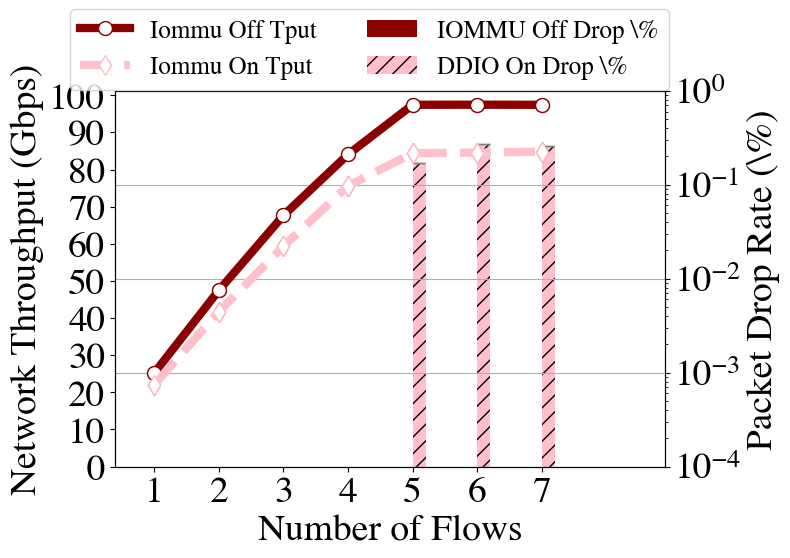

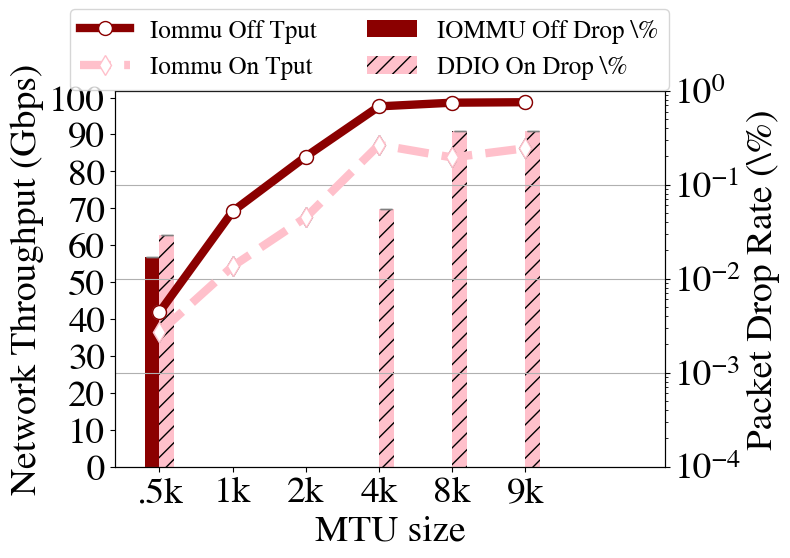

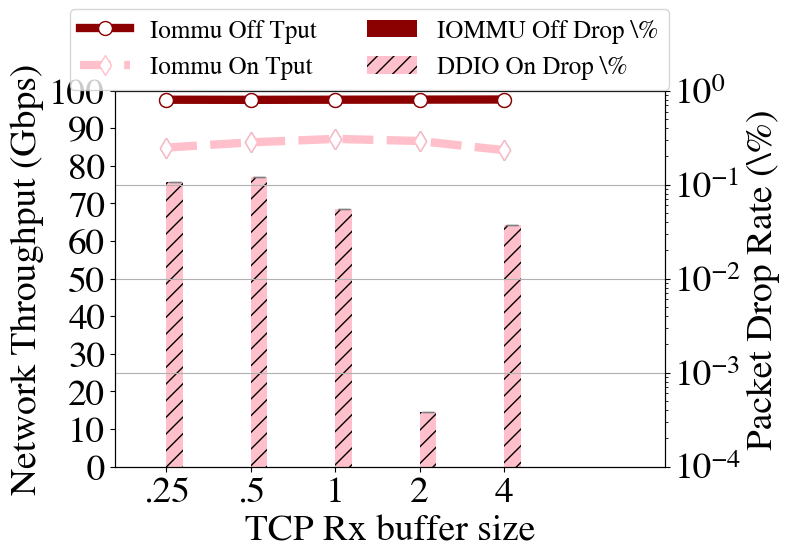

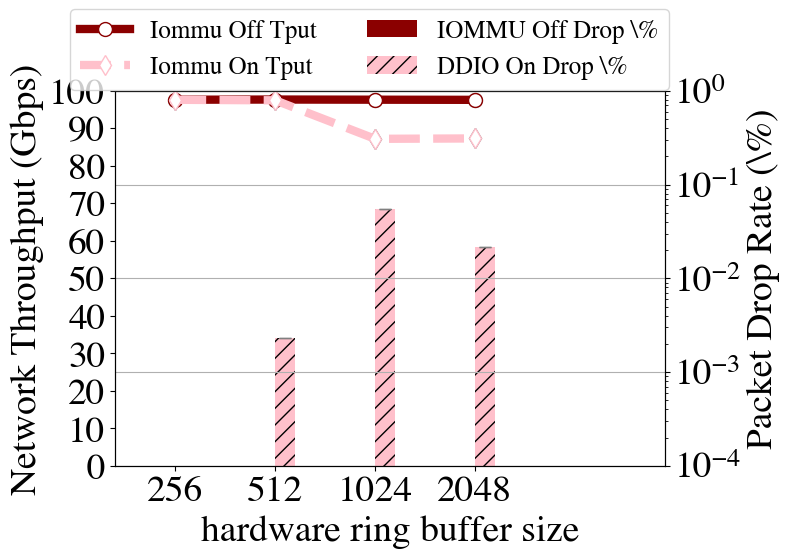

In [65]:
iommu_off_nflows = [np.genfromtxt(f"{EXP_DIR}/flow{i}/tput_metrics.dat", dtype=float, delimiter=',',names=True) for i in range(1,8)]
iommu_on_nflows = [np.genfromtxt(f"{EXP_DIR_IOMMU}/flow{i}/tput_metrics.dat", dtype=float, delimiter=',',names=True) for i in range(1,8)]
plot_drops_and_tput("flow", range(1,8), "Number of Flows", "flows")
plot_drops_and_tput("MTU", [".5k","1k","2k","4k","8k","9k"], "MTU size", "mtu")
plot_drops_and_tput("tcp-buf-", [".25", ".5","1","2","4"], "TCP Rx buffer size", "rx_buf")
plot_drops_and_tput("ring_buffer-", ["256","512","1024","2048"], "hardware ring buffer size", "ring_buf")


In [91]:
# plt.figure(figsize=(12,6))
def plot_miss_rate(exp, values, xlabel, plotname):
    iommu_off_data = [np.genfromtxt(f"{EXP_DIR}/{exp}{i}/tput_metrics.dat", dtype=float, delimiter=',',names=True) for i in values]
    iommu_on_data = [np.genfromtxt(f"{EXP_DIR_IOMMU}/{exp}{i}/tput_metrics.dat", dtype=float, delimiter=',',names=True) for i in values]

    fig, ax1 = plt.subplots(figsize=(8,5))
    ax2 = ax1.twinx()
    WIDTH=0.2

    iommu_hits = [entry['iotlb_hits_mean'] for entry in iommu_on_data] #[ddio_off_0_mlc[2],ddio_off_1_mlc[2],ddio_off_2_mlc[2],ddio_off_3_mlc[2]]
    stddev_hits_iommu_off = [entry['iotlb_hits_stddev'] for entry in iommu_on_data]
    iommu_misses = [entry['iotlb_misses_mean'] for entry in iommu_on_data]
    stddev_misses_iommu_on = [entry['iotlb_misses_stddev'] for entry in iommu_on_data]


    tput_iommu_on = [entry['net_tput_mean'] for entry in iommu_on_data]
    if exp == "MTU":
        mtus = [500, 1000, 2000, 4000, 8000, 9000]
    else:
        mtus = [4000] * len(values)

    packets_per_second = [(tput * 125000000) / mtu for (tput, mtu) in zip(tput_iommu_on, mtus)]
    misses_per_packet = [misses / pps for (misses, pps) in zip(iommu_misses, packets_per_second)]

    ax2.bar(np.arange(len(misses_per_packet)), misses_per_packet, width=WIDTH,label='Misses per Packet',color='pink', hatch='//')
    #ax2.bar(np.arange(len(drops_iommu_off))+WIDTH, drops_iommu_on,width=WIDTH,label='DDIO On Drop \%',color='pink',hatch='//')
    #ax2.errorbar(np.arange(len(drops_iommu_off)),drops_iommu_off, yerr=stddev_drops_iommu_off,capsize=4,color='gray',linestyle='')
    #ax2.errorbar(np.arange(len(drops_iommu_off))+WIDTH, drops_iommu_on, yerr=stddev_drops_iommu_on,capsize=4,color='gray',linestyle='')
    ax2.set_xlabel(xlabel,fontsize=LABEL_FONTSIZE+5)
    ax2.set_ylabel('Misses per Packet',fontsize=LABEL_FONTSIZE+5)
    plt.ylim(0.0,3)
    ax2.set_yscale('linear')
    ax2.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)

    ax1.set_zorder(ax2.get_zorder()+1)
    ax1.patch.set_visible(False) 
    
    miss_rate = [misses / (misses + hits) for (hits, misses) in zip(iommu_hits, iommu_misses)]

    #ax1.errorbar(np.arange(len(tput_iommu_off))+WIDTH/2, tput_iommu_off, yerr=stddev_tput_iommu_off,capsize=4, linestyle='',color='gray',marker='o',markersize=10,markerfacecolor='white')
    #ax1.errorbar(np.arange(len(tput_iommu_off))+WIDTH/2, tput_iommu_on, yerr=stddev_tput_iommu_on,capsize=4, linestyle='',color='gray',marker='d',markersize=10,markerfacecolor='white')
    ax1.plot(np.arange(len(miss_rate))+WIDTH/2, miss_rate, linewidth=6,label='Iommu Miss Rate',color='darkred',marker='o',markersize=10,markerfacecolor='white',zorder=2.5)
    #ax1.plot(np.arange(len(tput_iommu_off))+WIDTH/2, tput_iommu_on, linewidth=6,label='Iommu On Tput',color='pink',marker='d',markersize=10,markerfacecolor='white',linestyle='--',zorder=2.5)
    if (exp == "bandwidth-"):
        ax1.set_xticks([i+WIDTH/2 for i in range(len(tput_iommu_on))],[str(i/5) for i in tput_iommu_on],fontsize=LABEL_FONTSIZE+5)
    else:
        ax1.set_xticks([i+WIDTH/2 for i in range(len(values))],[str(i) for i in values],fontsize=LABEL_FONTSIZE+5)
    ax1.set_yticks(np.arange(0,.2,.02))
    ax1.set_xlabel(xlabel,fontsize=LABEL_FONTSIZE+5)
    ax1.set_ylabel('Iommu Miss Rate',fontsize=LABEL_FONTSIZE+5)
    plt.grid(which='major', axis='y', zorder=-1.0)
    ax1.set_xlim(-0.5,len(miss_rate) + 1)
    ax1.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)

    fig.legend(bbox_to_anchor=(1.03,1.25),ncol=2, bbox_transform=ax1.transAxes,fontsize=LABEL_FONTSIZE-4)
    fig.tight_layout()
    fig.savefig(PLOT_DIR + f'/motivation-iommu-misses-{plotname}.jpg',format='jpg',bbox_inches='tight')
    plt.show()

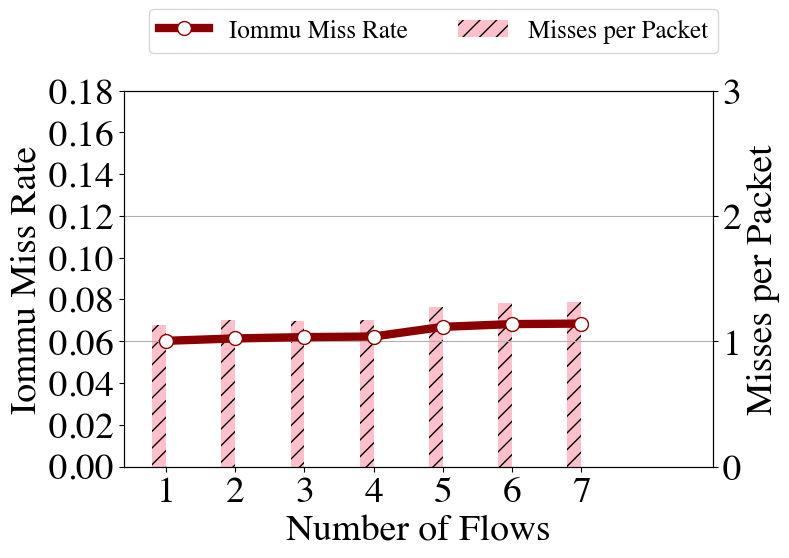

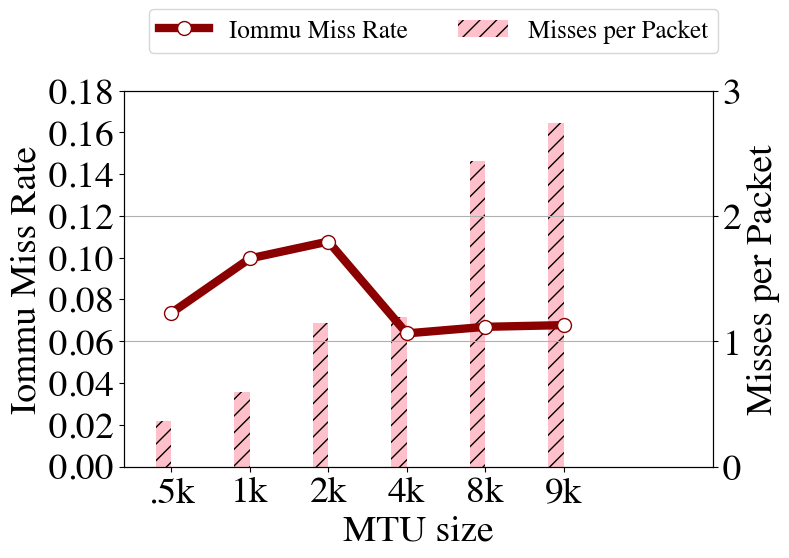

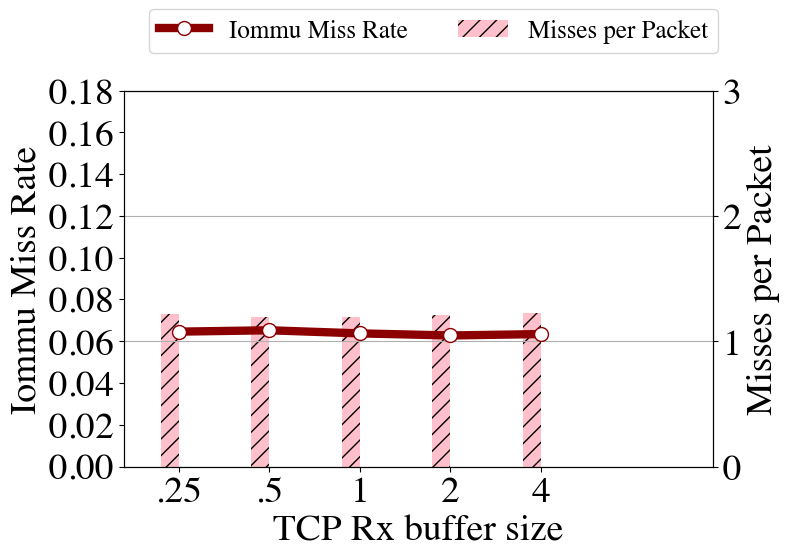

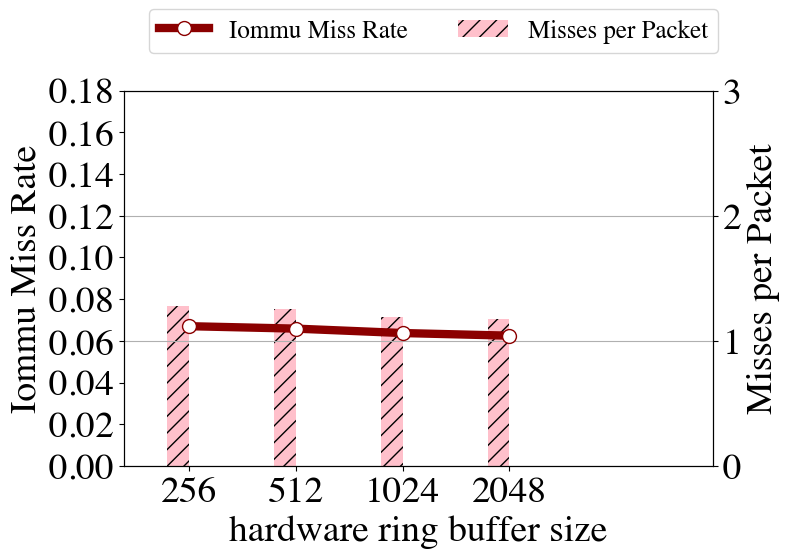

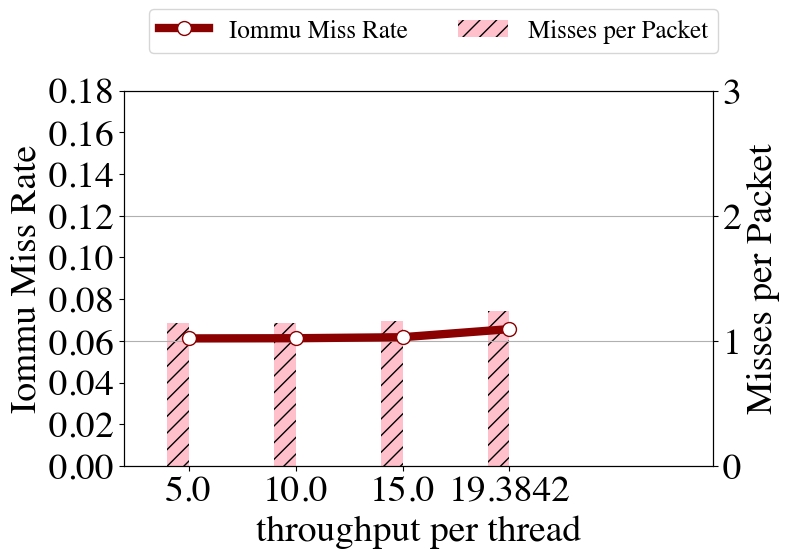

In [92]:
plot_miss_rate("flow", range(1,8), "Number of Flows", "flows")
plot_miss_rate("MTU", [".5k","1k","2k","4k","8k","9k"], "MTU size", "mtu")
plot_miss_rate("tcp-buf-", [".25", ".5","1","2","4"], "TCP Rx buffer size", "rx_buf")
plot_miss_rate("ring_buffer-", ["256","512","1024","2048"], "hardware ring buffer size", "ring_buf")
plot_miss_rate("bandwidth-", ["5","10","15","20"], "throughput per thread", "tput")

In [ ]:

import matplotlib
fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()
WIDTH=0.2
drops_iommu_off = [entry['retx_rate_mean'] for entry in iommu_off_nflows] #[ddio_off_0_mlc[2],ddio_off_1_mlc[2],ddio_off_2_mlc[2],ddio_off_3_mlc[2]]
stddev_drops_iommu_off = [entry['retx_rate_stddev'] for entry in iommu_on_nflows]
drops_iommu_on = [entry['retx_rate_mean'] for entry in iommu_on_nflows]
stddev_drops_iommu_on = [entry['retx_rate_stddev'] for entry in iommu_on_nflows]



ax2.bar(np.arange(len(drops_iommu_off)), drops_iommu_off, width=WIDTH,label='IOMMU Off Drop \%',color='darkred')
ax2.bar(np.arange(len(drops_iommu_off))+WIDTH, drops_iommu_on,width=WIDTH,label='IOMMU On Drop \%',color='pink',hatch='//')
ax2.errorbar(np.arange(len(drops_iommu_off)),drops_iommu_off, yerr=stddev_drops_iommu_off,capsize=4,color='gray',linestyle='')
ax2.errorbar(np.arange(len(drops_iommu_off))+WIDTH, drops_iommu_on, yerr=stddev_drops_iommu_on,capsize=4,color='gray',linestyle='')
ax2.set_xlabel('Number of flows',fontsize=LABEL_FONTSIZE+5)
ax2.set_ylabel('Packet Drop Rate (\%)',fontsize=LABEL_FONTSIZE+5)
plt.ylim(0.0001,1)
ax2.set_yscale('log')
ax2.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)


ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False) 
tput_iommu_off = [entry['net_tput_mean'] for entry in iommu_off_nflows]
stddev_tput_iommu_off = [entry['net_tput_stddev'] for entry in iommu_off_nflows]
tput_iommu_on = [entry['net_tput_mean'] for entry in iommu_on_nflows]
stddev_tput_iommu_on = [entry['net_tput_stddev'] for entry in iommu_on_nflows]

print(tput_iommu_off)
print(tput_iommu_on)

ax1.errorbar(np.arange(len(tput_iommu_off))+WIDTH/2, tput_iommu_off, yerr=stddev_tput_iommu_off,capsize=4, linestyle='',color='gray',marker='o',markersize=10,markerfacecolor='white')
ax1.errorbar(np.arange(len(tput_iommu_off))+WIDTH/2, tput_iommu_on, yerr=stddev_tput_iommu_on,capsize=4, linestyle='',color='gray',marker='d',markersize=10,markerfacecolor='white')
ax1.plot(np.arange(len(tput_iommu_off))+WIDTH/2, tput_iommu_off, linewidth=6,label='Iommu Off Tput',color='darkred',marker='o',markersize=10,markerfacecolor='white',zorder=2.5)
ax1.plot(np.arange(len(tput_iommu_off))+WIDTH/2, tput_iommu_on, linewidth=6,label='Iommu On Tput',color='pink',marker='d',markersize=10,markerfacecolor='white',linestyle='--',zorder=2.5)

ax1.set_xticks([i+WIDTH/2 for i in range(7)],[str(i) for i in range(1,8)],fontsize=LABEL_FONTSIZE+5)
ax1.set_yticks(range(0,105,10))
ax1.set_xlabel('Number of Flows',fontsize=LABEL_FONTSIZE+5)
ax1.set_ylabel('Network Throughput (Gbps)',fontsize=LABEL_FONTSIZE+5)
plt.grid(which='major', axis='y', zorder=-1.0)
ax1.set_xlim(-0.5,8)
ax1.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)

fig.legend(bbox_to_anchor=(1.03,1.25),ncol=2, bbox_transform=ax1.transAxes,fontsize=LABEL_FONTSIZE-4)
fig.tight_layout()
fig.savefig(PLOT_DIR + '/motivation-tput-drops-flows.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column
WIDTH=0.4

tput_ddio_off = [ddio_off_0_mlc[0],ddio_off_1_mlc[0],ddio_off_2_mlc[0],ddio_off_3_mlc[0]]
stddev_tput_ddio_off = [ddio_off_0_mlc[1],ddio_off_1_mlc[1],ddio_off_2_mlc[1],ddio_off_3_mlc[1]]
tput_ddio_on = [ddio_on_0_mlc[0],ddio_on_1_mlc[0],ddio_on_2_mlc[0],ddio_on_3_mlc[0]]
stddev_tput_ddio_on = [ddio_on_0_mlc[1],ddio_on_1_mlc[1],ddio_on_2_mlc[1],ddio_on_3_mlc[1]]

drops_ddio_off = [ddio_off_0_mlc[2],ddio_off_1_mlc[2],ddio_off_2_mlc[2],ddio_off_3_mlc[2]]
stddev_drops_ddio_off = [ddio_off_0_mlc[3],ddio_off_1_mlc[3],ddio_off_2_mlc[3],ddio_off_3_mlc[3]]
drops_ddio_on = [ddio_on_0_mlc[2],ddio_on_1_mlc[2],ddio_on_2_mlc[2],ddio_on_3_mlc[2]]
stddev_drops_ddio_on = [ddio_on_0_mlc[3],ddio_on_1_mlc[3],ddio_on_2_mlc[3],ddio_on_3_mlc[3]]


axs[0].bar(np.arange(len(tput_ddio_off)), tput_ddio_off, width=WIDTH,label='DDIO Off',color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[0].bar(np.arange(len(tput_ddio_off))+WIDTH, tput_ddio_on,width=WIDTH,label='DDIO On',color='xkcd:pale pink',hatch='//',edgecolor='black', linewidth=2)
axs[0].errorbar(np.arange(len(tput_ddio_off)),tput_ddio_off, yerr=stddev_tput_ddio_off,capsize=8,color='black',linestyle='',capthick=2)
axs[0].errorbar(np.arange(len(tput_ddio_off))+WIDTH, tput_ddio_on, yerr=stddev_tput_ddio_on,capsize=8,color='black',linestyle='',capthick=2)
# axs[0].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
axs[0].set_ylabel('Network Throughput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[0].set_ylim(0,103)
# axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[0].grid(linestyle='dashed',axis='y')
axs[0].set_axisbelow(True)
axs[0].set_xticks([i+WIDTH/2 for i in range(7)],[str(i)+'x' for i in range(7)],fontsize=LABEL_FONTSIZE+10)
axs[0].set_yticks([20*i for i in range(6)])
axs[0].set_xlim(-0.4,3.8)
axs[0].yaxis.set_label_coords(-0.12, 0.5)

border_width = 2
for spine in axs[0].spines.values():
    spine.set_linewidth(border_width)

axs[1].bar(np.arange(len(drops_ddio_off)), drops_ddio_off, width=WIDTH,color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[1].bar(np.arange(len(drops_ddio_off))+WIDTH, drops_ddio_on,width=WIDTH,color='xkcd:pale pink',hatch='//',edgecolor='black', linewidth=2)
axs[1].errorbar(np.arange(len(drops_ddio_off)),drops_ddio_off, yerr=stddev_drops_ddio_off,capsize=8,color='black',linestyle='',capthick=2)
axs[1].errorbar(np.arange(len(drops_ddio_off))+WIDTH, drops_ddio_on, yerr=stddev_drops_ddio_on,capsize=8,color='black',linestyle='',capthick=2)
axs[1].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylabel('Packet Drop \n Rate (\%)',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylim(0.00001,1.3)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[1].grid(linestyle='dashed',axis='y')
axs[1].set_axisbelow(True)
axs[1].set_xticks([i+WIDTH/2 for i in range(7)],[str(i)+'x' for i in range(7)],fontsize=LABEL_FONTSIZE+10)
axs[1].set_yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1])
axs[1].set_xlim(-0.4,3.8)
border_width = 2
for spine in axs[1].spines.values():
    spine.set_linewidth(border_width)

fig.legend(bbox_to_anchor=(0.99,1.38),ncol=2, bbox_transform=axs[0].transAxes,fontsize=LABEL_FONTSIZE+10)
plt.subplots_adjust(hspace=0.3) 
plt.show()

fig.savefig(PLOT_DIR + '/motivation-tput-drops-inc-mlc.pdf',format='pdf',bbox_inches='tight')

In [ ]:
plt.figure()

membw_ddio_off = [ddio_off_0_mlc[4],ddio_off_1_mlc[4],ddio_off_2_mlc[4],ddio_off_3_mlc[4]]
stddev_membw_ddio_off = [ddio_off_0_mlc[5],ddio_off_1_mlc[5],ddio_off_2_mlc[5],ddio_off_3_mlc[5]]
membw_ddio_on = [ddio_on_0_mlc[4],ddio_on_1_mlc[4],ddio_on_2_mlc[4],ddio_on_3_mlc[4]]
stddev_membw_ddio_on = [ddio_on_0_mlc[5],ddio_on_1_mlc[5],ddio_on_2_mlc[5],ddio_on_3_mlc[5]]

membw_ddio_off = [i/MAX_MEM_BW for i in membw_ddio_off]
membw_ddio_on = [i/MAX_MEM_BW for i in membw_ddio_on]

mlcbw_ddio_off = [0,ddio_off_1_mlc[6],ddio_off_2_mlc[6],ddio_off_3_mlc[6]]
stddev_mlcbw_ddio_off = [0,ddio_off_1_mlc[7],ddio_off_2_mlc[7],ddio_off_3_mlc[7]]
mlcbw_ddio_on = [0,ddio_on_1_mlc[6],ddio_on_2_mlc[6],ddio_on_3_mlc[6]]
stddev_mlcbw_ddio_on = [0,ddio_on_1_mlc[7],ddio_on_2_mlc[7],ddio_on_3_mlc[7]]

mlcbw_ddio_off = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_ddio_off]
mlcbw_ddio_on = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_ddio_on]

netbw_ddio_off = [(a-b) for (a,b) in zip(membw_ddio_off,mlcbw_ddio_off)]
netbw_ddio_on = [(a-b) for (a,b) in zip(membw_ddio_on,mlcbw_ddio_on)]

width =0.2
plt.bar(np.arange(len(netbw_ddio_off)), netbw_ddio_off, width=width,label='DDIO Off, NetApp-T',color='darkred')
plt.bar(np.arange(len(netbw_ddio_off)), mlcbw_ddio_off,bottom=netbw_ddio_off, width=width,label='DDIO Off, MApp',color='orange',hatch='o')
plt.bar(np.arange(len(netbw_ddio_off))+width, netbw_ddio_on, width=width,label='DDIO On, NetApp-T',color='pink',hatch='//')
plt.bar(np.arange(len(netbw_ddio_off))+width, mlcbw_ddio_on,bottom=netbw_ddio_on, width=width,label='DDIO On, MApp',color='yellow',hatch='/o')


plt.xticks([i+width/2 for i in range(7)],[str(i)+'x' for i in range(7)],fontsize=LABEL_FONTSIZE)

plt.yticks(fontsize=LABEL_FONTSIZE)
plt.xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE)
plt.ylabel('Memory BW Utilization',fontsize=LABEL_FONTSIZE)
plt.grid(which='major', axis='y', zorder=-1.0)
plt.ylim(0,1.15)
plt.xlim(-0.5,3.5)
plt.legend(fontsize=LEGEND_FONTSIZE-6,ncol=2,bbox_to_anchor=(1,1.25))
plt.tight_layout()
plt.savefig(PLOT_DIR + '/motivation-membw-inc-mlc.pdf',format='pdf',dpi=3000)
plt.show()

In [ ]:
plt.figure()

membw_ddio_off = [ddio_off_0_mlc[4],ddio_off_1_mlc[4],ddio_off_2_mlc[4],ddio_off_3_mlc[4]]
stddev_membw_ddio_off = [ddio_off_0_mlc[5],ddio_off_1_mlc[5],ddio_off_2_mlc[5],ddio_off_3_mlc[5]]
membw_ddio_on = [ddio_on_0_mlc[4],ddio_on_1_mlc[4],ddio_on_2_mlc[4],ddio_on_3_mlc[4]]
stddev_membw_ddio_on = [ddio_on_0_mlc[5],ddio_on_1_mlc[5],ddio_on_2_mlc[5],ddio_on_3_mlc[5]]

membw_ddio_off = [i/MAX_MEM_BW for i in membw_ddio_off]
membw_ddio_on = [i/MAX_MEM_BW for i in membw_ddio_on]

mlcbw_ddio_off = [0,ddio_off_1_mlc[6],ddio_off_2_mlc[6],ddio_off_3_mlc[6]]
stddev_mlcbw_ddio_off = [0,ddio_off_1_mlc[7],ddio_off_2_mlc[7],ddio_off_3_mlc[7]]
mlcbw_ddio_on = [0,ddio_on_1_mlc[6],ddio_on_2_mlc[6],ddio_on_3_mlc[6]]
stddev_mlcbw_ddio_on = [0,ddio_on_1_mlc[7],ddio_on_2_mlc[7],ddio_on_3_mlc[7]]

mlcbw_ddio_off = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_ddio_off]
mlcbw_ddio_on = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_ddio_on]

netbw_ddio_off = [(a-b) for (a,b) in zip(membw_ddio_off,mlcbw_ddio_off)]
netbw_ddio_on = [(a-b) for (a,b) in zip(membw_ddio_on,mlcbw_ddio_on)]

width =0.4
plt.bar(np.arange(len(netbw_ddio_off)), netbw_ddio_off, width=width,label='DDIO Off, NetApp-T',color='xkcd:reddish',edgecolor='black', linewidth=1.5)
plt.bar(np.arange(len(netbw_ddio_off)), mlcbw_ddio_off,bottom=netbw_ddio_off, width=width,label='DDIO Off, MApp',color='xkcd:light orange',hatch='.',edgecolor='black', linewidth=1.5)
plt.bar(np.arange(len(netbw_ddio_off))+width, netbw_ddio_on, width=width,label='DDIO On, NetApp-T',color='xkcd:pale pink',hatch='//',edgecolor='black', linewidth=1.5)
plt.bar(np.arange(len(netbw_ddio_off))+width, mlcbw_ddio_on,bottom=netbw_ddio_on, width=width,label='DDIO On, MApp',color='xkcd:yellow',hatch='..',edgecolor='black', linewidth=1.5)


plt.xticks([i+width/2 for i in range(7)],[str(i)+'x' for i in range(7)],fontsize=LABEL_FONTSIZE)


plt.xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE-1)
plt.ylabel('Memory Bandwidth \n Utilization',fontsize=LABEL_FONTSIZE-1)
plt.grid(which='major', axis='y', zorder=-1.0,linestyle='dashed')
plt.gca().set_axisbelow(True)
plt.ylim(0,1.02)
plt.xlim(-0.4,3.8)
plt.legend(fontsize=LEGEND_FONTSIZE-3,ncol=2,bbox_to_anchor=(1.05,1.345),columnspacing=0.5)
plt.yticks(fontsize=LABEL_FONTSIZE-2)

border_width = 1.5
for spine in plt.gca().spines.values():
    spine.set_linewidth(border_width)

plt.tight_layout()
plt.savefig(PLOT_DIR + '/motivation-membw-inc-mlc.pdf',format='pdf',dpi=3000)
plt.show()

### Figure 3

In [ ]:
#Load data for Fig 3
ddio_off_1500B_mtu = np.loadtxt('dctcp-inc-mlc-mtu/ddio-off-1500-mtu.tput.dat')
ddio_off_4000B_mtu = np.loadtxt('dctcp-inc-mlc-mtu/ddio-off-4000-mtu.tput.dat')
ddio_off_9000B_mtu = np.loadtxt('dctcp-inc-mlc-mtu/ddio-off-9000-mtu.tput.dat')
ddio_on_1500B_mtu = np.loadtxt('dctcp-inc-mlc-mtu/ddio-on-1500-mtu.tput.dat')
ddio_on_4000B_mtu = np.loadtxt('dctcp-inc-mlc-mtu/ddio-on-4000-mtu.tput.dat')
ddio_on_9000B_mtu = np.loadtxt('dctcp-inc-mlc-mtu/ddio-on-9000-mtu.tput.dat')

ddio_off_1_flows = np.loadtxt('dctcp-inc-mlc-flows/ddio-off-1-flows.tput.dat')
ddio_off_2_flows = np.loadtxt('dctcp-inc-mlc-flows//ddio-off-2-flows.tput.dat')
ddio_off_4_flows = np.loadtxt('dctcp-inc-mlc-flows//ddio-off-4-flows.tput.dat')
ddio_on_1_flows = np.loadtxt('dctcp-inc-mlc-flows/ddio-on-1-flows.tput.dat')
ddio_on_2_flows = np.loadtxt('dctcp-inc-mlc-flows/ddio-on-2-flows.tput.dat')
ddio_on_4_flows = np.loadtxt('dctcp-inc-mlc-flows/ddio-on-4-flows.tput.dat')

In [ ]:
drops_ddio_off = [ddio_off_1500B_mtu[2],ddio_off_4000B_mtu[2],ddio_off_9000B_mtu[2]]
stddev_drops_ddio_off = [ddio_off_1500B_mtu[3],ddio_off_4000B_mtu[3],ddio_off_9000B_mtu[3]]
drops_ddio_on = [ddio_on_1500B_mtu[2],ddio_on_4000B_mtu[2],ddio_on_9000B_mtu[2]]
stddev_drops_ddio_on = [ddio_on_1500B_mtu[3],ddio_on_4000B_mtu[3],ddio_on_9000B_mtu[3]]

WIDTH=0.2

plt.figure()
plt.bar(np.arange(len(drops_ddio_off)), drops_ddio_off, width=WIDTH,label='DDIO Off',color='darkred')
plt.bar(np.arange(len(drops_ddio_off))+WIDTH, drops_ddio_on,width=WIDTH,label='DDIO On',color='pink',hatch='//')
plt.errorbar(np.arange(len(drops_ddio_off)),drops_ddio_off, yerr=stddev_drops_ddio_off,capsize=4,color='gray',linestyle='')
plt.errorbar(np.arange(len(drops_ddio_off))+WIDTH, drops_ddio_on, yerr=stddev_drops_ddio_on,capsize=4,color='gray',linestyle='')
plt.xlabel('MTU Size',fontsize=LABEL_FONTSIZE)
plt.ylabel('Packet Drop Rate (\%)',fontsize=LABEL_FONTSIZE)
plt.ylim(0,1.1)
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)
plt.xticks([i+width/2 for i in range(3)],['1500B','4000B','9000B'],fontsize=LABEL_FONTSIZE)
plt.legend(fontsize=LEGEND_FONTSIZE,ncol=1,loc='upper left')
plt.yticks([i*2/10 for i in range(6)],fontsize=LABEL_FONTSIZE)
plt.grid(which='major', axis='y', zorder=-1.0)
plt.tight_layout()
plt.savefig(PLOT_DIR + '/motivation-drops-inc-mtu.pdf',format='pdf',dpi=3000)
plt.show()

In [ ]:
drops_ddio_off = [ddio_off_1_flows[2],ddio_off_2_flows[2],ddio_off_4_flows[2]]
stddev_drops_ddio_off = [ddio_off_1_flows[3],ddio_off_2_flows[3],ddio_off_4_flows[3]]
drops_ddio_on = [ddio_on_1_flows[2],ddio_on_2_flows[2],ddio_on_4_flows[2]]
stddev_drops_ddio_on = [ddio_on_1_flows[3],ddio_on_2_flows[3],ddio_on_4_flows[3]]

WIDTH=0.2

plt.figure()
plt.bar(np.arange(len(drops_ddio_off)), drops_ddio_off, width=WIDTH,label='DDIO Off',color='darkred')
plt.bar(np.arange(len(drops_ddio_off))+WIDTH, drops_ddio_on,width=WIDTH,label='DDIO On',color='pink',hatch='//')
plt.errorbar(np.arange(len(drops_ddio_off)),drops_ddio_off, yerr=stddev_drops_ddio_off,capsize=4,color='gray',linestyle='')
plt.errorbar(np.arange(len(drops_ddio_off))+WIDTH, drops_ddio_on, yerr=stddev_drops_ddio_on,capsize=4,color='gray',linestyle='')
plt.xlabel('Number of Active Flows',fontsize=LABEL_FONTSIZE)
plt.ylabel('Packet Drop Rate (\%)',fontsize=LABEL_FONTSIZE)
plt.ylim(0,1.9)
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)
plt.xticks([i+width/2 for i in range(3)],['4','8','16'],fontsize=LABEL_FONTSIZE)
plt.legend(fontsize=LEGEND_FONTSIZE,ncol=1,loc='upper left')
plt.yticks([i*2.5/10 for i in range(8)],fontsize=LABEL_FONTSIZE)
plt.grid(which='major', axis='y', zorder=-1.0)
plt.tight_layout()
plt.savefig(PLOT_DIR + '/motivation-drops-inc-flows.pdf',format='pdf',dpi=3000)
plt.show()

In [ ]:
drops_ddio_off = [ddio_off_1500B_mtu[2],ddio_off_4000B_mtu[2],ddio_off_9000B_mtu[2]]
stddev_drops_ddio_off = [ddio_off_1500B_mtu[3],ddio_off_4000B_mtu[3],ddio_off_9000B_mtu[3]]
drops_ddio_on = [ddio_on_1500B_mtu[2],ddio_on_4000B_mtu[2],ddio_on_9000B_mtu[2]]
stddev_drops_ddio_on = [ddio_on_1500B_mtu[3],ddio_on_4000B_mtu[3],ddio_on_9000B_mtu[3]]

WIDTH=0.4

plt.figure()
plt.bar(np.arange(len(drops_ddio_off)), drops_ddio_off, width=WIDTH,label='DDIO Off',color='xkcd:reddish',edgecolor='black', linewidth=1.5)
plt.bar(np.arange(len(drops_ddio_off))+WIDTH, drops_ddio_on,width=WIDTH,label='DDIO On',color='xkcd:pale pink',hatch='//',edgecolor='black', linewidth=1.5)
plt.errorbar(np.arange(len(drops_ddio_off)),drops_ddio_off, yerr=stddev_drops_ddio_off,capsize=8,color='black',linestyle='',capthick=2)
plt.errorbar(np.arange(len(drops_ddio_off))+WIDTH, drops_ddio_on, yerr=stddev_drops_ddio_on,capsize=8,color='black',linestyle='',capthick=2)
plt.xlabel('MTU Size',fontsize=LABEL_FONTSIZE)
plt.ylabel('Packet Drop Rate (\%)',fontsize=LABEL_FONTSIZE)
plt.ylim(0,1.22)
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)
plt.xticks([i+width/2 for i in range(3)],['1500B','4000B','9000B'],fontsize=LABEL_FONTSIZE)
plt.legend(fontsize=LEGEND_FONTSIZE,ncol=2,loc='upper left',bbox_to_anchor=(0.05,1.205))
plt.yticks([i*2/10 for i in range(7)],fontsize=LABEL_FONTSIZE)
plt.grid(which='major', axis='y', zorder=-1.0,linestyle='dashed')
plt.gca().set_axisbelow(True)
border_width = 1.5
for spine in plt.gca().spines.values():
    spine.set_linewidth(border_width)
plt.tight_layout()
plt.savefig(PLOT_DIR + '/motivation-drops-inc-mtu.pdf',format='pdf',dpi=3000)
plt.show()

In [ ]:
drops_ddio_off = [ddio_off_1_flows[2],ddio_off_2_flows[2],ddio_off_4_flows[2]]
stddev_drops_ddio_off = [ddio_off_1_flows[3],ddio_off_2_flows[3],ddio_off_4_flows[3]]
drops_ddio_on = [ddio_on_1_flows[2],ddio_on_2_flows[2],ddio_on_4_flows[2]]
stddev_drops_ddio_on = [ddio_on_1_flows[3],ddio_on_2_flows[3],ddio_on_4_flows[3]]

WIDTH=0.4

plt.figure()
plt.bar(np.arange(len(drops_ddio_off)), drops_ddio_off, width=WIDTH,label='DDIO Off',color='xkcd:reddish',edgecolor='black', linewidth=1.5)
plt.bar(np.arange(len(drops_ddio_off))+WIDTH, drops_ddio_on,width=WIDTH,label='DDIO On',color='xkcd:pale pink',hatch='//',edgecolor='black', linewidth=1.5)
plt.errorbar(np.arange(len(drops_ddio_off)),drops_ddio_off, yerr=stddev_drops_ddio_off,capsize=8,color='black',linestyle='',capthick=2)
plt.errorbar(np.arange(len(drops_ddio_off))+WIDTH, drops_ddio_on, yerr=stddev_drops_ddio_on,capsize=8,color='black',linestyle='',capthick=2)
plt.xlabel('Number of Active Flows',fontsize=LABEL_FONTSIZE)
plt.ylabel('Packet Drop Rate (\%)',fontsize=LABEL_FONTSIZE)
plt.ylim(0,2.04)
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)
plt.xticks([i+width/2 for i in range(3)],['4','8','16'],fontsize=LABEL_FONTSIZE)
plt.legend(fontsize=LEGEND_FONTSIZE,ncol=2,loc='upper left',bbox_to_anchor=(0.05,1.205))
plt.yticks([i*2.5/10 for i in range(9)],fontsize=LABEL_FONTSIZE)
plt.grid(which='major', axis='y', zorder=-1.0,linestyle='dashed')
plt.gca().set_axisbelow(True)
border_width = 1.5
for spine in plt.gca().spines.values():
    spine.set_linewidth(border_width)
plt.tight_layout()
plt.savefig(PLOT_DIR + '/motivation-drops-inc-flows.pdf',format='pdf',dpi=3000)
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column
WIDTH=0.4

tput_ddio_off = [ddio_off_1500B_mtu[0],ddio_off_4000B_mtu[0],ddio_off_9000B_mtu[0]]
stddev_tput_ddio_off = [ddio_off_1500B_mtu[1],ddio_off_4000B_mtu[1],ddio_off_9000B_mtu[1]]
tput_ddio_on = [ddio_on_1500B_mtu[0],ddio_on_4000B_mtu[0],ddio_on_9000B_mtu[0]]
stddev_tput_ddio_on = [ddio_on_1500B_mtu[1],ddio_on_4000B_mtu[1],ddio_on_9000B_mtu[1]]

drops_ddio_off = [ddio_off_1500B_mtu[2],ddio_off_4000B_mtu[2],ddio_off_9000B_mtu[2]]
stddev_drops_ddio_off = [ddio_off_1500B_mtu[3],ddio_off_4000B_mtu[3],ddio_off_9000B_mtu[3]]
drops_ddio_on = [ddio_on_1500B_mtu[2],ddio_on_4000B_mtu[2],ddio_on_9000B_mtu[2]]
stddev_drops_ddio_on = [ddio_on_1500B_mtu[3],ddio_on_4000B_mtu[3],ddio_on_9000B_mtu[3]]


axs[0].bar(np.arange(len(tput_ddio_off)), tput_ddio_off, width=WIDTH,label='DDIO Off',color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[0].bar(np.arange(len(tput_ddio_off))+WIDTH, tput_ddio_on,width=WIDTH,label='DDIO On',color='xkcd:pale pink',hatch='//',edgecolor='black', linewidth=2)
axs[0].errorbar(np.arange(len(tput_ddio_off)),tput_ddio_off, yerr=stddev_tput_ddio_off,capsize=8,color='black',linestyle='',capthick=2)
axs[0].errorbar(np.arange(len(tput_ddio_off))+WIDTH, tput_ddio_on, yerr=stddev_tput_ddio_on,capsize=8,color='black',linestyle='',capthick=2)
# axs[0].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
axs[0].set_ylabel('Network Throughput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[0].set_ylim(0,103)
# axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[0].grid(linestyle='dashed',axis='y')
axs[0].set_axisbelow(True)
axs[0].set_xticks([i+WIDTH/2 for i in range(3)],['1500B','4000B','9000B'],fontsize=LABEL_FONTSIZE+10)
axs[0].set_yticks([20*i for i in range(6)])
axs[0].set_xlim(-0.4,2.8)
axs[0].yaxis.set_label_coords(-0.12, 0.5)

border_width = 2
for spine in axs[0].spines.values():
    spine.set_linewidth(border_width)

axs[1].bar(np.arange(len(drops_ddio_off)), drops_ddio_off, width=WIDTH,color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[1].bar(np.arange(len(drops_ddio_off))+WIDTH, drops_ddio_on,width=WIDTH,color='xkcd:pale pink',hatch='//',edgecolor='black', linewidth=2)
axs[1].errorbar(np.arange(len(drops_ddio_off)),drops_ddio_off, yerr=stddev_drops_ddio_off,capsize=8,color='black',linestyle='',capthick=2)
axs[1].errorbar(np.arange(len(drops_ddio_off))+WIDTH, drops_ddio_on, yerr=stddev_drops_ddio_on,capsize=8,color='black',linestyle='',capthick=2)
axs[1].set_xlabel('MTU Size',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylabel('Packet Drop \n Rate (\%)',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylim(0,1.28)
# axs[1].set_yscale('log')
axs[1].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[1].grid(linestyle='dashed',axis='y')
axs[1].set_axisbelow(True)
axs[1].set_xticks([i+WIDTH/2 for i in range(3)],['1500B','4000B','9000B'],fontsize=LABEL_FONTSIZE+10)
axs[1].set_yticks([i*2.5/10 for i in range(6)])
axs[1].set_xlim(-0.4,2.8)
border_width = 2
for spine in axs[1].spines.values():
    spine.set_linewidth(border_width)

fig.legend(bbox_to_anchor=(0.99,1.38),ncol=2, bbox_transform=axs[0].transAxes,fontsize=LABEL_FONTSIZE+10)
plt.subplots_adjust(hspace=0.3) 
plt.show()

fig.savefig(PLOT_DIR + '/motivation-tput-drops-inc-mtu.pdf',format='pdf',bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column
WIDTH=0.4

tput_ddio_off = [ddio_off_1_flows[0],ddio_off_2_flows[0],ddio_off_4_flows[0]]
stddev_tput_ddio_off = [ddio_off_1_flows[1],ddio_off_2_flows[1],ddio_off_4_flows[1]]
tput_ddio_on = [ddio_on_1_flows[0],ddio_on_2_flows[0],ddio_on_4_flows[0]]
stddev_tput_ddio_on = [ddio_on_1_flows[1],ddio_on_2_flows[1],ddio_on_4_flows[1]]

drops_ddio_off = [ddio_off_1_flows[2],ddio_off_2_flows[2],ddio_off_4_flows[2]]
stddev_drops_ddio_off = [ddio_off_1_flows[3],ddio_off_2_flows[3],ddio_off_4_flows[3]]
drops_ddio_on = [ddio_on_1_flows[2],ddio_on_2_flows[2],ddio_on_4_flows[2]]
stddev_drops_ddio_on = [ddio_on_1_flows[3],ddio_on_2_flows[3],ddio_on_4_flows[3]]


axs[0].bar(np.arange(len(tput_ddio_off)), tput_ddio_off, width=WIDTH,label='DDIO Off',color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[0].bar(np.arange(len(tput_ddio_off))+WIDTH, tput_ddio_on,width=WIDTH,label='DDIO On',color='xkcd:pale pink',hatch='//',edgecolor='black', linewidth=2)
axs[0].errorbar(np.arange(len(tput_ddio_off)),tput_ddio_off, yerr=stddev_tput_ddio_off,capsize=8,color='black',linestyle='',capthick=2)
axs[0].errorbar(np.arange(len(tput_ddio_off))+WIDTH, tput_ddio_on, yerr=stddev_tput_ddio_on,capsize=8,color='black',linestyle='',capthick=2)
# axs[0].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
axs[0].set_ylabel('Network Throughput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[0].set_ylim(0,103)
# axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[0].grid(linestyle='dashed',axis='y')
axs[0].set_axisbelow(True)
axs[0].set_xticks([i+WIDTH/2 for i in range(3)],['4','8','16'],fontsize=LABEL_FONTSIZE+10)
axs[0].set_yticks([20*i for i in range(6)])
axs[0].set_xlim(-0.4,2.8)
axs[0].yaxis.set_label_coords(-0.12, 0.5)

border_width = 2
for spine in axs[0].spines.values():
    spine.set_linewidth(border_width)

axs[1].bar(np.arange(len(drops_ddio_off)), drops_ddio_off, width=WIDTH,color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[1].bar(np.arange(len(drops_ddio_off))+WIDTH, drops_ddio_on,width=WIDTH,color='xkcd:pale pink',hatch='//',edgecolor='black', linewidth=2)
axs[1].errorbar(np.arange(len(drops_ddio_off)),drops_ddio_off, yerr=stddev_drops_ddio_off,capsize=8,color='black',linestyle='',capthick=2)
axs[1].errorbar(np.arange(len(drops_ddio_off))+WIDTH, drops_ddio_on, yerr=stddev_drops_ddio_on,capsize=8,color='black',linestyle='',capthick=2)
axs[1].set_xlabel('Number of Active Flows',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylabel('Packet Drop \n Rate (\%)',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylim(0,2.05)
# axs[1].set_yscale('log')
axs[1].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[1].grid(linestyle='dashed',axis='y')
axs[1].set_axisbelow(True)
axs[1].set_xticks([i+WIDTH/2 for i in range(3)],['4','8','16'],fontsize=LABEL_FONTSIZE+10)
axs[1].set_yticks([i*5/10 for i in range(5)])
axs[1].set_xlim(-0.4,2.8)
border_width = 2
for spine in axs[1].spines.values():
    spine.set_linewidth(border_width)

fig.legend(bbox_to_anchor=(0.99,1.38),ncol=2, bbox_transform=axs[0].transAxes,fontsize=LABEL_FONTSIZE+10)
plt.subplots_adjust(hspace=0.3) 
plt.show()

fig.savefig(PLOT_DIR + '/motivation-tput-drops-inc-flows.pdf',format='pdf',bbox_inches='tight')

In [ ]:
# plt.figure(figsize=(12,6))

fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()
WIDTH=0.2
width=0.2

drops_ddio_off = [ddio_off_1500B_mtu[2],ddio_off_4000B_mtu[2],ddio_off_9000B_mtu[2]]
stddev_drops_ddio_off = [ddio_off_1500B_mtu[3],ddio_off_4000B_mtu[3],ddio_off_9000B_mtu[3]]
drops_ddio_on = [ddio_on_1500B_mtu[2],ddio_on_4000B_mtu[2],ddio_on_9000B_mtu[2]]
stddev_drops_ddio_on = [ddio_on_1500B_mtu[3],ddio_on_4000B_mtu[3],ddio_on_9000B_mtu[3]]


ax2.bar(np.arange(len(drops_ddio_off)), drops_ddio_off, width=WIDTH,label='DDIO Off Drop \%',color='darkred')
ax2.bar(np.arange(len(drops_ddio_off))+WIDTH, drops_ddio_on,width=WIDTH,label='DDIO On Drop \%',color='pink',hatch='//')
ax2.errorbar(np.arange(len(drops_ddio_off)),drops_ddio_off, yerr=stddev_drops_ddio_off,capsize=4,color='gray',linestyle='')
ax2.errorbar(np.arange(len(drops_ddio_off))+WIDTH, drops_ddio_on, yerr=stddev_drops_ddio_on,capsize=4,color='gray',linestyle='')
ax2.set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
ax2.set_ylabel('Packet Drop Rate (\%)',fontsize=LABEL_FONTSIZE+5)
plt.ylim(0,1.1)
# ax2.set_yscale('log')
ax2.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)


ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False) 
tput_ddio_off = [ddio_off_1500B_mtu[0],ddio_off_4000B_mtu[0],ddio_off_9000B_mtu[0]]
stddev_tput_ddio_off = [ddio_off_1500B_mtu[1],ddio_off_4000B_mtu[1],ddio_off_9000B_mtu[1]]
tput_ddio_on = [ddio_on_1500B_mtu[0],ddio_on_4000B_mtu[0],ddio_on_9000B_mtu[0]]
stddev_tput_ddio_on = [ddio_on_1500B_mtu[1],ddio_on_4000B_mtu[1],ddio_on_9000B_mtu[1]]

ax1.errorbar(np.arange(len(tput_ddio_off))+WIDTH/2, tput_ddio_off, yerr=stddev_tput_ddio_off,capsize=4, linestyle='',color='gray',marker='o',markersize=10,markerfacecolor='white')
ax1.errorbar(np.arange(len(tput_ddio_off))+WIDTH/2, tput_ddio_on, yerr=stddev_tput_ddio_on,capsize=4, linestyle='',color='gray',marker='d',markersize=10,markerfacecolor='white')
ax1.plot(np.arange(len(tput_ddio_off))+WIDTH/2, tput_ddio_off, linewidth=6,label='DDIO Off Tput',color='darkred',marker='o',markersize=10,markerfacecolor='white',zorder=2.5)
ax1.plot(np.arange(len(tput_ddio_off))+WIDTH/2, tput_ddio_on, linewidth=6,label='DDIO On Tput',color='pink',marker='d',markersize=10,markerfacecolor='white',linestyle='--',zorder=2.5)

plt.xticks([i+width/2 for i in range(3)],['1500B','4000B','9000B'],fontsize=LABEL_FONTSIZE)
ax1.set_yticks(range(0,105,10),fontsize=LABEL_FONTSIZE+4)
ax1.set_xlabel('MTU Size',fontsize=LABEL_FONTSIZE+5)
ax1.set_ylabel('Network Throughput (Gbps)',fontsize=LABEL_FONTSIZE+5)
plt.grid(which='major', axis='y', zorder=-1.0)
ax1.set_xlim(-0.5,2.5)
ax1.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)

fig.legend(bbox_to_anchor=(1.03,1.25),ncol=2, bbox_transform=ax1.transAxes,fontsize=LABEL_FONTSIZE-4)
fig.tight_layout()
fig.savefig(PLOT_DIR + '/motivation-tput-drops-inc-mtu.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
# plt.figure(figsize=(12,6))

fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()
WIDTH=0.2
width=0.2

drops_ddio_off = [ddio_off_1_flows[2],ddio_off_2_flows[2],ddio_off_4_flows[2]]
stddev_drops_ddio_off = [ddio_off_1_flows[3],ddio_off_2_flows[3],ddio_off_4_flows[3]]
drops_ddio_on = [ddio_on_1_flows[2],ddio_on_2_flows[2],ddio_on_4_flows[2]]
stddev_drops_ddio_on = [ddio_on_1_flows[3],ddio_on_2_flows[3],ddio_on_4_flows[3]]


ax2.bar(np.arange(len(drops_ddio_off)), drops_ddio_off, width=WIDTH,label='DDIO Off Drop \%',color='darkred')
ax2.bar(np.arange(len(drops_ddio_off))+WIDTH, drops_ddio_on,width=WIDTH,label='DDIO On Drop \%',color='pink',hatch='//')
ax2.errorbar(np.arange(len(drops_ddio_off)),drops_ddio_off, yerr=stddev_drops_ddio_off,capsize=4,color='gray',linestyle='')
ax2.errorbar(np.arange(len(drops_ddio_off))+WIDTH, drops_ddio_on, yerr=stddev_drops_ddio_on,capsize=4,color='gray',linestyle='')
ax2.set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
ax2.set_ylabel('Packet Drop Rate (\%)',fontsize=LABEL_FONTSIZE+5)
plt.ylim(0,2.1)
# ax2.set_yscale('log')
ax2.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)


ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False) 
tput_ddio_off = [ddio_off_1_flows[0],ddio_off_2_flows[0],ddio_off_4_flows[0]]
stddev_tput_ddio_off = [ddio_off_1_flows[1],ddio_off_2_flows[1],ddio_off_4_flows[1]]
tput_ddio_on = [ddio_on_1_flows[0],ddio_on_2_flows[0],ddio_on_4_flows[0]]
stddev_tput_ddio_on = [ddio_on_1_flows[1],ddio_on_2_flows[1],ddio_on_4_flows[1]]

ax1.errorbar(np.arange(len(tput_ddio_off))+WIDTH/2, tput_ddio_off, yerr=stddev_tput_ddio_off,capsize=4, linestyle='',color='gray',marker='o',markersize=10,markerfacecolor='white')
ax1.errorbar(np.arange(len(tput_ddio_off))+WIDTH/2, tput_ddio_on, yerr=stddev_tput_ddio_on,capsize=4, linestyle='',color='gray',marker='d',markersize=10,markerfacecolor='white')
ax1.plot(np.arange(len(tput_ddio_off))+WIDTH/2, tput_ddio_off, linewidth=6,label='DDIO Off Tput',color='darkred',marker='o',markersize=10,markerfacecolor='white',zorder=2.5)
ax1.plot(np.arange(len(tput_ddio_off))+WIDTH/2, tput_ddio_on, linewidth=6,label='DDIO On Tput',color='pink',marker='d',markersize=10,markerfacecolor='white',linestyle='--',zorder=2.5)

plt.xticks([i+width/2 for i in range(3)],['4','8','16'],fontsize=LABEL_FONTSIZE)
ax1.set_yticks(range(0,105,10),fontsize=LABEL_FONTSIZE+4)
ax1.set_xlabel('Number of Active Flows',fontsize=LABEL_FONTSIZE+5)
ax1.set_ylabel('Network Throughput (Gbps)',fontsize=LABEL_FONTSIZE+5)
plt.grid(which='major', axis='y', zorder=-1.0)
ax1.set_xlim(-0.5,2.5)
ax1.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)

fig.legend(bbox_to_anchor=(1.03,1.25),ncol=2, bbox_transform=ax1.transAxes,fontsize=LABEL_FONTSIZE-4)
fig.tight_layout()
fig.savefig(PLOT_DIR + '/motivation-tput-drops-inc-flows.pdf',format='pdf',bbox_inches='tight')
plt.show()

### Figure 4

In [ ]:
#Load data for Figure 4

lat_data_no_hc = pd.read_csv('dctcp-inc-rpc-latency/ddio-off-nohc.lat.dat')
lat_data_with_hc = pd.read_csv('dctcp-inc-rpc-latency/ddio-off-withhc.lat.dat')

In [ ]:
print(lat_data_no_hc)
print(lat_data_with_hc)

In [ ]:
data_128 = [list(lat_data_no_hc['128']),list(lat_data_with_hc['128'])]
data_512 = [list(lat_data_no_hc['512']),list(lat_data_with_hc['512'])]
data_2K = [list(lat_data_no_hc['2048']),list(lat_data_with_hc['2048'])]
data_8K = [list(lat_data_no_hc['8192']),list(lat_data_with_hc['8192'])]
data_32K = [list(lat_data_no_hc['32768']),list(lat_data_with_hc['32768'])]

labels = ['No Host Congstion','With Host Congestion']
data = [data_128,data_512,data_2K,data_8K,data_32K]
colors = ['orange','darkred']
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,5), gridspec_kw={'height_ratios': [1, 3]})
box_dicts = []
for i in range(5):
    box_dicts.append(ax.boxplot(data[i], patch_artist=True,whis=(0,100),positions = [5*i+1,5*i+2], widths=0.4))

for i in range(len(box_dicts)):
    for item in ['boxes', 'fliers', 'medians']:
        for sub_item,color in zip(box_dicts[i][item], colors):
            plt.setp(sub_item, color=color)
    # whiskers and caps have to be treated separately since there are two of each for each plot
    for item in ['whiskers', 'caps']:
        for sub_items,color in zip(zip(box_dicts[i][item][::2],box_dicts[i][item][1::2]),colors):
            plt.setp(sub_items, color=color)
    for patch in box_dicts[i]['boxes']:
        patch.set_linewidth(3.0)
        patch.set_facecolor('white')
    for patch in box_dicts[i]['caps']:
        patch.set_linewidth(3.0)
    for patch in box_dicts[i]['whiskers']:
        patch.set_linewidth(1.0)
    for patch in box_dicts[i]['medians']:
        patch.set_linewidth(3.0)
#         patch.set_color(color)
        
box_dicts = []
for i in range(5):
    box_dicts.append(ax2.boxplot(data[i], patch_artist=True,whis=(0,100),positions = [5*i+1,5*i+2], widths=0.4))

for i in range(len(box_dicts)):
    for item in ['boxes', 'fliers', 'medians']:
        for sub_item,color in zip(box_dicts[i][item], colors):
            plt.setp(sub_item, color=color)
    # whiskers and caps have to be treated separately since there are two of each for each plot
    for item in ['whiskers', 'caps']:
        for sub_items,color in zip(zip(box_dicts[i][item][::2],box_dicts[i][item][1::2]),colors):
            plt.setp(sub_items, color=color)
    for patch in box_dicts[i]['boxes']:
        patch.set_linewidth(3.0)
        patch.set_facecolor('white')
    for patch in box_dicts[i]['caps']:
        patch.set_linewidth(3.0)
    for patch in box_dicts[i]['whiskers']:
        patch.set_linewidth(1.0)
    for patch in box_dicts[i]['medians']:
        patch.set_linewidth(3.0)
#         patch.set_color(color)
        
ax2.set_ylim(0, 230)  # outliers only
ax.set_ylim(10000, 500000)  # most of the data
ax.set_yscale('log')

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
        
ax.grid(axis='y',zorder=0)
ax2.grid(axis='y',zorder=0)
ax.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel('Latency ($\mu$s)',fontsize=LABEL_FONTSIZE)
ax2.yaxis.set_label_coords(x=-0.1,y=0.7)
plt.xlabel('RPC Size',fontsize=LABEL_FONTSIZE)
plt.xlim(0,23)
ax2.legend([box_dicts[0]["boxes"][0], box_dicts[0]["boxes"][1]],labels,fontsize=LEGEND_FONTSIZE-3, ncol=1)
plt.xticks([1.5,6.5,11.5,16.5,21.5],['128B','512B','2KB','8KB','32KB'],fontsize=LABEL_FONTSIZE)
ax.tick_params(axis='y', labelsize= LABEL_FONTSIZE)
ax2.tick_params(axis='y', labelsize= LABEL_FONTSIZE)
ax2.set_yticks([50,100,150,200])
ax.grid(axis='y',linestyle='--')
ax2.grid(axis='y',linestyle='--')
d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-8*d, +8*d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-8*d, +8*d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - 2*d, 1 + 2*d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - 2*d, 1 + 2*d), **kwargs)  # bottom-right diagonal
plt.savefig(PLOT_DIR + '/motivation-latency-inc-rpc.pdf',format='pdf', bbox_inches='tight')

In [ ]:
data_128 = [list(lat_data_no_hc['128']),list(lat_data_with_hc['128'])]
data_512 = [list(lat_data_no_hc['512']),list(lat_data_with_hc['512'])]
data_2K = [list(lat_data_no_hc['2048']),list(lat_data_with_hc['2048'])]
data_8K = [list(lat_data_no_hc['8192']),list(lat_data_with_hc['8192'])]
data_32K = [list(lat_data_no_hc['32768']),list(lat_data_with_hc['32768'])]

labels = ['DCTCP \n (No host congstion)','DCTCP \n (With host congestion)']
data = [data_128,data_512,data_2K,data_8K,data_32K]
colors = ['xkcd:light orange','xkcd:reddish']
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,5), gridspec_kw={'height_ratios': [1, 3]})
box_dicts = []
for i in range(5):
    box_dicts.append(ax.boxplot(data[i], patch_artist=True,whis=(0,100),positions = [5*i+0.4,5*i+2.4], widths=0.8))

for i in range(len(box_dicts)):
    for item in ['boxes', 'fliers', 'medians']:
        for sub_item,color in zip(box_dicts[i][item], colors):
            plt.setp(sub_item, color=color)
    # whiskers and caps have to be treated separately since there are two of each for each plot
    for item in ['whiskers', 'caps']:
        for sub_items,color in zip(zip(box_dicts[i][item][::2],box_dicts[i][item][1::2]),colors):
            plt.setp(sub_items, color=color)
    for patch in box_dicts[i]['boxes']:
        patch.set_linewidth(4.0)
        patch.set_facecolor('white')
    for patch in box_dicts[i]['caps']:
        patch.set_linewidth(4.0)
    for patch in box_dicts[i]['whiskers']:
        patch.set_linewidth(2.0)
    for patch in box_dicts[i]['medians']:
        patch.set_linewidth(4.0)
#         patch.set_color(color)
        
box_dicts = []
for i in range(5):
    box_dicts.append(ax2.boxplot(data[i], patch_artist=True,whis=(0,100),positions = [5*i+0.4,5*i+2.4], widths=0.8))

for i in range(len(box_dicts)):
    for item in ['boxes', 'fliers', 'medians']:
        for sub_item,color in zip(box_dicts[i][item], colors):
            plt.setp(sub_item, color=color)
    # whiskers and caps have to be treated separately since there are two of each for each plot
    for item in ['whiskers', 'caps']:
        for sub_items,color in zip(zip(box_dicts[i][item][::2],box_dicts[i][item][1::2]),colors):
            plt.setp(sub_items, color=color)
    for patch in box_dicts[i]['boxes']:
        patch.set_linewidth(4.0)
        patch.set_facecolor('white')
    for patch in box_dicts[i]['caps']:
        patch.set_linewidth(4.0)
    for patch in box_dicts[i]['whiskers']:
        patch.set_linewidth(2.0)
    for patch in box_dicts[i]['medians']:
        patch.set_linewidth(4.0)
#         patch.set_color(color)
        
ax2.set_ylim(0, 230)  # outliers only
ax.set_ylim(10000, 1250000)  # most of the data
ax.set_yscale('log')

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
        
ax.grid(axis='y',zorder=0)
ax2.grid(axis='y',zorder=0)
ax.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel('Latency ($\mu$s)',fontsize=LABEL_FONTSIZE+2)
ax2.yaxis.set_label_coords(x=-0.1,y=0.7)
plt.xlabel('RPC Size',fontsize=LABEL_FONTSIZE+2)
plt.xlim(-1,24)
ax2.legend([box_dicts[0]["boxes"][0], box_dicts[0]["boxes"][1]],labels,fontsize=LEGEND_FONTSIZE+2, ncol=2,loc='lower right',bbox_to_anchor=(0.95,1.42))
plt.xticks([1.5,6.5,11.5,16.5,21.5],['128B','512B','2KB','8KB','32KB'],fontsize=LABEL_FONTSIZE+2)
ax.tick_params(axis='y', labelsize= LABEL_FONTSIZE+2)
ax2.tick_params(axis='y', labelsize= LABEL_FONTSIZE+2)
ax2.set_yticks([50,100,150,200])
ax.grid(axis='y',linestyle='--')
ax2.grid(axis='y',linestyle='--')
d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-8*d, +8*d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-8*d, +8*d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - 2*d, 1 + 2*d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - 2*d, 1 + 2*d), **kwargs)  # bottom-right diagonal
# plt.text(11, 410, 'Latencies with DDIO Off', fontsize=LABEL_FONTSIZE+3, ha='center')
plt.savefig(PLOT_DIR + '/motivation-latency-inc-rpc.pdf',format='pdf', bbox_inches='tight')


### Figure 15

In [ ]:
#Load data for Figure 15

lat_data_no_hc = pd.read_csv('dctcp-inc-rpc-latency/ddio-on-nohc.lat.dat')
lat_data_with_hc = pd.read_csv('dctcp-inc-rpc-latency/ddio-on-withhc.lat.dat')

In [ ]:
data_128 = [list(lat_data_no_hc['128']),list(lat_data_with_hc['128'])]
data_512 = [list(lat_data_no_hc['512']),list(lat_data_with_hc['512'])]
data_2K = [list(lat_data_no_hc['2048']),list(lat_data_with_hc['2048'])]
data_8K = [list(lat_data_no_hc['8192']),list(lat_data_with_hc['8192'])]
data_32K = [list(lat_data_no_hc['32768']),list(lat_data_with_hc['32768'])]

labels = ['DCTCP \n (No host congstion)','DCTCP \n (With host congestion)']
data = [data_128,data_512,data_2K,data_8K,data_32K]
colors = ['xkcd:light orange','xkcd:reddish']
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,5), gridspec_kw={'height_ratios': [1, 3]})
box_dicts = []
for i in range(5):
    box_dicts.append(ax.boxplot(data[i], patch_artist=True,whis=(0,100),positions = [5*i+0.4,5*i+2.4], widths=0.8))

for i in range(len(box_dicts)):
    for item in ['boxes', 'fliers', 'medians']:
        for sub_item,color in zip(box_dicts[i][item], colors):
            plt.setp(sub_item, color=color)
    # whiskers and caps have to be treated separately since there are two of each for each plot
    for item in ['whiskers', 'caps']:
        for sub_items,color in zip(zip(box_dicts[i][item][::2],box_dicts[i][item][1::2]),colors):
            plt.setp(sub_items, color=color)
    for patch in box_dicts[i]['boxes']:
        patch.set_linewidth(4.0)
        patch.set_facecolor('white')
    for patch in box_dicts[i]['caps']:
        patch.set_linewidth(4.0)
    for patch in box_dicts[i]['whiskers']:
        patch.set_linewidth(2.0)
    for patch in box_dicts[i]['medians']:
        patch.set_linewidth(4.0)
#         patch.set_color(color)
        
box_dicts = []
for i in range(5):
    box_dicts.append(ax2.boxplot(data[i], patch_artist=True,whis=(0,100),positions = [5*i+0.4,5*i+2.4], widths=0.8))

for i in range(len(box_dicts)):
    for item in ['boxes', 'fliers', 'medians']:
        for sub_item,color in zip(box_dicts[i][item], colors):
            plt.setp(sub_item, color=color)
    # whiskers and caps have to be treated separately since there are two of each for each plot
    for item in ['whiskers', 'caps']:
        for sub_items,color in zip(zip(box_dicts[i][item][::2],box_dicts[i][item][1::2]),colors):
            plt.setp(sub_items, color=color)
    for patch in box_dicts[i]['boxes']:
        patch.set_linewidth(4.0)
        patch.set_facecolor('white')
    for patch in box_dicts[i]['caps']:
        patch.set_linewidth(4.0)
    for patch in box_dicts[i]['whiskers']:
        patch.set_linewidth(2.0)
    for patch in box_dicts[i]['medians']:
        patch.set_linewidth(4.0)
#         patch.set_color(color)
        
ax2.set_ylim(0, 230)  # outliers only
ax.set_ylim(10000, 1250000)  # most of the data
ax.set_yscale('log')

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
        
ax.grid(axis='y',zorder=0)
ax2.grid(axis='y',zorder=0)
ax.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel('Latency ($\mu$s)',fontsize=LABEL_FONTSIZE+2)
ax2.yaxis.set_label_coords(x=-0.1,y=0.7)
plt.xlabel('RPC Size',fontsize=LABEL_FONTSIZE+2)
plt.xlim(-1,24)
ax2.legend([box_dicts[0]["boxes"][0], box_dicts[0]["boxes"][1]],labels,fontsize=LEGEND_FONTSIZE+2, ncol=2,loc='lower right',bbox_to_anchor=(0.95,1.42))
plt.xticks([1.5,6.5,11.5,16.5,21.5],['128B','512B','2KB','8KB','32KB'],fontsize=LABEL_FONTSIZE+2)
ax.tick_params(axis='y', labelsize= LABEL_FONTSIZE+2)
ax2.tick_params(axis='y', labelsize= LABEL_FONTSIZE+2)
ax2.set_yticks([50,100,150,200])
ax.grid(axis='y',linestyle='--')
ax2.grid(axis='y',linestyle='--')
d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-8*d, +8*d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-8*d, +8*d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - 2*d, 1 + 2*d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - 2*d, 1 + 2*d), **kwargs)  # bottom-right diagonal
# plt.text(11, 410, 'Latencies with DDIO On', fontsize=LABEL_FONTSIZE+3, ha='center')
plt.savefig(PLOT_DIR + '/motivation-latency-inc-rpc-ddio-on.pdf',format='pdf', bbox_inches='tight')


### Figure 7

In [ ]:
ddio_off_0_mba = np.loadtxt('dctcp-inc-mlc-cores/ddio-off-3-mapp-core.tput.dat')
ddio_off_1_mba = np.loadtxt('dctcp-inc-mba-resp/ddio-off-resp-1.tput.dat')
ddio_off_2_mba = np.loadtxt('dctcp-inc-mba-resp/ddio-off-resp-2.tput.dat')
ddio_off_3_mba = np.loadtxt('dctcp-inc-mba-resp/ddio-off-resp-3.tput.dat')
ddio_off_4_mba = np.loadtxt('dctcp-inc-mlc-cores/ddio-off-0-mapp-core.tput.dat')

In [ ]:
ddio_off_3_mba

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column
WIDTH=0.4

tput_ddio_off = [ddio_off_0_mba[0],ddio_off_1_mba[0],ddio_off_2_mba[0],ddio_off_3_mba[0],ddio_off_4_mba[0]]
stddev_tput_ddio_off = [ddio_off_0_mba[1],ddio_off_1_mba[1],ddio_off_2_mba[1],ddio_off_3_mba[1],ddio_off_4_mba[1]]

mapp_tput_ddio_off = [i*8/1000 for i in [ddio_off_0_mba[6],ddio_off_1_mba[6],ddio_off_2_mba[6],ddio_off_3_mba[6],0]]
stddev_mapp_tput_ddio_off = [i*8/1000 for i in [ddio_off_0_mba[7],ddio_off_1_mba[7],ddio_off_2_mba[7],ddio_off_3_mba[7],0]]


axs[0].bar(np.arange(len(tput_ddio_off)), tput_ddio_off, width=WIDTH,label='NetApp',color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[0].errorbar(np.arange(len(tput_ddio_off)),tput_ddio_off, yerr=stddev_tput_ddio_off,capsize=8,color='black',linestyle='')
# axs[0].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
axs[0].set_ylabel('NetApp-T Tput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[0].set_ylim(0,103)
# axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[0].grid(linestyle='dashed',axis='y')
axs[0].set_axisbelow(True)
axs[0].set_xticks([i for i in range(7)],[str(i) for i in range(7)],fontsize=LABEL_FONTSIZE+10)
axs[0].set_yticks([20*i for i in range(6)])
axs[0].set_xlim(-0.4,4.4)
axs[0].yaxis.set_label_coords(-0.12, 0.5)

border_width = 2
for spine in axs[0].spines.values():
    spine.set_linewidth(border_width)

axs[1].bar(np.arange(len(mapp_tput_ddio_off)), mapp_tput_ddio_off, width=WIDTH,color='xkcd:light orange',edgecolor='black', linewidth=2,hatch='.')
axs[1].errorbar(np.arange(len(mapp_tput_ddio_off)),mapp_tput_ddio_off, yerr=stddev_mapp_tput_ddio_off,capsize=8,color='black',linestyle='')
axs[1].set_xlabel('Host-local Response Level',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylabel('MApp Tput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylim(0,206)
# axs[1].set_yscale('log')
axs[1].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[1].grid(linestyle='dashed',axis='y')
axs[1].set_axisbelow(True)
axs[1].set_xticks([i for i in range(7)],[str(i) for i in range(7)],fontsize=LABEL_FONTSIZE+10)
axs[1].set_yticks([50*i for i in range(5)])
axs[1].set_xlim(-0.4,4.4)
border_width = 2
for spine in axs[1].spines.values():
    spine.set_linewidth(border_width)

# fig.legend(bbox_to_anchor=(0.99,1.38),ncol=2, bbox_transform=axs[0].transAxes,fontsize=LABEL_FONTSIZE+10)
plt.subplots_adjust(hspace=0.3) 
plt.show()

# fig.savefig(PLOT_DIR + '/mba-app-tput-inc-level.pdf',format='pdf',bbox_inches='tight')

In [ ]:
plt.figure()

total_1 = [38,36.9,36.6,34.4,26.2]
app_1 = [19.915,17.64,14.39,10.38,0]

membw_ddio_off = [ddio_off_0_mba[4],ddio_off_1_mba[4],ddio_off_2_mba[4],ddio_off_3_mba[4],ddio_off_4_mba[4]]
membw_ddio_off = [i/MAX_MEM_BW for i in membw_ddio_off]
mlcbw_ddio_off = [ddio_off_0_mba[6],ddio_off_1_mba[6],ddio_off_2_mba[6],ddio_off_3_mba[6],0]
mlcbw_ddio_off = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_ddio_off]
netbw_ddio_off = [(a-b) for (a,b) in zip(membw_ddio_off,mlcbw_ddio_off)]

width=0.4
plt.bar(np.arange(len(netbw_ddio_off)), netbw_ddio_off, width=width,label='NetApp-T',color='xkcd:reddish',edgecolor='black', linewidth=1.5)
plt.bar(np.arange(len(netbw_ddio_off)), mlcbw_ddio_off,bottom=netbw_ddio_off, width=width,label='MApp',color='xkcd:light orange',hatch='.',edgecolor='black', linewidth=1.5)


plt.xticks([i for i in range(7)],[str(i) for i in range(7)],fontsize=LABEL_FONTSIZE)

plt.yticks(fontsize=LABEL_FONTSIZE-2)
plt.xlabel('Host-local Response Level',fontsize=LABEL_FONTSIZE-1)
plt.ylabel('Memory Bandwidth \n Utilization',fontsize=LABEL_FONTSIZE-1)
plt.grid(which='major', axis='y', zorder=-1.0,linestyle='dashed')
plt.gca().set_axisbelow(True)
plt.ylim(0,1.02)
plt.xlim(-0.4,4.4)
plt.legend(fontsize=LEGEND_FONTSIZE-3,ncol=2,bbox_to_anchor=(0.85,1.168))

border_width = 1.5
for spine in plt.gca().spines.values():
    spine.set_linewidth(border_width)

plt.tight_layout()
# plt.savefig(PLOT_DIR + '/mba-membw-inc-level.pdf',format='pdf',dpi=3000)
plt.show()

In [ ]:
plt.figure()

total_1 = [38,36.9,36.6,34.4,26.2]
app_1 = [19.915,17.64,14.39,10.38,0]

membw_ddio_off = [ddio_off_0_mba[4],ddio_off_1_mba[4],ddio_off_2_mba[4],ddio_off_3_mba[4],ddio_off_4_mba[4]]
membw_ddio_off = [i/MAX_MEM_BW for i in membw_ddio_off]
mlcbw_ddio_off = [ddio_off_0_mba[6],ddio_off_1_mba[6],ddio_off_2_mba[6],ddio_off_3_mba[6],0]

mlcbw_ddio_off = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_ddio_off]
netbw_ddio_off = [(a-b) for (a,b) in zip(membw_ddio_off,mlcbw_ddio_off)]

gain_per_level = [(mlcbw_ddio_off[i-1] - mlcbw_ddio_off[i])/(netbw_ddio_off[i] - netbw_ddio_off[i-1]) for i in range(1,5)]

width=0.4
plt.bar(np.arange(len(gain_per_level)), gain_per_level, width=width,label='NetApp-T',color='xkcd:reddish',edgecolor='black', linewidth=1.5)
# plt.bar(np.arange(len(netbw_ddio_off)), mlcbw_ddio_off,bottom=netbw_ddio_off, width=width,label='MApp',color='xkcd:light orange',hatch='.',edgecolor='black', linewidth=1.5)


plt.xticks([i for i in range(4)],['0'+r'$\rightarrow$'+'1','1'+r'$\rightarrow$'+'2','2'+r'$\rightarrow$'+'3','3'+r'$\rightarrow$'+'4'],fontsize=LABEL_FONTSIZE)

plt.yticks(fontsize=LABEL_FONTSIZE-2)
plt.xlabel('Transition in Host-local Response Level',fontsize=LABEL_FONTSIZE-1)
plt.ylabel('Loss in MApp Mem BW /  \n Gain in NetApp-T Mem BW',fontsize=LABEL_FONTSIZE-1)
plt.grid(which='major', axis='y', zorder=-1.0,linestyle='dashed')
plt.gca().set_axisbelow(True)
plt.ylim(0,3.05)
plt.xlim(-0.4,3.4)
# plt.legend(fontsize=LEGEND_FONTSIZE-3,ncol=2,bbox_to_anchor=(0.85,1.168))

border_width = 1.5
for spine in plt.gca().spines.values():
    spine.set_linewidth(border_width)

plt.tight_layout()
plt.savefig(PLOT_DIR + '/non-linear-tradeoff.pdf',format='pdf',dpi=3000)
plt.show()

In [ ]:
ddio_on_0_mba = np.loadtxt('dctcp-inc-mlc-cores/ddio-on-3-mapp-core.tput.dat')
ddio_on_1_mba = np.loadtxt('dctcp-inc-mba-resp/ddio-on-resp-1.tput.dat')
ddio_on_2_mba = np.loadtxt('dctcp-inc-mba-resp/ddio-on-resp-2.tput.dat')
ddio_on_3_mba = np.loadtxt('dctcp-inc-mba-resp/ddio-on-resp-3.tput.dat')
ddio_on_4_mba = np.loadtxt('dctcp-inc-mlc-cores/ddio-on-0-mapp-core.tput.dat')

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column
WIDTH=0.2

tput_ddio_on = [ddio_on_0_mba[0],ddio_on_1_mba[0],ddio_on_2_mba[0],ddio_on_3_mba[0],ddio_on_4_mba[0]]
stddev_tput_ddio_on = [ddio_on_0_mba[1],ddio_on_1_mba[1],ddio_on_2_mba[1],ddio_on_3_mba[1],ddio_on_4_mba[1]]

mapp_tput_ddio_on = [i*8/1000 for i in [ddio_on_0_mba[6],ddio_on_1_mba[6],ddio_on_2_mba[6],ddio_on_3_mba[6],0]]
stddev_mapp_tput_ddio_on = [i*8/1000 for i in [ddio_on_0_mba[7],ddio_on_1_mba[7],ddio_on_2_mba[7],ddio_on_3_mba[7],0]]


axs[0].bar(np.arange(len(tput_ddio_on)), tput_ddio_on, width=WIDTH,label='NetApp',color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[0].errorbar(np.arange(len(tput_ddio_on)),tput_ddio_on, yerr=stddev_tput_ddio_on,capsize=8,color='black',linestyle='')
# axs[0].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
axs[0].set_ylabel('NetApp-T Tput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[0].set_ylim(0,103)
# axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[0].grid(linestyle='dashed',axis='y')
axs[0].set_axisbelow(True)
axs[0].set_xticks([i for i in range(7)],[str(i) for i in range(7)],fontsize=LABEL_FONTSIZE+10)
axs[0].set_yticks([20*i for i in range(6)])
axs[0].set_xlim(-0.4,4.4)
axs[0].yaxis.set_label_coords(-0.12, 0.5)

border_width = 2
for spine in axs[0].spines.values():
    spine.set_linewidth(border_width)

axs[1].bar(np.arange(len(mapp_tput_ddio_on)), mapp_tput_ddio_on, width=WIDTH,color='xkcd:light orange',edgecolor='black', linewidth=2,hatch='.')
axs[1].errorbar(np.arange(len(mapp_tput_ddio_on)),mapp_tput_ddio_on, yerr=stddev_mapp_tput_ddio_on,capsize=8,color='black',linestyle='')
axs[1].set_xlabel('Host-local Response Level',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylabel('MApp Tput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylim(0,206)
# axs[1].set_yscale('log')
axs[1].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[1].grid(linestyle='dashed',axis='y')
axs[1].set_axisbelow(True)
axs[1].set_xticks([i for i in range(7)],[str(i) for i in range(7)],fontsize=LABEL_FONTSIZE+10)
axs[1].set_yticks([50*i for i in range(5)])
axs[1].set_xlim(-0.4,4.4)
border_width = 2
for spine in axs[1].spines.values():
    spine.set_linewidth(border_width)

# fig.legend(bbox_to_anchor=(0.99,1.38),ncol=2, bbox_transform=axs[0].transAxes,fontsize=LABEL_FONTSIZE+10)
plt.subplots_adjust(hspace=0.3) 
plt.show()

fig.savefig(PLOT_DIR + '/mba-app-tput-inc-level-ddio-on.pdf',format='pdf',bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column
WIDTH=0.4

tput_ddio_off = [ddio_off_0_mba[0],ddio_off_1_mba[0],ddio_off_2_mba[0],ddio_off_3_mba[0],ddio_off_4_mba[0]]
stddev_tput_ddio_off = [ddio_off_0_mba[1],ddio_off_1_mba[1],ddio_off_2_mba[1],ddio_off_3_mba[1],ddio_off_4_mba[1]]

mapp_tput_ddio_off = [i*8/1000 for i in [ddio_off_0_mba[6],ddio_off_1_mba[6],ddio_off_2_mba[6],ddio_off_3_mba[6],0]]
stddev_mapp_tput_ddio_off = [i*8/1000 for i in [ddio_off_0_mba[7],ddio_off_1_mba[7],ddio_off_2_mba[7],ddio_off_3_mba[7],0]]

tput_ddio_on = [ddio_on_0_mba[0],ddio_on_1_mba[0],ddio_on_2_mba[0],ddio_on_3_mba[0],ddio_on_4_mba[0]]
stddev_tput_ddio_on = [ddio_on_0_mba[1],ddio_on_1_mba[1],ddio_on_2_mba[1],ddio_on_3_mba[1],ddio_on_4_mba[1]]

mapp_tput_ddio_on = [i*8/1000 for i in [ddio_on_0_mba[6],ddio_on_1_mba[6],ddio_on_2_mba[6],ddio_on_3_mba[6],0]]
stddev_mapp_tput_ddio_on = [i*8/1000 for i in [ddio_on_0_mba[7],ddio_on_1_mba[7],ddio_on_2_mba[7],ddio_on_3_mba[7],0]]


axs[0].bar(np.arange(len(tput_ddio_on)), tput_ddio_off, width=WIDTH,label='DDIO Off',color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[0].bar(np.arange(len(tput_ddio_on))+WIDTH, tput_ddio_on, width=WIDTH,label='DDIO On',color='xkcd:pale pink',edgecolor='black', linewidth=2, hatch='//')
axs[0].errorbar(np.arange(len(tput_ddio_on))+WIDTH,tput_ddio_on, yerr=stddev_tput_ddio_on,capsize=8,color='black',linestyle='')
axs[0].errorbar(np.arange(len(tput_ddio_on)),tput_ddio_off, yerr=stddev_tput_ddio_off,capsize=8,color='black',linestyle='')
axs[0].set_xlabel('Host-local Response Level',fontsize=LABEL_FONTSIZE+13)
axs[0].set_ylabel('NetApp-T Tput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[0].set_ylim(0,103)
# axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[0].grid(linestyle='dashed',axis='y')
axs[0].set_axisbelow(True)
axs[0].set_xticks([i+WIDTH/2 for i in range(7)],[str(i) for i in range(7)],fontsize=LABEL_FONTSIZE+10)
axs[0].set_yticks([20*i for i in range(6)])
axs[0].set_xlim(-0.4,4.8)
axs[0].yaxis.set_label_coords(-0.12, 0.5)

border_width = 2
for spine in axs[0].spines.values():
    spine.set_linewidth(border_width)

axs[1].bar(np.arange(len(mapp_tput_ddio_on)), mapp_tput_ddio_off, width=WIDTH,color='xkcd:light orange',edgecolor='black', linewidth=2,hatch='.',label='DDIO Off')
axs[1].bar(np.arange(len(mapp_tput_ddio_on))+WIDTH, mapp_tput_ddio_on, width=WIDTH,color='xkcd:yellow',edgecolor='black', linewidth=2,hatch='..',label='DDIO On')
axs[1].errorbar(np.arange(len(mapp_tput_ddio_on))+WIDTH,mapp_tput_ddio_on, yerr=stddev_mapp_tput_ddio_on,capsize=8,color='black',linestyle='')
axs[1].errorbar(np.arange(len(mapp_tput_ddio_on)),mapp_tput_ddio_off, yerr=stddev_mapp_tput_ddio_off,capsize=8,color='black',linestyle='')
axs[1].set_xlabel('Host-local Response Level',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylabel('MApp Tput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylim(0,206)
# axs[1].set_yscale('log')
axs[1].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[1].grid(linestyle='dashed',axis='y')
axs[1].set_axisbelow(True)
axs[1].set_xticks([i+WIDTH/2 for i in range(7)],[str(i) for i in range(7)],fontsize=LABEL_FONTSIZE+10)
axs[1].set_yticks([50*i for i in range(5)])
axs[1].set_xlim(-0.4,4.8)
border_width = 2
for spine in axs[1].spines.values():
    spine.set_linewidth(border_width)

axs[0].legend(bbox_to_anchor=(0.99,1.52),ncol=2, bbox_transform=axs[0].transAxes,fontsize=LABEL_FONTSIZE+10)
axs[1].legend(bbox_to_anchor=(0.99,1.52),ncol=2, bbox_transform=axs[1].transAxes,fontsize=LABEL_FONTSIZE+10)
plt.subplots_adjust(hspace=1.1) 
plt.show()

fig.savefig(PLOT_DIR + '/mba-app-tput-inc-level-ddio-on-off.pdf',format='pdf',bbox_inches='tight')

In [ ]:
plt.figure()

total_1 = [38,36.9,36.6,34.4,26.2]
app_1 = [19.915,17.64,14.39,10.38,0]

membw_ddio_on = [ddio_on_0_mba[4],ddio_on_1_mba[4],ddio_on_2_mba[4],ddio_on_3_mba[4],ddio_on_4_mba[4]]
membw_ddio_on = [i/MAX_MEM_BW for i in membw_ddio_on]
mlcbw_ddio_on = [ddio_on_0_mba[6],ddio_on_1_mba[6],ddio_on_2_mba[6],ddio_on_3_mba[6],0]
mlcbw_ddio_on = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_ddio_on]
netbw_ddio_on = [(a-b) for (a,b) in zip(membw_ddio_on,mlcbw_ddio_on)]

width=0.4
plt.bar(np.arange(len(netbw_ddio_on)), netbw_ddio_on, width=width,label='NetApp-T',color='xkcd:reddish',edgecolor='black', linewidth=1.5)
plt.bar(np.arange(len(netbw_ddio_on)), mlcbw_ddio_on,bottom=netbw_ddio_on, width=width,label='MApp',color='xkcd:light orange',hatch='.',edgecolor='black', linewidth=1.5)


plt.xticks([i for i in range(7)],[str(i) for i in range(7)],fontsize=LABEL_FONTSIZE)

plt.yticks(fontsize=LABEL_FONTSIZE-2)
plt.xlabel('Host-local Response Level',fontsize=LABEL_FONTSIZE-1)
plt.ylabel('Memory Bandwidth \n Utilization',fontsize=LABEL_FONTSIZE-1)
plt.grid(which='major', axis='y', zorder=-1.0,linestyle='dashed')
plt.gca().set_axisbelow(True)
plt.ylim(0,1.02)
plt.xlim(-0.4,4.4)
plt.legend(fontsize=LEGEND_FONTSIZE-3,ncol=2,bbox_to_anchor=(0.85,1.168))

border_width = 1.5
for spine in plt.gca().spines.values():
    spine.set_linewidth(border_width)

plt.tight_layout()
plt.savefig(PLOT_DIR + '/mba-membw-inc-level-ddio-on.pdf',format='pdf',dpi=3000)
plt.show()

In [ ]:
plt.figure()

total_1 = [38,36.9,36.6,34.4,26.2]
app_1 = [19.915,17.64,14.39,10.38,0]

membw_ddio_off = [ddio_off_0_mba[4],ddio_off_1_mba[4],ddio_off_2_mba[4],ddio_off_3_mba[4],ddio_off_4_mba[4]]
membw_ddio_off = [i/MAX_MEM_BW for i in membw_ddio_off]
mlcbw_ddio_off = [ddio_off_0_mba[6],ddio_off_1_mba[6],ddio_off_2_mba[6],ddio_off_3_mba[6],0]
mlcbw_ddio_off = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_ddio_off]
netbw_ddio_off = [(a-b) for (a,b) in zip(membw_ddio_off,mlcbw_ddio_off)]

membw_ddio_on = [ddio_on_0_mba[4],ddio_on_1_mba[4],ddio_on_2_mba[4],ddio_on_3_mba[4],ddio_on_4_mba[4]]
membw_ddio_on = [i/MAX_MEM_BW for i in membw_ddio_on]
mlcbw_ddio_on = [ddio_on_0_mba[6],ddio_on_1_mba[6],ddio_on_2_mba[6],ddio_on_3_mba[6],0]
mlcbw_ddio_on = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_ddio_on]
netbw_ddio_on = [(a-b) for (a,b) in zip(membw_ddio_on,mlcbw_ddio_on)]

width=0.4
plt.bar(np.arange(len(netbw_ddio_on)), netbw_ddio_off, width=width,label='DDIO Off, NetApp-T',color='xkcd:reddish',edgecolor='black', linewidth=1.5)
plt.bar(np.arange(len(netbw_ddio_on)), mlcbw_ddio_off,bottom=netbw_ddio_off, width=width,label='DDIO Off, MApp',color='xkcd:light orange',hatch='.',edgecolor='black', linewidth=1.5)
plt.bar(np.arange(len(netbw_ddio_on))+WIDTH, netbw_ddio_on, width=width,label='DDIO On, NetApp-T',color='xkcd:pale pink',edgecolor='black', linewidth=1.5, hatch='//')
plt.bar(np.arange(len(netbw_ddio_on))+WIDTH, mlcbw_ddio_on,bottom=netbw_ddio_on, width=width,label='DDIO On, MApp',color='xkcd:yellow',hatch='..',edgecolor='black', linewidth=1.5)


plt.xticks([i+WIDTH/2 for i in range(7)],[str(i) for i in range(7)],fontsize=LABEL_FONTSIZE)

plt.yticks(fontsize=LABEL_FONTSIZE-2)
plt.xlabel('Host-local Response Level',fontsize=LABEL_FONTSIZE-1)
plt.ylabel('Memory Bandwidth \n Utilization',fontsize=LABEL_FONTSIZE-1)
plt.grid(which='major', axis='y', zorder=-1.0,linestyle='dashed')
plt.gca().set_axisbelow(True)
plt.ylim(0,1.02)
plt.xlim(-0.4,4.8)
# plt.legend(fontsize=LEGEND_FONTSIZE-3,ncol=2,bbox_to_anchor=(0.85,1.168))
plt.legend(fontsize=LEGEND_FONTSIZE-3,ncol=2,bbox_to_anchor=(1.05,1.345),columnspacing=0.5)

border_width = 1.5
for spine in plt.gca().spines.values():
    spine.set_linewidth(border_width)

plt.tight_layout()
plt.savefig(PLOT_DIR + '/mba-membw-inc-level-ddio-on-off.pdf',format='pdf',dpi=3000)
plt.show()

In [ ]:
membw_ddio_on

### Figure 8

In [ ]:
#Load data for Fig 8
dctcp_0_mlc = np.loadtxt('dctcp-inc-mlc-cores/ddio-off-0-mapp-core.tput.dat')
dctcp_1_mlc = np.loadtxt('dctcp-inc-mlc-cores/ddio-off-1-mapp-core.tput.dat')
dctcp_2_mlc = np.loadtxt('dctcp-inc-mlc-cores/ddio-off-2-mapp-core.tput.dat')
dctcp_3_mlc = np.loadtxt('dctcp-inc-mlc-cores/ddio-off-3-mapp-core.tput.dat')
# hcc_0_mlc = np.loadtxt('hcc-inc-mlc-cores/ddio-off-0-mapp-core.tput.dat')
# hcc_1_mlc = np.loadtxt('hcc-inc-mlc-cores/ddio-off-1-mapp-core.tput.dat')
# hcc_2_mlc = np.loadtxt('hcc-inc-mlc-cores/ddio-off-2-mapp-core.tput.dat')
# hcc_3_mlc = np.loadtxt('hcc-inc-mlc-cores/ddio-off-3-mapp-core.tput.dat')
hcc_0_mlc = np.loadtxt('hcc-noktime-inc-mlc-cores/ddio-off-0-mapp-core.tput.dat')
hcc_1_mlc = np.loadtxt('hcc-noktime-inc-mlc-cores/ddio-off-1-mapp-core.tput.dat')
hcc_2_mlc = np.loadtxt('hcc-noktime-inc-mlc-cores/ddio-off-2-mapp-core.tput.dat')
hcc_3_mlc = np.loadtxt('hcc-noktime-inc-mlc-cores/ddio-off-3-mapp-core.tput.dat')

In [ ]:
dctcp_3_mlc

In [ ]:
# plt.figure(figsize=(12,6))

fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()
WIDTH=0.2

drops_dctcp = [dctcp_0_mlc[2],dctcp_1_mlc[2],dctcp_2_mlc[2],dctcp_3_mlc[2]]
stddev_drops_dctcp = [dctcp_0_mlc[3],dctcp_1_mlc[3],dctcp_2_mlc[3],dctcp_3_mlc[3]]
drops_hcc = [hcc_0_mlc[2],hcc_1_mlc[2],hcc_2_mlc[2],hcc_3_mlc[2]]
stddev_drops_hcc = [hcc_0_mlc[3],hcc_1_mlc[3],hcc_2_mlc[3],hcc_3_mlc[3]]


ax2.bar(np.arange(len(drops_dctcp)), drops_dctcp, width=WIDTH,label='DCTCP Drop \%',color='darkred')
ax2.bar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc,width=WIDTH,label='DCTCP+hCC Drop \%',color='darkgreen',hatch='//')
ax2.errorbar(np.arange(len(drops_dctcp)),drops_dctcp, yerr=stddev_drops_dctcp,capsize=4,color='gray',linestyle='')
ax2.errorbar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc, yerr=stddev_drops_hcc,capsize=4,color='gray',linestyle='')
ax2.set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
ax2.set_ylabel('Packet Drop Rate (\%)',fontsize=LABEL_FONTSIZE+5)
plt.ylim(0.00001,1)
ax2.set_yscale('log')
ax2.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)


ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False) 
tput_dctcp = [dctcp_0_mlc[0],dctcp_1_mlc[0],dctcp_2_mlc[0],dctcp_3_mlc[0]]
stddev_tput_dctcp = [dctcp_0_mlc[1],dctcp_1_mlc[1],dctcp_2_mlc[1],dctcp_3_mlc[1]]
tput_hcc = [hcc_0_mlc[0],hcc_1_mlc[0],hcc_2_mlc[0],hcc_3_mlc[0]]
stddev_tput_hcc = [hcc_0_mlc[1],hcc_1_mlc[1],hcc_2_mlc[1],hcc_3_mlc[1]]

ax1.errorbar(np.arange(len(tput_dctcp))+WIDTH/2, tput_dctcp, yerr=stddev_tput_dctcp,capsize=4, linestyle='',color='gray',marker='o',markersize=10,markerfacecolor='white')
ax1.errorbar(np.arange(len(tput_dctcp))+WIDTH/2, tput_hcc, yerr=stddev_tput_hcc,capsize=4, linestyle='',color='gray',marker='d',markersize=10,markerfacecolor='white')
ax1.plot(np.arange(len(tput_dctcp))+WIDTH/2, tput_dctcp, linewidth=6,label='DCTCP Tput',color='darkred',marker='o',markersize=10,markerfacecolor='white',zorder=2.5)
ax1.plot(np.arange(len(tput_dctcp))+WIDTH/2, tput_hcc, linewidth=6,label='DCTCP+hCC Tput',color='darkgreen',marker='d',markersize=10,markerfacecolor='white',linestyle='--',zorder=2.5)

ax1.set_xticks([i+WIDTH/2 for i in range(7)],[str(i)+'x' for i in range(7)],fontsize=LABEL_FONTSIZE+5)
ax1.set_yticks(range(0,105,10),fontsize=LABEL_FONTSIZE+4)
ax1.set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
ax1.set_ylabel('Network Throughput (Gbps)',fontsize=LABEL_FONTSIZE+5)
plt.grid(which='major', axis='y', zorder=-1.0)
ax1.set_xlim(-0.5,3.5)
ax1.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)

fig.legend(bbox_to_anchor=(1.03,1.25),ncol=2, bbox_transform=ax1.transAxes,fontsize=LABEL_FONTSIZE-4)
fig.tight_layout()
fig.savefig(PLOT_DIR+'/eval-tput-drops-inc-mlc.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column
WIDTH=0.4

tput_dctcp = [dctcp_0_mlc[0],dctcp_1_mlc[0],dctcp_2_mlc[0],dctcp_3_mlc[0]]
stddev_tput_dctcp = [dctcp_0_mlc[1],dctcp_1_mlc[1],dctcp_2_mlc[1],dctcp_3_mlc[1]]
tput_hcc = [hcc_0_mlc[0],hcc_1_mlc[0],hcc_2_mlc[0],hcc_3_mlc[0]]
stddev_tput_hcc = [hcc_0_mlc[1],hcc_1_mlc[1],hcc_2_mlc[1],hcc_3_mlc[1]]

drops_dctcp = [dctcp_0_mlc[2],dctcp_1_mlc[2],dctcp_2_mlc[2],dctcp_3_mlc[2]]
stddev_drops_dctcp = [dctcp_0_mlc[3],dctcp_1_mlc[3],dctcp_2_mlc[3],dctcp_3_mlc[3]]
drops_hcc = [hcc_0_mlc[2],hcc_1_mlc[2],hcc_2_mlc[2],hcc_3_mlc[2]]
stddev_drops_hcc = [hcc_0_mlc[3],hcc_1_mlc[3],hcc_2_mlc[3],hcc_3_mlc[3]]


axs[0].bar(np.arange(len(tput_dctcp)), tput_dctcp, width=WIDTH,label='DCTCP',color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[0].bar(np.arange(len(tput_dctcp))+WIDTH, tput_hcc,width=WIDTH,label='DCTCP+hostCC',color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=2)
axs[0].errorbar(np.arange(len(tput_dctcp)),tput_dctcp, yerr=stddev_tput_dctcp,capsize=8,color='black',linestyle='',capthick=2)
axs[0].errorbar(np.arange(len(tput_dctcp))+WIDTH, tput_hcc, yerr=stddev_tput_hcc,capsize=8,color='black',linestyle='',capthick=2)
# axs[0].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
axs[0].set_ylabel('Network Throughput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[0].set_ylim(0,103)
# axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[0].grid(linestyle='dashed',axis='y')
axs[0].set_axisbelow(True)
axs[0].set_xticks([i+WIDTH/2 for i in range(7)],[str(i)+'x' for i in range(7)],fontsize=LABEL_FONTSIZE+10)
axs[0].set_yticks([20*i for i in range(6)])
axs[0].set_xlim(-0.4,3.8)
axs[0].yaxis.set_label_coords(-0.12, 0.5)

border_width = 2
for spine in axs[0].spines.values():
    spine.set_linewidth(border_width)

axs[1].bar(np.arange(len(drops_dctcp)), drops_dctcp, width=WIDTH,color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[1].bar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc,width=WIDTH,color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=2)
axs[1].errorbar(np.arange(len(drops_dctcp)),drops_dctcp, yerr=stddev_drops_dctcp,capsize=8,color='black',linestyle='',capthick=2)
axs[1].errorbar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc, yerr=stddev_drops_hcc,capsize=8,color='black',linestyle='',capthick=2)
axs[1].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylabel('Packet Drop \n Rate (\%)',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylim(0.00001,1.3)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[1].grid(linestyle='dashed',axis='y',which='both')
axs[1].set_axisbelow(True)
axs[1].set_xticks([i+WIDTH/2 for i in range(7)],[str(i)+'x' for i in range(7)],fontsize=LABEL_FONTSIZE+10)
axs[1].set_yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1])
axs[1].set_xlim(-0.4,3.8)
border_width = 2
for spine in axs[1].spines.values():
    spine.set_linewidth(border_width)

fig.legend(bbox_to_anchor=(0.99,1.405),ncol=2, bbox_transform=axs[0].transAxes,fontsize=LABEL_FONTSIZE+10)
plt.subplots_adjust(hspace=0.3) 
plt.show()

fig.savefig(PLOT_DIR + '/eval-tput-drops-inc-mlc-noktime.pdf',format='pdf',bbox_inches='tight')

In [ ]:
plt.figure()

membw_dctcp = [dctcp_0_mlc[4],dctcp_1_mlc[4],dctcp_2_mlc[4],dctcp_3_mlc[4]]
stddev_membw_dctcp = [dctcp_0_mlc[5],dctcp_1_mlc[5],dctcp_2_mlc[5],dctcp_3_mlc[5]]
membw_hcc = [hcc_0_mlc[4],hcc_1_mlc[4],hcc_2_mlc[4],hcc_3_mlc[4]]
stddev_membw_hcc = [hcc_0_mlc[5],hcc_1_mlc[5],hcc_2_mlc[5],hcc_3_mlc[5]]

membw_dctcp = [i/MAX_MEM_BW for i in membw_dctcp]
membw_hcc = [i/MAX_MEM_BW for i in membw_hcc]

mlcbw_dctcp = [0,dctcp_1_mlc[6],dctcp_2_mlc[6],dctcp_3_mlc[6]]
stddev_mlcbw_dctcp = [0,dctcp_1_mlc[7],dctcp_2_mlc[7],dctcp_3_mlc[7]]
mlcbw_hcc = [0,hcc_1_mlc[6],hcc_2_mlc[6],hcc_3_mlc[6]]
stddev_mlcbw_hcc = [0,hcc_1_mlc[7],hcc_2_mlc[7],hcc_3_mlc[7]]

mlcbw_dctcp = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_dctcp]
mlcbw_hcc = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_hcc]

netbw_dctcp = [(a-b) for (a,b) in zip(membw_dctcp,mlcbw_dctcp)]
netbw_hcc = [(a-b) for (a,b) in zip(membw_hcc,mlcbw_hcc)]

width =0.2
plt.bar(np.arange(len(netbw_dctcp)), netbw_dctcp, width=width,label='DCTCP, NetApp-T',color='darkred')
plt.bar(np.arange(len(netbw_dctcp)), mlcbw_dctcp,bottom=netbw_dctcp, width=width,label='DCTCP, MApp',color='orange',hatch='o')
plt.bar(np.arange(len(netbw_dctcp))+width, netbw_hcc, width=width,label='DCTCP+hCC, NetApp-T',color='darkgreen',hatch='//')
plt.bar(np.arange(len(netbw_dctcp))+width, mlcbw_hcc,bottom=netbw_hcc, width=width,label='DCTCP+hCC, MApp',color='lightgreen',hatch='/o')


plt.xticks([i+width/2 for i in range(7)],[str(i)+'x' for i in range(7)],fontsize=LABEL_FONTSIZE)

plt.yticks(fontsize=LABEL_FONTSIZE)
plt.xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE)
plt.ylabel('Memory BW Utilization',fontsize=LABEL_FONTSIZE)
plt.grid(which='major', axis='y', zorder=-1.0)
plt.ylim(0,1.15)
plt.xlim(-0.5,3.5)
plt.legend(fontsize=LEGEND_FONTSIZE-6,ncol=2,bbox_to_anchor=(1,1.25))
plt.tight_layout()
plt.savefig(PLOT_DIR+'/eval-membw-inc-mlc.pdf',format='pdf',dpi=3000)
plt.show()

In [ ]:
plt.figure(figsize=(8,6))


membw_dctcp = [dctcp_0_mlc[4],dctcp_1_mlc[4],dctcp_2_mlc[4],dctcp_3_mlc[4]]
stddev_membw_dctcp = [dctcp_0_mlc[5],dctcp_1_mlc[5],dctcp_2_mlc[5],dctcp_3_mlc[5]]
membw_hcc = [hcc_0_mlc[4],hcc_1_mlc[4],hcc_2_mlc[4],hcc_3_mlc[4]]
stddev_membw_hcc = [hcc_0_mlc[5],hcc_1_mlc[5],hcc_2_mlc[5],hcc_3_mlc[5]]

membw_dctcp = [i/MAX_MEM_BW for i in membw_dctcp]
membw_hcc = [i/MAX_MEM_BW for i in membw_hcc]

mlcbw_dctcp = [0,dctcp_1_mlc[6],dctcp_2_mlc[6],dctcp_3_mlc[6]]
stddev_mlcbw_dctcp = [0,dctcp_1_mlc[7],dctcp_2_mlc[7],dctcp_3_mlc[7]]
mlcbw_hcc = [0,hcc_1_mlc[6],hcc_2_mlc[6],hcc_3_mlc[6]]
stddev_mlcbw_hcc = [0,hcc_1_mlc[7],hcc_2_mlc[7],hcc_3_mlc[7]]

mlcbw_dctcp = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_dctcp]
mlcbw_hcc = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_hcc]

netbw_dctcp = [(a-b) for (a,b) in zip(membw_dctcp,mlcbw_dctcp)]
netbw_hcc = [(a-b) for (a,b) in zip(membw_hcc,mlcbw_hcc)]

width =0.4
plt.bar(np.arange(len(netbw_dctcp)), netbw_dctcp, width=width,label='DCTCP, NetApp-T',color='xkcd:reddish',edgecolor='black', linewidth=1.5)
plt.bar(np.arange(len(netbw_dctcp)), mlcbw_dctcp,bottom=netbw_dctcp, width=width,label='DCTCP, MApp',color='xkcd:light orange',hatch='.',edgecolor='black', linewidth=1.5)
plt.bar(np.arange(len(netbw_dctcp))+width, netbw_hcc, width=width,label='DCTCP+hostCC, NetApp-T',color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=1.5)
plt.bar(np.arange(len(netbw_dctcp))+width, mlcbw_hcc,bottom=netbw_hcc, width=width,label='DCTCP+hostCC, MApp',color='xkcd:light cyan',hatch='..',edgecolor='black', linewidth=1.5)


plt.xticks([i+width/2 for i in range(7)],[str(i)+'x' for i in range(7)],fontsize=LABEL_FONTSIZE+4)

plt.yticks(fontsize=LABEL_FONTSIZE+4)
plt.xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+6)
plt.ylabel('Memory Bandwidth \n Utilization',fontsize=LABEL_FONTSIZE+6)
plt.grid(which='major', axis='y', zorder=-1.0,linestyle='dashed')
plt.gca().set_axisbelow(True)
plt.ylim(0,1.02)
plt.xlim(-0.4,3.8)
plt.legend(fontsize=LEGEND_FONTSIZE+1,ncol=2,bbox_to_anchor=(1.05,1.33),columnspacing=0.5)

border_width = 1.5
for spine in plt.gca().spines.values():
    spine.set_linewidth(border_width)

plt.tight_layout()
plt.savefig(PLOT_DIR + '/eval-membw-inc-mlc-noktime.pdf',format='pdf',dpi=3000)
plt.show()

### Figure 9

In [ ]:
#load data for figure 9
dctcp_no_hc = pd.read_csv('dctcp-inc-rpc-latency/ddio-off-nohc.lat.dat')
dctcp_with_hc = pd.read_csv('dctcp-inc-rpc-latency/ddio-off-withhc.lat.dat')
# hcc_with_hc = pd.read_csv('hcc-inc-rpc-latency/ddio-off-withhc.lat.dat')
hcc_with_hc = pd.read_csv('hcc-noktime-inc-rpc-latency/ddio-off-withhc.lat.dat')

In [ ]:
print(dctcp_no_hc)
print(dctcp_with_hc)
print(hcc_with_hc)

In [ ]:
data_128 = [list(dctcp_no_hc['128']),list(dctcp_with_hc['128']),list(hcc_with_hc['128'])]
data_512 = [list(dctcp_no_hc['512']),list(dctcp_with_hc['512']),list(hcc_with_hc['512'])]
data_2K = [list(dctcp_no_hc['2048']),list(dctcp_with_hc['2048']),list(hcc_with_hc['2048'])]
data_8K = [list(dctcp_no_hc['8192']),list(dctcp_with_hc['8192']),list(hcc_with_hc['8192'])]
data_32K = [list(dctcp_no_hc['32768']),list(dctcp_with_hc['32768']),list(hcc_with_hc['32768'])]

labels = ['DCTCP (No host congestion)','DCTCP (With host congestion)','DCTCP+hCC (With host congestion)']
data = [data_128,data_512,data_2K,data_8K,data_32K]
colors = ['orange','darkred','green']
# fig, ax = plt.subplots(figsize=(10,5))
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,5), gridspec_kw={'height_ratios': [1, 3]})
box_dicts = []
for i in range(5):
    box_dicts.append(ax.boxplot(data[i], patch_artist=True,whis=(0,100),positions = [5*i+1,5*i+2,5*i+3], widths=0.4))

for i in range(len(box_dicts)):
    for item in ['boxes', 'fliers', 'medians']:
        for sub_item,color in zip(box_dicts[i][item], colors):
            plt.setp(sub_item, color=color)
    # whiskers and caps have to be treated separately since there are two of each for each plot
    for item in ['whiskers', 'caps']:
        for sub_items,color in zip(zip(box_dicts[i][item][::2],box_dicts[i][item][1::2]),colors):
            plt.setp(sub_items, color=color)
    for patch in box_dicts[i]['boxes']:
        patch.set_linewidth(3.0)
        patch.set_facecolor('white')
    for patch in box_dicts[i]['caps']:
        patch.set_linewidth(3.0)
    for patch in box_dicts[i]['whiskers']:
        patch.set_linewidth(1.0)
    for patch in box_dicts[i]['medians']:
        patch.set_linewidth(3.0)
#         patch.set_color(color)
        
box_dicts = []
for i in range(5):
    box_dicts.append(ax2.boxplot(data[i], patch_artist=True,whis=(0,100),positions = [5*i+1,5*i+2,5*i+3], widths=0.4))

for i in range(len(box_dicts)):
    for item in ['boxes', 'fliers', 'medians']:
        for sub_item,color in zip(box_dicts[i][item], colors):
            plt.setp(sub_item, color=color)
    # whiskers and caps have to be treated separately since there are two of each for each plot
    for item in ['whiskers', 'caps']:
        for sub_items,color in zip(zip(box_dicts[i][item][::2],box_dicts[i][item][1::2]),colors):
            plt.setp(sub_items, color=color)
    for patch in box_dicts[i]['boxes']:
        patch.set_linewidth(3.0)
        patch.set_facecolor('white')
    for patch in box_dicts[i]['caps']:
        patch.set_linewidth(3.0)
    for patch in box_dicts[i]['whiskers']:
        patch.set_linewidth(1.0)
    for patch in box_dicts[i]['medians']:
        patch.set_linewidth(3.0)
#         patch.set_color(color)
        
ax2.set_ylim(0, 300)  # outliers only
ax.set_ylim(10000, 500000)  # most of the data
ax.set_yscale('log')

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
        
# plt.yscale('log',basey=2)
# plt.ylim(1,80)
ax.grid(axis='y',zorder=0)
ax2.grid(axis='y',zorder=0)
ax.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel('Latency ($\mu$s)',fontsize=LABEL_FONTSIZE)
# ax2.yaxis.set_label_coords(-0.7,0.5)
ax2.yaxis.set_label_coords(x=-0.1,y=0.7)
plt.xlabel('RPC Size',fontsize=LABEL_FONTSIZE)
# plt.title('Slowdown Spread (RPCs)',fontsize=20)
# plt.legend()
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), shadow=True, ncol=2)
# plt.hlines(y=12.51,xmin=0,xmax=20,color='xkcd:green',linestyle='--')
plt.xlim(0,24)
ax2.legend([box_dicts[0]["boxes"][0], box_dicts[0]["boxes"][1],box_dicts[0]["boxes"][2]],labels,fontsize=LEGEND_FONTSIZE-3, ncol=1)
plt.xticks([2,6.5,12,17,22],['128B','512B','2KB','8KB','32KB'],fontsize=LABEL_FONTSIZE)
# ax.set_yticks([150,175], minor=False)
ax.tick_params(axis='y', labelsize= LABEL_FONTSIZE)
ax2.tick_params(axis='y', labelsize= LABEL_FONTSIZE)
# ax2.tick_params(axis='y', labelsize= 22)
ax2.set_yticks([50,100,150,200,250,300])
# ax2.set_yticklabels([])
ax.grid(axis='y',linestyle='--')
ax2.grid(axis='y',linestyle='--')
# ax.spines['bottom'].set_visible(True)
# ax2.spines['top'].set_visible(True)
d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-8*d, +8*d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-8*d, +8*d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - 2*d, 1 + 2*d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - 2*d, 1 + 2*d), **kwargs)  # bottom-right diagonal
# plt.savefig(PLOT_DIR+'/eval-latency-inc-rpc.pdf',format='pdf', bbox_inches='tight')

In [ ]:
data_128 = [list(dctcp_no_hc['128']),list(dctcp_with_hc['128']),list(hcc_with_hc['128'])]
data_512 = [list(dctcp_no_hc['512']),list(dctcp_with_hc['512']),list(hcc_with_hc['512'])]
data_2K = [list(dctcp_no_hc['2048']),list(dctcp_with_hc['2048']),list(hcc_with_hc['2048'])]
data_8K = [list(dctcp_no_hc['8192']),list(dctcp_with_hc['8192']),list(hcc_with_hc['8192'])]
data_32K = [list(dctcp_no_hc['32768']),list(dctcp_with_hc['32768']),list(hcc_with_hc['32768'])]

labels = ['DCTCP \n (No host congestion)','DCTCP \n (With host congestion)','DCTCP+hostCC \n (With host congestion)']
data = [data_128,data_512,data_2K,data_8K,data_32K]
colors = ['xkcd:light orange','xkcd:reddish','xkcd:greenish']
# fig, ax = plt.subplots(figsize=(10,5))
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,5), gridspec_kw={'height_ratios': [1, 3]})
box_dicts = []
for i in range(5):
    box_dicts.append(ax.boxplot(data[i], patch_artist=True,whis=(0,100),positions = [5*i+0.8,5*i+2,5*i+3.2], widths=0.8))

for i in range(len(box_dicts)):
    for item in ['boxes', 'fliers', 'medians']:
        for sub_item,color in zip(box_dicts[i][item], colors):
            plt.setp(sub_item, color=color)
    # whiskers and caps have to be treated separately since there are two of each for each plot
    for item in ['whiskers', 'caps']:
        for sub_items,color in zip(zip(box_dicts[i][item][::2],box_dicts[i][item][1::2]),colors):
            plt.setp(sub_items, color=color)
    for patch in box_dicts[i]['boxes']:
        patch.set_linewidth(4.0)
        patch.set_facecolor('white')
    for patch in box_dicts[i]['caps']:
        patch.set_linewidth(4.0)
    for patch in box_dicts[i]['whiskers']:
        patch.set_linewidth(2.0)
    for patch in box_dicts[i]['medians']:
        patch.set_linewidth(4.0)
#         patch.set_color(color)
        
box_dicts = []
for i in range(5):
    box_dicts.append(ax2.boxplot(data[i], patch_artist=True,whis=(0,100),positions = [5*i+0.8,5*i+2,5*i+3.2], widths=0.8))

for i in range(len(box_dicts)):
    for item in ['boxes', 'fliers', 'medians']:
        for sub_item,color in zip(box_dicts[i][item], colors):
            plt.setp(sub_item, color=color)
    # whiskers and caps have to be treated separately since there are two of each for each plot
    for item in ['whiskers', 'caps']:
        for sub_items,color in zip(zip(box_dicts[i][item][::2],box_dicts[i][item][1::2]),colors):
            plt.setp(sub_items, color=color)
    for patch in box_dicts[i]['boxes']:
        patch.set_linewidth(4.0)
        patch.set_facecolor('white')
    for patch in box_dicts[i]['caps']:
        patch.set_linewidth(4.0)
    for patch in box_dicts[i]['whiskers']:
        patch.set_linewidth(2.0)
    for patch in box_dicts[i]['medians']:
        patch.set_linewidth(4.0)
#         patch.set_color(color)
        
ax2.set_ylim(0, 300)  # outliers only
ax.set_ylim(10000, 1250000)  # most of the data
ax.set_yscale('log')

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
        
# plt.yscale('log',basey=2)
# plt.ylim(1,80)
ax.grid(axis='y',zorder=0)
ax2.grid(axis='y',zorder=0)
ax.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel('Latency ($\mu$s)',fontsize=LABEL_FONTSIZE)
# ax2.yaxis.set_label_coords(-0.7,0.5)
ax2.yaxis.set_label_coords(x=-0.1,y=0.7)
plt.xlabel('RPC Size',fontsize=LABEL_FONTSIZE)
# plt.title('Slowdown Spread (RPCs)',fontsize=20)
# plt.legend()
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), shadow=True, ncol=2)
# plt.hlines(y=12.51,xmin=0,xmax=20,color='xkcd:green',linestyle='--')
plt.xlim(0,24)
ax2.legend([box_dicts[0]["boxes"][0], box_dicts[0]["boxes"][1],box_dicts[0]["boxes"][2]],labels,fontsize=LEGEND_FONTSIZE-3, ncol=3,loc='lower right',bbox_to_anchor=(1.02,1.44))
plt.xticks([2,6.5,12,17,22],['128B','512B','2KB','8KB','32KB'],fontsize=LABEL_FONTSIZE)
# ax.set_yticks([150,175], minor=False)
ax.tick_params(axis='y', labelsize= LABEL_FONTSIZE)
ax2.tick_params(axis='y', labelsize= LABEL_FONTSIZE)
# ax2.tick_params(axis='y', labelsize= 22)
ax2.set_yticks([50,100,150,200,250,300])
# ax2.set_yticklabels([])
ax.grid(axis='y',linestyle='--')
ax2.grid(axis='y',linestyle='--')
# ax.spines['bottom'].set_visible(True)
# ax2.spines['top'].set_visible(True)
d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-8*d, +8*d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-8*d, +8*d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - 2*d, 1 + 2*d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - 2*d, 1 + 2*d), **kwargs)  # bottom-right diagonal
plt.savefig(PLOT_DIR+'/eval-latency-inc-rpc.pdf',format='pdf', bbox_inches='tight')

In [ ]:
dctcp_no_hc = pd.read_csv('dctcp-inc-rpc-latency/ddio-on-nohc.lat.dat')
dctcp_with_hc = pd.read_csv('dctcp-inc-rpc-latency/ddio-on-withhc.lat.dat')
# hcc_with_hc = pd.read_csv('hcc-inc-rpc-latency/ddio-on-withhc.lat.dat')
hcc_with_hc = pd.read_csv('hcc-noktime-inc-rpc-latency/ddio-on-withhc.lat.dat')

In [ ]:
print(dctcp_no_hc)
print(dctcp_with_hc)
print(hcc_with_hc)

In [ ]:
data_128 = [list(dctcp_no_hc['128']),list(dctcp_with_hc['128']),list(hcc_with_hc['128'])]
data_512 = [list(dctcp_no_hc['512']),list(dctcp_with_hc['512']),list(hcc_with_hc['512'])]
data_2K = [list(dctcp_no_hc['2048']),list(dctcp_with_hc['2048']),list(hcc_with_hc['2048'])]
data_8K = [list(dctcp_no_hc['8192']),list(dctcp_with_hc['8192']),list(hcc_with_hc['8192'])]
data_32K = [list(dctcp_no_hc['32768']),list(dctcp_with_hc['32768']),list(hcc_with_hc['32768'])]

labels = ['DCTCP (No host congestion)','DCTCP (With host congestion)','DCTCP+hCC (With host congestion)']
data = [data_128,data_512,data_2K,data_8K,data_32K]
colors = ['orange','darkred','green']
# fig, ax = plt.subplots(figsize=(10,5))
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,5), gridspec_kw={'height_ratios': [1, 3]})
box_dicts = []
for i in range(5):
    box_dicts.append(ax.boxplot(data[i], patch_artist=True,whis=(0,100),positions = [5*i+1,5*i+2,5*i+3], widths=0.4))

for i in range(len(box_dicts)):
    for item in ['boxes', 'fliers', 'medians']:
        for sub_item,color in zip(box_dicts[i][item], colors):
            plt.setp(sub_item, color=color)
    # whiskers and caps have to be treated separately since there are two of each for each plot
    for item in ['whiskers', 'caps']:
        for sub_items,color in zip(zip(box_dicts[i][item][::2],box_dicts[i][item][1::2]),colors):
            plt.setp(sub_items, color=color)
    for patch in box_dicts[i]['boxes']:
        patch.set_linewidth(3.0)
        patch.set_facecolor('white')
    for patch in box_dicts[i]['caps']:
        patch.set_linewidth(3.0)
    for patch in box_dicts[i]['whiskers']:
        patch.set_linewidth(1.0)
    for patch in box_dicts[i]['medians']:
        patch.set_linewidth(3.0)
#         patch.set_color(color)
        
box_dicts = []
for i in range(5):
    box_dicts.append(ax2.boxplot(data[i], patch_artist=True,whis=(0,100),positions = [5*i+1,5*i+2,5*i+3], widths=0.4))

for i in range(len(box_dicts)):
    for item in ['boxes', 'fliers', 'medians']:
        for sub_item,color in zip(box_dicts[i][item], colors):
            plt.setp(sub_item, color=color)
    # whiskers and caps have to be treated separately since there are two of each for each plot
    for item in ['whiskers', 'caps']:
        for sub_items,color in zip(zip(box_dicts[i][item][::2],box_dicts[i][item][1::2]),colors):
            plt.setp(sub_items, color=color)
    for patch in box_dicts[i]['boxes']:
        patch.set_linewidth(3.0)
        patch.set_facecolor('white')
    for patch in box_dicts[i]['caps']:
        patch.set_linewidth(3.0)
    for patch in box_dicts[i]['whiskers']:
        patch.set_linewidth(1.0)
    for patch in box_dicts[i]['medians']:
        patch.set_linewidth(3.0)
#         patch.set_color(color)
        
ax2.set_ylim(0, 300)  # outliers only
ax.set_ylim(10000, 500000)  # most of the data
ax.set_yscale('log')

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
        
# plt.yscale('log',basey=2)
# plt.ylim(1,80)
ax.grid(axis='y',zorder=0)
ax2.grid(axis='y',zorder=0)
ax.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel('Latency ($\mu$s)',fontsize=LABEL_FONTSIZE)
# ax2.yaxis.set_label_coords(-0.7,0.5)
ax2.yaxis.set_label_coords(x=-0.1,y=0.7)
plt.xlabel('RPC Size',fontsize=LABEL_FONTSIZE)
# plt.title('Slowdown Spread (RPCs)',fontsize=20)
# plt.legend()
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), shadow=True, ncol=2)
# plt.hlines(y=12.51,xmin=0,xmax=20,color='xkcd:green',linestyle='--')
plt.xlim(0,24)
ax2.legend([box_dicts[0]["boxes"][0], box_dicts[0]["boxes"][1],box_dicts[0]["boxes"][2]],labels,fontsize=LEGEND_FONTSIZE-3, ncol=1)
plt.xticks([2,6.5,12,17,22],['128B','512B','2KB','8KB','32KB'],fontsize=LABEL_FONTSIZE)
# ax.set_yticks([150,175], minor=False)
ax.tick_params(axis='y', labelsize= LABEL_FONTSIZE)
ax2.tick_params(axis='y', labelsize= LABEL_FONTSIZE)
# ax2.tick_params(axis='y', labelsize= 22)
ax2.set_yticks([50,100,150,200,250,300])
# ax2.set_yticklabels([])
ax.grid(axis='y',linestyle='--')
ax2.grid(axis='y',linestyle='--')
# ax.spines['bottom'].set_visible(True)
# ax2.spines['top'].set_visible(True)
d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-8*d, +8*d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-8*d, +8*d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - 2*d, 1 + 2*d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - 2*d, 1 + 2*d), **kwargs)  # bottom-right diagonal
plt.savefig(PLOT_DIR+'/eval-latency-inc-rpc-ddio-on.pdf',format='pdf', bbox_inches='tight')

In [ ]:
data_128 = [list(dctcp_no_hc['128']),list(dctcp_with_hc['128']),list(hcc_with_hc['128'])]
data_512 = [list(dctcp_no_hc['512']),list(dctcp_with_hc['512']),list(hcc_with_hc['512'])]
data_2K = [list(dctcp_no_hc['2048']),list(dctcp_with_hc['2048']),list(hcc_with_hc['2048'])]
data_8K = [list(dctcp_no_hc['8192']),list(dctcp_with_hc['8192']),list(hcc_with_hc['8192'])]
data_32K = [list(dctcp_no_hc['32768']),list(dctcp_with_hc['32768']),list(hcc_with_hc['32768'])]

labels = ['DCTCP \n (No host congestion)','DCTCP \n (With host congestion)','DCTCP+hostCC \n (With host congestion)']
data = [data_128,data_512,data_2K,data_8K,data_32K]
colors = ['xkcd:light orange','xkcd:reddish','xkcd:greenish']
# fig, ax = plt.subplots(figsize=(10,5))
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,5), gridspec_kw={'height_ratios': [1, 3]})
box_dicts = []
for i in range(5):
    box_dicts.append(ax.boxplot(data[i], patch_artist=True,whis=(0,100),positions = [5*i+0.8,5*i+2,5*i+3.2], widths=0.8))

for i in range(len(box_dicts)):
    for item in ['boxes', 'fliers', 'medians']:
        for sub_item,color in zip(box_dicts[i][item], colors):
            plt.setp(sub_item, color=color)
    # whiskers and caps have to be treated separately since there are two of each for each plot
    for item in ['whiskers', 'caps']:
        for sub_items,color in zip(zip(box_dicts[i][item][::2],box_dicts[i][item][1::2]),colors):
            plt.setp(sub_items, color=color)
    for patch in box_dicts[i]['boxes']:
        patch.set_linewidth(4.0)
        patch.set_facecolor('white')
    for patch in box_dicts[i]['caps']:
        patch.set_linewidth(4.0)
    for patch in box_dicts[i]['whiskers']:
        patch.set_linewidth(2.0)
    for patch in box_dicts[i]['medians']:
        patch.set_linewidth(4.0)
#         patch.set_color(color)
        
box_dicts = []
for i in range(5):
    box_dicts.append(ax2.boxplot(data[i], patch_artist=True,whis=(0,100),positions = [5*i+0.8,5*i+2,5*i+3.2], widths=0.8))

for i in range(len(box_dicts)):
    for item in ['boxes', 'fliers', 'medians']:
        for sub_item,color in zip(box_dicts[i][item], colors):
            plt.setp(sub_item, color=color)
    # whiskers and caps have to be treated separately since there are two of each for each plot
    for item in ['whiskers', 'caps']:
        for sub_items,color in zip(zip(box_dicts[i][item][::2],box_dicts[i][item][1::2]),colors):
            plt.setp(sub_items, color=color)
    for patch in box_dicts[i]['boxes']:
        patch.set_linewidth(4.0)
        patch.set_facecolor('white')
    for patch in box_dicts[i]['caps']:
        patch.set_linewidth(4.0)
    for patch in box_dicts[i]['whiskers']:
        patch.set_linewidth(2.0)
    for patch in box_dicts[i]['medians']:
        patch.set_linewidth(4.0)
#         patch.set_color(color)
        
ax2.set_ylim(0, 300)  # outliers only
ax.set_ylim(10000, 1250000)  # most of the data
ax.set_yscale('log')

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
        
# plt.yscale('log',basey=2)
# plt.ylim(1,80)
ax.grid(axis='y',zorder=0)
ax2.grid(axis='y',zorder=0)
ax.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel('Latency ($\mu$s)',fontsize=LABEL_FONTSIZE)
# ax2.yaxis.set_label_coords(-0.7,0.5)
ax2.yaxis.set_label_coords(x=-0.1,y=0.7)
plt.xlabel('RPC Size',fontsize=LABEL_FONTSIZE)
# plt.title('Slowdown Spread (RPCs)',fontsize=20)
# plt.legend()
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), shadow=True, ncol=2)
# plt.hlines(y=12.51,xmin=0,xmax=20,color='xkcd:green',linestyle='--')
plt.xlim(0,24)
ax2.legend([box_dicts[0]["boxes"][0], box_dicts[0]["boxes"][1],box_dicts[0]["boxes"][2]],labels,fontsize=LEGEND_FONTSIZE-3, ncol=3,loc='lower right',bbox_to_anchor=(1.02,1.44))
plt.xticks([2,6.5,12,17,22],['128B','512B','2KB','8KB','32KB'],fontsize=LABEL_FONTSIZE)
# ax.set_yticks([150,175], minor=False)
ax.tick_params(axis='y', labelsize= LABEL_FONTSIZE)
ax2.tick_params(axis='y', labelsize= LABEL_FONTSIZE)
# ax2.tick_params(axis='y', labelsize= 22)
ax2.set_yticks([50,100,150,200,250,300])
# ax2.set_yticklabels([])
ax.grid(axis='y',linestyle='--')
ax2.grid(axis='y',linestyle='--')
# ax.spines['bottom'].set_visible(True)
# ax2.spines['top'].set_visible(True)
d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-8*d, +8*d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-8*d, +8*d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - 2*d, 1 + 2*d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - 2*d, 1 + 2*d), **kwargs)  # bottom-right diagonal
plt.savefig(PLOT_DIR+'/eval-latency-inc-rpc-ddio-on.pdf',format='pdf', bbox_inches='tight')

### Figure 10

In [ ]:
#Load data for Fig 3
dctcp_1500B_mtu = np.loadtxt('dctcp-inc-mlc-mtu/ddio-off-1500-mtu.tput.dat')
dctcp_4000B_mtu = np.loadtxt('dctcp-inc-mlc-mtu/ddio-off-4000-mtu.tput.dat')
dctcp_9000B_mtu = np.loadtxt('dctcp-inc-mlc-mtu/ddio-off-9000-mtu.tput.dat')
# hcc_1500B_mtu = np.loadtxt('hcc-inc-mlc-mtu/ddio-off-1500-mtu.tput.dat')
# hcc_4000B_mtu = np.loadtxt('hcc-inc-mlc-mtu/ddio-off-4000-mtu.tput.dat')
# hcc_9000B_mtu = np.loadtxt('hcc-inc-mlc-mtu/ddio-off-9000-mtu.tput.dat')
hcc_1500B_mtu = np.loadtxt('hcc-noktime-inc-mlc-mtu/ddio-off-1500-mtu.tput.dat')
hcc_4000B_mtu = np.loadtxt('hcc-noktime-inc-mlc-mtu/ddio-off-4000-mtu.tput.dat')
hcc_9000B_mtu = np.loadtxt('hcc-noktime-inc-mlc-mtu/ddio-off-9000-mtu.tput.dat')

dctcp_1_flows = np.loadtxt('dctcp-inc-mlc-flows/ddio-off-1-flows.tput.dat')
dctcp_2_flows = np.loadtxt('dctcp-inc-mlc-flows//ddio-off-2-flows.tput.dat')
dctcp_4_flows = np.loadtxt('dctcp-inc-mlc-flows//ddio-off-4-flows.tput.dat')
# hcc_1_flows = np.loadtxt('hcc-inc-mlc-flows/ddio-off-1-flows.tput.dat')
# hcc_2_flows = np.loadtxt('hcc-inc-mlc-flows/ddio-off-2-flows.tput.dat')
# hcc_4_flows = np.loadtxt('hcc-inc-mlc-flows/ddio-off-4-flows.tput.dat')
hcc_1_flows = np.loadtxt('hcc-noktime-inc-mlc-flows/ddio-off-1-flows.tput.dat')
hcc_2_flows = np.loadtxt('hcc-noktime-inc-mlc-flows/ddio-off-2-flows.tput.dat')
hcc_4_flows = np.loadtxt('hcc-noktime-inc-mlc-flows/ddio-off-4-flows.tput.dat')

In [ ]:
hcc_1500B_mtu

In [ ]:
drops_dctcp = [dctcp_1500B_mtu[2],dctcp_4000B_mtu[2],dctcp_9000B_mtu[2]]
stddev_drops_dctcp = [dctcp_1500B_mtu[3],dctcp_4000B_mtu[3],dctcp_9000B_mtu[3]]
drops_hcc = [hcc_1500B_mtu[2],hcc_4000B_mtu[2],hcc_9000B_mtu[2]]
stddev_drops_hcc = [hcc_1500B_mtu[3],hcc_4000B_mtu[3],hcc_9000B_mtu[3]]

WIDTH=0.2
width=0.2

plt.figure()
plt.bar(np.arange(len(drops_dctcp)), drops_dctcp, width=WIDTH,label='DCTCP',color='darkred')
plt.bar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc,width=WIDTH,label='DCTCP+hCC',color='darkgreen',hatch='//')
plt.errorbar(np.arange(len(drops_dctcp)),drops_dctcp, yerr=stddev_drops_dctcp,capsize=4,color='gray',linestyle='')
plt.errorbar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc, yerr=stddev_drops_hcc,capsize=4,color='gray',linestyle='')
plt.xlabel('MTU Size',fontsize=LABEL_FONTSIZE)
plt.ylabel('Packet Drop Rate (\%)',fontsize=LABEL_FONTSIZE)
plt.ylim(0.0001,20)
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)
plt.xticks([i+width/2 for i in range(3)],['1500B','4000B','9000B'],fontsize=LABEL_FONTSIZE)
plt.legend(fontsize=LEGEND_FONTSIZE,ncol=1,loc='upper left')
plt.yticks([0.0001,0.001,0.01,0.1,1,10],fontsize=LABEL_FONTSIZE)
plt.grid(which='major', axis='y', zorder=-1.0)
plt.tight_layout()
plt.savefig(PLOT_DIR+'/eval-drops-inc-mtu.pdf',format='pdf',dpi=3000)
plt.show()

In [ ]:
drops_dctcp = [dctcp_1500B_mtu[2],dctcp_4000B_mtu[2],dctcp_9000B_mtu[2]]
stddev_drops_dctcp = [dctcp_1500B_mtu[3],dctcp_4000B_mtu[3],dctcp_9000B_mtu[3]]
drops_hcc = [hcc_1500B_mtu[2],hcc_4000B_mtu[2],hcc_9000B_mtu[2]]
stddev_drops_hcc = [hcc_1500B_mtu[3],hcc_4000B_mtu[3],hcc_9000B_mtu[3]]

WIDTH=0.4

plt.figure()
plt.bar(np.arange(len(drops_dctcp)), drops_dctcp, width=WIDTH,label='DCTCP',color='xkcd:reddish',edgecolor='black', linewidth=1.5)
plt.bar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc,width=WIDTH,label='DCTCP+hostCC',color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=1.5)
plt.errorbar(np.arange(len(drops_dctcp)),drops_dctcp, yerr=stddev_drops_dctcp,capsize=8,color='black',linestyle='',capthick=2)
plt.errorbar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc, yerr=stddev_drops_hcc,capsize=8,color='black',linestyle='',capthick=2)
plt.xlabel('MTU Size',fontsize=LABEL_FONTSIZE)
plt.ylabel('Packet Drop Rate (\%)',fontsize=LABEL_FONTSIZE)
plt.ylim(0.00001,20)
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)
plt.xticks([i+width/2 for i in range(3)],['1500B','4000B','9000B'],fontsize=LABEL_FONTSIZE)
plt.legend(fontsize=LEGEND_FONTSIZE,ncol=1,loc='upper left')
# plt.yticks([i*2/10 for i in range(6)],fontsize=LABEL_FONTSIZE)
plt.grid(which='major', axis='y', zorder=-1.0,linestyle='dashed')
plt.gca().set_axisbelow(True)
border_width = 1.5
for spine in plt.gca().spines.values():
    spine.set_linewidth(border_width)
plt.tight_layout()
plt.savefig(PLOT_DIR + '/eval-drops-inc-mtu-noktime.pdf',format='pdf',dpi=3000)
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column
WIDTH=0.4

tput_dctcp = [dctcp_1500B_mtu[0],dctcp_4000B_mtu[0],dctcp_9000B_mtu[0]]
stddev_tput_dctcp = [dctcp_1500B_mtu[1],dctcp_4000B_mtu[1],dctcp_9000B_mtu[1]]
tput_hcc = [hcc_1500B_mtu[0],hcc_4000B_mtu[0],hcc_9000B_mtu[0]]
stddev_tput_hcc = [hcc_1500B_mtu[1],hcc_4000B_mtu[1],hcc_9000B_mtu[1]]

drops_dctcp = [dctcp_1500B_mtu[2],dctcp_4000B_mtu[2],dctcp_9000B_mtu[2]]
stddev_drops_dctcp = [dctcp_1500B_mtu[3],dctcp_4000B_mtu[3],dctcp_9000B_mtu[3]]
drops_hcc = [hcc_1500B_mtu[2],hcc_4000B_mtu[2],hcc_9000B_mtu[2]]
stddev_drops_hcc = [hcc_1500B_mtu[3],hcc_4000B_mtu[3],hcc_9000B_mtu[3]]


axs[0].bar(np.arange(len(tput_dctcp)), tput_dctcp, width=WIDTH,label='DCTCP',color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[0].bar(np.arange(len(tput_dctcp))+WIDTH, tput_hcc,width=WIDTH,label='DCTCP+hostCC',color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=2)
axs[0].errorbar(np.arange(len(tput_dctcp)),tput_dctcp, yerr=stddev_tput_dctcp,capsize=8,color='black',linestyle='',capthick=2)
axs[0].errorbar(np.arange(len(tput_dctcp))+WIDTH, tput_hcc, yerr=stddev_tput_hcc,capsize=8,color='black',linestyle='',capthick=2)
# axs[0].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
axs[0].set_ylabel('Network Throughput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[0].set_ylim(0,103)
# axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[0].grid(linestyle='dashed',axis='y')
axs[0].set_axisbelow(True)
axs[0].set_xticks([i+WIDTH/2 for i in range(3)],['1500B','4000B','9000B'],fontsize=LABEL_FONTSIZE+10)
axs[0].set_yticks([20*i for i in range(6)])
axs[0].set_xlim(-0.4,2.8)
axs[0].yaxis.set_label_coords(-0.12, 0.5)

border_width = 2
for spine in axs[0].spines.values():
    spine.set_linewidth(border_width)

axs[1].bar(np.arange(len(drops_dctcp)), drops_dctcp, width=WIDTH,color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[1].bar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc,width=WIDTH,color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=2)
axs[1].errorbar(np.arange(len(drops_dctcp)),drops_dctcp, yerr=stddev_drops_dctcp,capsize=8,color='black',linestyle='',capthick=2)
axs[1].errorbar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc, yerr=stddev_drops_hcc,capsize=8,color='black',linestyle='',capthick=2)
axs[1].set_xlabel('MTU Size',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylabel('Packet Drop \n Rate (\%)',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylim(0.00001,15)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[1].grid(linestyle='dashed',axis='y')
axs[1].set_axisbelow(True)
axs[1].set_xticks([i+WIDTH/2 for i in range(3)],['1500B','4000B','9000B'],fontsize=LABEL_FONTSIZE+10)
axs[1].set_yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1,10])
axs[1].set_xlim(-0.4,2.8)
border_width = 2
for spine in axs[1].spines.values():
    spine.set_linewidth(border_width)

fig.legend(bbox_to_anchor=(0.99,1.41),ncol=2, bbox_transform=axs[0].transAxes,fontsize=LABEL_FONTSIZE+10)
plt.subplots_adjust(hspace=0.3) 
plt.show()

fig.savefig(PLOT_DIR + '/eval-tput-drops-inc-mtu-noktime.pdf',format='pdf',bbox_inches='tight')

In [ ]:
drops_dctcp = [dctcp_1_flows[2],dctcp_2_flows[2],dctcp_4_flows[2]]
stddev_drops_dctcp = [dctcp_1_flows[3],dctcp_2_flows[3],dctcp_4_flows[3]]
drops_hcc = [hcc_1_flows[2],hcc_2_flows[2],hcc_4_flows[2]]
stddev_drops_hcc = [hcc_1_flows[3],hcc_2_flows[3],hcc_4_flows[3]]

WIDTH=0.2

plt.figure()
plt.bar(np.arange(len(drops_dctcp)), drops_dctcp, width=WIDTH,label='DCTCP',color='darkred')
plt.bar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc,width=WIDTH,label='DCTCP+hCC',color='darkgreen',hatch='//')
plt.errorbar(np.arange(len(drops_dctcp)),drops_dctcp, yerr=stddev_drops_dctcp,capsize=4,color='gray',linestyle='')
plt.errorbar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc, yerr=stddev_drops_hcc,capsize=4,color='gray',linestyle='')
plt.xlabel('Number of Active Flows',fontsize=LABEL_FONTSIZE)
plt.ylabel('Packet Drop Rate (\%)',fontsize=LABEL_FONTSIZE)
plt.ylim(0.0001,20)
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)
plt.xticks([i+width/2 for i in range(3)],['4','8','16'],fontsize=LABEL_FONTSIZE)
plt.legend(fontsize=LEGEND_FONTSIZE,ncol=1,loc='upper left')
plt.yticks([0.0001,0.001,0.01,0.1,1,10],fontsize=LABEL_FONTSIZE)
plt.grid(which='major', axis='y', zorder=-1.0)
plt.tight_layout()
plt.savefig(PLOT_DIR+'/eval-drops-inc-flows.pdf',format='pdf',dpi=3000)
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column
WIDTH=0.4

tput_dctcp = [dctcp_1_flows[0],dctcp_2_flows[0],dctcp_4_flows[0]]
stddev_tput_dctcp = [dctcp_1_flows[1],dctcp_2_flows[1],dctcp_4_flows[1]]
tput_hcc = [hcc_1_flows[0],hcc_2_flows[0],hcc_4_flows[0]]
stddev_tput_hcc = [hcc_1_flows[1],hcc_2_flows[1],hcc_4_flows[1]]

drops_dctcp = [dctcp_1_flows[2],dctcp_2_flows[2],dctcp_4_flows[2]]
stddev_drops_dctcp = [dctcp_1_flows[3],dctcp_2_flows[3],dctcp_4_flows[3]]
drops_hcc = [hcc_1_flows[2],hcc_2_flows[2],hcc_4_flows[2]]
stddev_drops_hcc = [hcc_1_flows[3],hcc_2_flows[3],hcc_4_flows[3]]


axs[0].bar(np.arange(len(tput_dctcp)), tput_dctcp, width=WIDTH,label='DCTCP',color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[0].bar(np.arange(len(tput_dctcp))+WIDTH, tput_hcc,width=WIDTH,label='DCTCP+hostCC',color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=2)
axs[0].errorbar(np.arange(len(tput_dctcp)),tput_dctcp, yerr=stddev_tput_dctcp,capsize=8,color='black',linestyle='',capthick=2)
axs[0].errorbar(np.arange(len(tput_dctcp))+WIDTH, tput_hcc, yerr=stddev_tput_hcc,capsize=8,color='black',linestyle='',capthick=2)
# axs[0].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
axs[0].set_ylabel('Network Throughput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[0].set_ylim(0,103)
# axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[0].grid(linestyle='dashed',axis='y')
axs[0].set_axisbelow(True)
axs[0].set_xticks([i+WIDTH/2 for i in range(3)],['4','8','16'],fontsize=LABEL_FONTSIZE+10)
axs[0].set_yticks([20*i for i in range(6)])
axs[0].set_xlim(-0.4,2.8)
axs[0].yaxis.set_label_coords(-0.12, 0.5)

border_width = 2
for spine in axs[0].spines.values():
    spine.set_linewidth(border_width)

axs[1].bar(np.arange(len(drops_dctcp)), drops_dctcp, width=WIDTH,color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[1].bar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc,width=WIDTH,color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=2)
axs[1].errorbar(np.arange(len(drops_dctcp)),drops_dctcp, yerr=stddev_drops_dctcp,capsize=8,color='black',linestyle='',capthick=2)
axs[1].errorbar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc, yerr=stddev_drops_hcc,capsize=8,color='black',linestyle='',capthick=2)
axs[1].set_xlabel('Number of Active Flows',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylabel('Packet Drop \n Rate (\%)',fontsize=LABEL_FONTSIZE+13)
# axs[1].set_ylim(0.0,2.05)
axs[1].set_ylim(0.00001,15)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', which='both', labelsize=LABEL_FONTSIZE+10)
axs[1].grid(linestyle='dashed',axis='y')
axs[1].set_axisbelow(True)
axs[1].set_xticks([i+WIDTH/2 for i in range(3)],['4','8','16'],fontsize=LABEL_FONTSIZE+10)
# axs[1].set_yticks([1e-5,1e-3,1e-1,10])
axs[1].set_yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1,10])
axs[1].set_xlim(-0.4,2.8)
border_width = 2
for spine in axs[1].spines.values():
    spine.set_linewidth(border_width)

fig.legend(bbox_to_anchor=(0.99,1.41),ncol=2, bbox_transform=axs[0].transAxes,fontsize=LABEL_FONTSIZE+10)
plt.subplots_adjust(hspace=0.3) 
plt.show()

fig.savefig(PLOT_DIR + '/eval-tput-drops-inc-flows-noktime.pdf',format='pdf',bbox_inches='tight')

In [ ]:
drops_dctcp = [dctcp_1_flows[2],dctcp_2_flows[2],dctcp_4_flows[2]]
stddev_drops_dctcp = [dctcp_1_flows[3],dctcp_2_flows[3],dctcp_4_flows[3]]
drops_hcc = [hcc_1_flows[2],hcc_2_flows[2],hcc_4_flows[2]]
stddev_drops_hcc = [hcc_1_flows[3],hcc_2_flows[3],hcc_4_flows[3]]

WIDTH=0.4

plt.figure()
plt.bar(np.arange(len(drops_dctcp)), drops_dctcp, width=WIDTH,label='DCTCP',color='xkcd:reddish',edgecolor='black', linewidth=1.5)
plt.bar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc,width=WIDTH,label='DCTCP+hostCC',color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=1.5)
plt.errorbar(np.arange(len(drops_dctcp)),drops_dctcp, yerr=stddev_drops_dctcp,capsize=8,color='black',linestyle='',capthick=2)
plt.errorbar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc, yerr=stddev_drops_hcc,capsize=8,color='black',linestyle='',capthick=2)
plt.xlabel('Number of Active Flows',fontsize=LABEL_FONTSIZE)
plt.ylabel('Packet Drop Rate (\%)',fontsize=LABEL_FONTSIZE)
plt.ylim(0.00001,40)
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)
plt.xticks([i+width/2 for i in range(3)],['4','8','16'],fontsize=LABEL_FONTSIZE)
plt.legend(fontsize=LEGEND_FONTSIZE,ncol=1,loc='upper left')
# plt.yticks([i*2.5/10 for i in range(9)],fontsize=LABEL_FONTSIZE)
plt.grid(which='major', axis='y', zorder=-1.0,linestyle='dashed')
plt.gca().set_axisbelow(True)
border_width = 1.5
for spine in plt.gca().spines.values():
    spine.set_linewidth(border_width)
plt.tight_layout()
plt.savefig(PLOT_DIR + '/eval-drops-inc-flows-noktime.pdf',format='pdf',dpi=3000)
plt.show()

### Figure 11

In [ ]:
#load data for figure 11

dctcp_1x_nohc = np.loadtxt('dctcp-inc-netcong/nohc-1x.tput.dat')
dctcp_2x_nohc = np.loadtxt('dctcp-inc-netcong/nohc-2x.tput.dat')
dctcp_3x_nohc = np.loadtxt('dctcp-inc-netcong/nohc-3x.tput.dat')
# hcc_1x_nohc = np.loadtxt('hcc-inc-netcong/nohc-1x.tput.dat')
# hcc_2x_nohc = np.loadtxt('hcc-inc-netcong/nohc-2x.tput.dat')
# hcc_3x_nohc = np.loadtxt('hcc-inc-netcong/nohc-3x.tput.dat')
hcc_1x_nohc = np.loadtxt('hcc-noktime-inc-netcong/nohc-1x.tput.dat')
hcc_2x_nohc = np.loadtxt('hcc-noktime-inc-netcong/nohc-2x.tput.dat')
hcc_3x_nohc = np.loadtxt('hcc-noktime-inc-netcong/nohc-3x.tput.dat')

dctcp_1x_withhc = np.loadtxt('dctcp-inc-netcong/withhc-1x.tput.dat')
dctcp_2x_withhc = np.loadtxt('dctcp-inc-netcong/withhc-2x.tput.dat')
dctcp_3x_withhc = np.loadtxt('dctcp-inc-netcong/withhc-3x.tput.dat')
# hcc_1x_withhc = np.loadtxt('hcc-inc-netcong/withhc-1x.tput.dat')
# hcc_2x_withhc = np.loadtxt('hcc-inc-netcong/withhc-2x.tput.dat')
# hcc_3x_withhc = np.loadtxt('hcc-inc-netcong/withhc-3x.tput.dat')
hcc_1x_withhc = np.loadtxt('hcc-noktime-inc-netcong/withhc-1x.tput.dat')
hcc_2x_withhc = np.loadtxt('hcc-noktime-inc-netcong/withhc-2x.tput.dat')
hcc_3x_withhc = np.loadtxt('hcc-noktime-inc-netcong/withhc-3x.tput.dat')

In [ ]:
dctcp_1x_nohc = np.loadtxt('dctcp-inc-netcong-8-flows/nohc-1x.tput.dat')
dctcp_2x_nohc = np.loadtxt('dctcp-inc-netcong-8-flows/nohc-2x.tput.dat')
dctcp_3x_nohc = np.loadtxt('dctcp-inc-netcong-8-flows/nohc-3x.tput.dat')

hcc_1x_nohc = np.loadtxt('hcc-noktime-inc-netcong-8-flows/nohc-1x.tput.dat')
hcc_2x_nohc = np.loadtxt('hcc-noktime-inc-netcong-8-flows/nohc-2x.tput.dat')
hcc_3x_nohc = np.loadtxt('hcc-noktime-inc-netcong-8-flows/nohc-3x.tput.dat')

dctcp_1x_withhc = np.loadtxt('dctcp-inc-netcong-8-flows/withhc-1x.tput.dat')
dctcp_2x_withhc = np.loadtxt('dctcp-inc-netcong-8-flows/withhc-2x.tput.dat')
dctcp_3x_withhc = np.loadtxt('dctcp-inc-netcong-8-flows/withhc-3x.tput.dat')

hcc_1x_withhc = np.loadtxt('hcc-noktime-inc-netcong-8-flows/withhc-1x.tput.dat')
hcc_2x_withhc = np.loadtxt('hcc-noktime-inc-netcong-8-flows/withhc-2x.tput.dat')
hcc_3x_withhc = np.loadtxt('hcc-noktime-inc-netcong-8-flows/withhc-3x.tput.dat')

In [ ]:
dctcp_4_nohc = np.loadtxt('dctcp-inc-netcong-inc-flows/nohc-4-flows.tput.dat')
dctcp_6_nohc = np.loadtxt('dctcp-inc-netcong-inc-flows/nohc-6-flows.tput.dat')
dctcp_8_nohc = np.loadtxt('dctcp-inc-netcong-inc-flows/nohc-8-flows.tput.dat')
dctcp_10_nohc = np.loadtxt('dctcp-inc-netcong-inc-flows/nohc-10-flows.tput.dat')

hcc_4_nohc = np.loadtxt('hcc-noktime-inc-netcong-inc-flows/nohc-4-flows.tput.dat')
hcc_6_nohc = np.loadtxt('hcc-noktime-inc-netcong-inc-flows/nohc-6-flows.tput.dat')
hcc_8_nohc = np.loadtxt('hcc-noktime-inc-netcong-inc-flows/nohc-8-flows.tput.dat')
hcc_10_nohc = np.loadtxt('hcc-noktime-inc-netcong-inc-flows/nohc-10-flows.tput.dat')

dctcp_4_withhc = np.loadtxt('dctcp-inc-netcong-inc-flows/withhc-4-flows.tput.dat')
dctcp_6_withhc = np.loadtxt('dctcp-inc-netcong-inc-flows/withhc-6-flows.tput.dat')
dctcp_8_withhc = np.loadtxt('dctcp-inc-netcong-inc-flows/withhc-8-flows.tput.dat')
dctcp_10_withhc = np.loadtxt('dctcp-inc-netcong-inc-flows/withhc-10-flows.tput.dat')

hcc_4_withhc = np.loadtxt('hcc-noktime-inc-netcong-inc-flows/withhc-4-flows.tput.dat')
hcc_6_withhc = np.loadtxt('hcc-noktime-inc-netcong-inc-flows/withhc-6-flows.tput.dat')
hcc_8_withhc = np.loadtxt('hcc-noktime-inc-netcong-inc-flows/withhc-8-flows.tput.dat')
hcc_10_withhc = np.loadtxt('hcc-noktime-inc-netcong-inc-flows/withhc-10-flows.tput.dat')

In [ ]:
dctcp_3x_nohc

In [ ]:
# plt.figure(figsize=(12,6))

fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()
WIDTH=0.2

drops_dctcp = [dctcp_1x_nohc[2],dctcp_2x_nohc[2],dctcp_3x_nohc[2]]
stddev_drops_dctcp = [dctcp_1x_nohc[3],dctcp_2x_nohc[3],dctcp_3x_nohc[3]]
drops_hcc = [hcc_1x_nohc[2],hcc_2x_nohc[2],hcc_3x_nohc[2]]
stddev_drops_hcc = [hcc_1x_nohc[3],hcc_2x_nohc[3],hcc_3x_nohc[3]]


ax2.bar(np.arange(len(drops_dctcp)), drops_dctcp, width=WIDTH,label='DCTCP Drop \%',color='darkred')
ax2.bar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc,width=WIDTH,label='DCTCP+hCC Drop \%',color='darkgreen',hatch='//')
ax2.errorbar(np.arange(len(drops_dctcp)),drops_dctcp, yerr=stddev_drops_dctcp,capsize=4,color='gray',linestyle='')
ax2.errorbar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc, yerr=stddev_drops_hcc,capsize=4,color='gray',linestyle='')
ax2.set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
ax2.set_ylabel('Packet Drop Rate (\%)',fontsize=LABEL_FONTSIZE+5)
plt.ylim(0.000001,1)
ax2.set_yscale('log')
ax2.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)


ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False) 
tput_dctcp = [dctcp_1x_nohc[0],dctcp_2x_nohc[0],dctcp_3x_nohc[0]]
stddev_tput_dctcp = [dctcp_1x_nohc[1],dctcp_2x_nohc[1],dctcp_3x_nohc[1]]
tput_hcc = [hcc_1x_nohc[0],hcc_2x_nohc[0],hcc_3x_nohc[0]]
stddev_tput_hcc = [hcc_1x_nohc[1],hcc_2x_nohc[1],hcc_3x_nohc[1]]

ax1.errorbar(np.arange(len(tput_dctcp))+WIDTH/2, tput_dctcp, yerr=stddev_tput_dctcp,capsize=4, linestyle='',color='gray',marker='o',markersize=10,markerfacecolor='white')
ax1.errorbar(np.arange(len(tput_dctcp))+WIDTH/2, tput_hcc, yerr=stddev_tput_hcc,capsize=4, linestyle='',color='gray',marker='d',markersize=10,markerfacecolor='white')
ax1.plot(np.arange(len(tput_dctcp))+WIDTH/2, tput_dctcp, linewidth=6,label='DCTCP Tput',color='darkred',marker='o',markersize=10,markerfacecolor='white',zorder=2.5)
ax1.plot(np.arange(len(tput_dctcp))+WIDTH/2, tput_hcc, linewidth=6,label='DCTCP+hCC Tput',color='darkgreen',marker='d',markersize=10,markerfacecolor='white',linestyle='--',zorder=2.5)

ax1.set_xticks([i+WIDTH/2 for i in range(7)],[str(i+1)+'x' for i in range(7)],fontsize=LABEL_FONTSIZE+5)
ax1.set_yticks(range(0,105,10),fontsize=LABEL_FONTSIZE+4)
ax1.set_xlabel('Degree of Network Congestion',fontsize=LABEL_FONTSIZE+5)
ax1.set_ylabel('Network Throughput (Gbps)',fontsize=LABEL_FONTSIZE+5)
plt.grid(which='major', axis='y', zorder=-1.0)
ax1.set_xlim(-0.5,2.5)
ax1.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)

fig.legend(bbox_to_anchor=(1.03,1.25),ncol=2, bbox_transform=ax1.transAxes,fontsize=LABEL_FONTSIZE-4)
fig.tight_layout()
fig.savefig(PLOT_DIR+'/eval-tput-drops-inc-netcong-nohostcong.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column
WIDTH=0.4

tput_dctcp = [dctcp_1x_nohc[0],dctcp_2x_nohc[0],dctcp_3x_nohc[0]]
stddev_tput_dctcp = [dctcp_1x_nohc[1],dctcp_2x_nohc[1],dctcp_3x_nohc[1]]
tput_hcc = [hcc_1x_nohc[0],hcc_2x_nohc[0],hcc_3x_nohc[0]]
stddev_tput_hcc = [hcc_1x_nohc[1],hcc_2x_nohc[1],hcc_3x_nohc[1]]

drops_dctcp = [dctcp_1x_nohc[2],dctcp_2x_nohc[2],dctcp_3x_nohc[2]]
stddev_drops_dctcp = [dctcp_1x_nohc[3],dctcp_2x_nohc[3],dctcp_3x_nohc[3]]
drops_hcc = [hcc_1x_nohc[2],hcc_2x_nohc[2],hcc_3x_nohc[2]]
stddev_drops_hcc = [hcc_1x_nohc[3],hcc_2x_nohc[3],hcc_3x_nohc[3]]


axs[0].bar(np.arange(len(tput_dctcp)), tput_dctcp, width=WIDTH,label='DCTCP',color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[0].bar(np.arange(len(tput_dctcp))+WIDTH, tput_hcc,width=WIDTH,label='DCTCP+hostCC',color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=2)
axs[0].errorbar(np.arange(len(tput_dctcp)),tput_dctcp, yerr=stddev_tput_dctcp,capsize=8,color='black',linestyle='',capthick=2)
axs[0].errorbar(np.arange(len(tput_dctcp))+WIDTH, tput_hcc, yerr=stddev_tput_hcc,capsize=8,color='black',linestyle='',capthick=2)
# axs[0].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
axs[0].set_ylabel('Network Throughput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[0].set_ylim(0,103)
# axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[0].grid(linestyle='dashed',axis='y')
axs[0].set_axisbelow(True)
axs[0].set_xticks([i+WIDTH/2 for i in range(3)],['1x','2x','3x'],fontsize=LABEL_FONTSIZE+10)
axs[0].set_yticks([20*i for i in range(6)])
axs[0].set_xlim(-0.4,2.8)
axs[0].yaxis.set_label_coords(-0.12, 0.5)

border_width = 2
for spine in axs[0].spines.values():
    spine.set_linewidth(border_width)

axs[1].bar(np.arange(len(drops_dctcp)), drops_dctcp, width=WIDTH,color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[1].bar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc,width=WIDTH,color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=2)
axs[1].errorbar(np.arange(len(drops_dctcp)),drops_dctcp, yerr=stddev_drops_dctcp,capsize=8,color='black',linestyle='',capthick=2)
axs[1].errorbar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc, yerr=stddev_drops_hcc,capsize=8,color='black',linestyle='',capthick=2)
axs[1].set_xlabel('DCTCP ECN Threshold',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylabel('Packet Drop \n Rate (\%)',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylim(0.00001,1.3)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[1].grid(linestyle='dashed',axis='y')
axs[1].set_axisbelow(True)
axs[1].set_xticks([i+WIDTH/2 for i in range(3)],['1x','2x','3x'],fontsize=LABEL_FONTSIZE+10)
axs[1].set_yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1])
axs[1].set_xlim(-0.4,2.8)
border_width = 2
for spine in axs[1].spines.values():
    spine.set_linewidth(border_width)

fig.legend(bbox_to_anchor=(1.05,1.38),ncol=2, bbox_transform=axs[0].transAxes,fontsize=LABEL_FONTSIZE+10)
plt.subplots_adjust(hspace=0.3) 
plt.show()

fig.savefig(PLOT_DIR + '/eval-tput-drops-inc-netcong-nohostcong-noktime.pdf',format='pdf',bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column
WIDTH=0.4

tput_dctcp = [dctcp_1x_nohc[0],dctcp_2x_nohc[0],dctcp_3x_nohc[0]]
stddev_tput_dctcp = [dctcp_1x_nohc[1],dctcp_2x_nohc[1],dctcp_3x_nohc[1]]
tput_hcc = [hcc_1x_nohc[0],hcc_2x_nohc[0],hcc_3x_nohc[0]]
stddev_tput_hcc = [hcc_1x_nohc[1],hcc_2x_nohc[1],hcc_3x_nohc[1]]

drops_dctcp = [dctcp_1x_nohc[2],dctcp_2x_nohc[2],dctcp_3x_nohc[2]]
stddev_drops_dctcp = [dctcp_1x_nohc[3],dctcp_2x_nohc[3],dctcp_3x_nohc[3]]
drops_hcc = [hcc_1x_nohc[2],hcc_2x_nohc[2],hcc_3x_nohc[2]]
stddev_drops_hcc = [hcc_1x_nohc[3],hcc_2x_nohc[3],hcc_3x_nohc[3]]


axs[0].bar(np.arange(len(tput_dctcp)), tput_dctcp, width=WIDTH,label='DCTCP',color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[0].bar(np.arange(len(tput_dctcp))+WIDTH, tput_hcc,width=WIDTH,label='DCTCP+hostCC',color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=2)
axs[0].errorbar(np.arange(len(tput_dctcp)),tput_dctcp, yerr=stddev_tput_dctcp,capsize=8,color='black',linestyle='',capthick=2)
axs[0].errorbar(np.arange(len(tput_dctcp))+WIDTH, tput_hcc, yerr=stddev_tput_hcc,capsize=8,color='black',linestyle='',capthick=2)
# axs[0].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
axs[0].set_ylabel('Network Throughput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[0].set_ylim(0,103)
# axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[0].grid(linestyle='dashed',axis='y')
axs[0].set_axisbelow(True)
axs[0].set_xticks([i+WIDTH/2 for i in range(3)],['1x','2x','3x'],fontsize=LABEL_FONTSIZE+10)
axs[0].set_yticks([20*i for i in range(6)])
axs[0].set_xlim(-0.4,2.8)
axs[0].yaxis.set_label_coords(-0.12, 0.5)

border_width = 2
for spine in axs[0].spines.values():
    spine.set_linewidth(border_width)

axs[1].bar(np.arange(len(drops_dctcp)), drops_dctcp, width=WIDTH,color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[1].bar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc,width=WIDTH,color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=2)
axs[1].errorbar(np.arange(len(drops_dctcp)),drops_dctcp, yerr=stddev_drops_dctcp,capsize=8,color='black',linestyle='',capthick=2)
axs[1].errorbar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc, yerr=stddev_drops_hcc,capsize=8,color='black',linestyle='',capthick=2)
axs[1].set_xlabel('DCTCP ECN Threshold',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylabel('Packet Drop \n Rate (\%)',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylim(0.00001,1.3)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[1].grid(linestyle='dashed',axis='y')
axs[1].set_axisbelow(True)
axs[1].set_xticks([i+WIDTH/2 for i in range(3)],['1x','2x','3x'],fontsize=LABEL_FONTSIZE+10)
axs[1].set_yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1])
axs[1].set_xlim(-0.4,2.8)
border_width = 2
for spine in axs[1].spines.values():
    spine.set_linewidth(border_width)

fig.legend(bbox_to_anchor=(1.05,1.41),ncol=2, bbox_transform=axs[0].transAxes,fontsize=LABEL_FONTSIZE+10)
plt.subplots_adjust(hspace=0.3) 
plt.show()

fig.savefig(PLOT_DIR + '/eval-tput-drops-inc-netcong-nohostcong-noktime-8-flows.pdf',format='pdf',bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column
WIDTH=0.4

tput_dctcp = [dctcp_4_nohc[0],dctcp_6_nohc[0],dctcp_8_nohc[0],dctcp_10_nohc[0]]
stddev_tput_dctcp = [dctcp_4_nohc[1],dctcp_6_nohc[1],dctcp_8_nohc[1],dctcp_10_nohc[1]]
tput_hcc = [hcc_4_nohc[0],hcc_6_nohc[0],hcc_8_nohc[0],hcc_10_nohc[0]]
stddev_tput_hcc = [hcc_4_nohc[1],hcc_6_nohc[1],hcc_8_nohc[1],hcc_10_nohc[1]]

drops_dctcp = [dctcp_4_nohc[2],dctcp_6_nohc[2],dctcp_8_nohc[2],dctcp_10_nohc[2]]
stddev_drops_dctcp = [dctcp_4_nohc[3],dctcp_6_nohc[3],dctcp_8_nohc[3],dctcp_10_nohc[3]]
drops_hcc = [hcc_4_nohc[2],hcc_6_nohc[2],hcc_8_nohc[2],hcc_10_nohc[2]]
stddev_drops_hcc = [hcc_4_nohc[3],hcc_6_nohc[3],hcc_8_nohc[3],hcc_10_nohc[3]]


axs[0].bar(np.arange(len(tput_dctcp)), tput_dctcp, width=WIDTH,label='DCTCP',color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[0].bar(np.arange(len(tput_dctcp))+WIDTH, tput_hcc,width=WIDTH,label='DCTCP+hostCC',color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=2)
axs[0].errorbar(np.arange(len(tput_dctcp)),tput_dctcp, yerr=stddev_tput_dctcp,capsize=8,color='black',linestyle='',capthick=2)
axs[0].errorbar(np.arange(len(tput_dctcp))+WIDTH, tput_hcc, yerr=stddev_tput_hcc,capsize=8,color='black',linestyle='',capthick=2)
# axs[0].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
axs[0].set_ylabel('Network Throughput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[0].set_ylim(0,103)
# axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[0].grid(linestyle='dashed',axis='y')
axs[0].set_axisbelow(True)
axs[0].set_xticks([i+WIDTH/2 for i in range(4)],['1x','1.5x','2x','2.5x'],fontsize=LABEL_FONTSIZE+10)
axs[0].set_yticks([20*i for i in range(6)])
axs[0].set_xlim(-0.4,3.8)
axs[0].yaxis.set_label_coords(-0.12, 0.5)

border_width = 2
for spine in axs[0].spines.values():
    spine.set_linewidth(border_width)

axs[1].bar(np.arange(len(drops_dctcp)), drops_dctcp, width=WIDTH,color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[1].bar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc,width=WIDTH,color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=2)
axs[1].errorbar(np.arange(len(drops_dctcp)),drops_dctcp, yerr=stddev_drops_dctcp,capsize=8,color='black',linestyle='',capthick=2)
axs[1].errorbar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc, yerr=stddev_drops_hcc,capsize=8,color='black',linestyle='',capthick=2)
axs[1].set_xlabel('Increasing Degree of Incast',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylabel('Packet Drop \n Rate (\%)',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylim(0.00001,1.3)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[1].grid(linestyle='dashed',axis='y')
axs[1].set_axisbelow(True)
axs[1].set_xticks([i+WIDTH/2 for i in range(4)],['1x','1.5x','2x','2.5x'],fontsize=LABEL_FONTSIZE+10)
axs[1].set_yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1])
axs[1].set_xlim(-0.4,3.8)
border_width = 2
for spine in axs[1].spines.values():
    spine.set_linewidth(border_width)

fig.legend(bbox_to_anchor=(1.05,1.41),ncol=2, bbox_transform=axs[0].transAxes,fontsize=LABEL_FONTSIZE+10)
plt.subplots_adjust(hspace=0.3) 
plt.show()

fig.savefig(PLOT_DIR + '/eval-tput-drops-inc-netcong-nohostcong-noktime-inc-flows.pdf',format='pdf',bbox_inches='tight')

In [ ]:
# plt.figure(figsize=(12,6))

fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()
WIDTH=0.2

drops_dctcp = [dctcp_1x_withhc[2],dctcp_2x_withhc[2],dctcp_3x_withhc[2]]
stddev_drops_dctcp = [dctcp_1x_withhc[3],dctcp_2x_withhc[3],dctcp_3x_withhc[3]]
drops_hcc = [hcc_1x_withhc[2],hcc_2x_withhc[2],hcc_3x_withhc[2]]
stddev_drops_hcc = [hcc_1x_withhc[3],hcc_2x_withhc[3],hcc_3x_withhc[3]]


ax2.bar(np.arange(len(drops_dctcp)), drops_dctcp, width=WIDTH,label='DCTCP Drop \%',color='darkred')
ax2.bar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc,width=WIDTH,label='DCTCP+hCC Drop \%',color='darkgreen',hatch='//')
ax2.errorbar(np.arange(len(drops_dctcp)),drops_dctcp, yerr=stddev_drops_dctcp,capsize=4,color='gray',linestyle='')
ax2.errorbar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc, yerr=stddev_drops_hcc,capsize=4,color='gray',linestyle='')
ax2.set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
ax2.set_ylabel('Packet Drop Rate (\%)',fontsize=LABEL_FONTSIZE+5)
plt.ylim(0.000001,1)
ax2.set_yscale('log')
ax2.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)


ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False) 
tput_dctcp = [dctcp_1x_withhc[0],dctcp_2x_withhc[0],dctcp_3x_withhc[0]]
stddev_tput_dctcp = [dctcp_1x_withhc[1],dctcp_2x_withhc[1],dctcp_3x_withhc[1]]
tput_hcc = [hcc_1x_withhc[0],hcc_2x_withhc[0],hcc_3x_withhc[0]]
stddev_tput_hcc = [hcc_1x_withhc[1],hcc_2x_withhc[1],hcc_3x_withhc[1]]

ax1.errorbar(np.arange(len(tput_dctcp))+WIDTH/2, tput_dctcp, yerr=stddev_tput_dctcp,capsize=4, linestyle='',color='gray',marker='o',markersize=10,markerfacecolor='white')
ax1.errorbar(np.arange(len(tput_dctcp))+WIDTH/2, tput_hcc, yerr=stddev_tput_hcc,capsize=4, linestyle='',color='gray',marker='d',markersize=10,markerfacecolor='white')
ax1.plot(np.arange(len(tput_dctcp))+WIDTH/2, tput_dctcp, linewidth=6,label='DCTCP Tput',color='darkred',marker='o',markersize=10,markerfacecolor='white',zorder=2.5)
ax1.plot(np.arange(len(tput_dctcp))+WIDTH/2, tput_hcc, linewidth=6,label='DCTCP+hCC Tput',color='darkgreen',marker='d',markersize=10,markerfacecolor='white',linestyle='--',zorder=2.5)

ax1.set_xticks([i+WIDTH/2 for i in range(7)],[str(i+1)+'x' for i in range(7)],fontsize=LABEL_FONTSIZE+5)
ax1.set_yticks(range(0,105,10),fontsize=LABEL_FONTSIZE+4)
ax1.set_xlabel('Degree of Network Congestion',fontsize=LABEL_FONTSIZE+5)
ax1.set_ylabel('Network Throughput (Gbps)',fontsize=LABEL_FONTSIZE+5)
plt.grid(which='major', axis='y', zorder=-1.0)
ax1.set_xlim(-0.5,2.5)
ax1.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)

fig.legend(bbox_to_anchor=(1.03,1.25),ncol=2, bbox_transform=ax1.transAxes,fontsize=LABEL_FONTSIZE-4)
fig.tight_layout()
fig.savefig(PLOT_DIR+'/eval-tput-drops-inc-netcong-withhostcong.pdf',format='pdf',bbox_inches='tight')
plt.show()

### Figure 16

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column
WIDTH=0.4

tput_dctcp = [dctcp_1x_withhc[0],dctcp_2x_withhc[0],dctcp_3x_withhc[0]]
stddev_tput_dctcp = [dctcp_1x_withhc[1],dctcp_2x_withhc[1],dctcp_3x_withhc[1]]
tput_hcc = [hcc_1x_withhc[0],hcc_2x_withhc[0],hcc_3x_withhc[0]]
stddev_tput_hcc = [hcc_1x_withhc[1],hcc_2x_withhc[1],hcc_3x_withhc[1]]

drops_dctcp = [dctcp_1x_withhc[2],dctcp_2x_withhc[2],dctcp_3x_withhc[2]]
stddev_drops_dctcp = [dctcp_1x_withhc[3],dctcp_2x_withhc[3],dctcp_3x_withhc[3]]
drops_hcc = [hcc_1x_withhc[2],hcc_2x_withhc[2],hcc_3x_withhc[2]]
stddev_drops_hcc = [hcc_1x_withhc[3],hcc_2x_withhc[3],hcc_3x_withhc[3]]


axs[0].bar(np.arange(len(tput_dctcp)), tput_dctcp, width=WIDTH,label='DCTCP',color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[0].bar(np.arange(len(tput_dctcp))+WIDTH, tput_hcc,width=WIDTH,label='DCTCP+hostCC',color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=2)
axs[0].errorbar(np.arange(len(tput_dctcp)),tput_dctcp, yerr=stddev_tput_dctcp,capsize=8,color='black',linestyle='',capthick=2)
axs[0].errorbar(np.arange(len(tput_dctcp))+WIDTH, tput_hcc, yerr=stddev_tput_hcc,capsize=8,color='black',linestyle='',capthick=2)
# axs[0].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
axs[0].set_ylabel('Network Throughput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[0].set_ylim(0,103)
# axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[0].grid(linestyle='dashed',axis='y')
axs[0].set_axisbelow(True)
axs[0].set_xticks([i+WIDTH/2 for i in range(3)],['1x','2x','3x'],fontsize=LABEL_FONTSIZE+10)
axs[0].set_yticks([20*i for i in range(6)])
axs[0].set_xlim(-0.4,2.8)
axs[0].yaxis.set_label_coords(-0.12, 0.5)

border_width = 2
for spine in axs[0].spines.values():
    spine.set_linewidth(border_width)

axs[1].bar(np.arange(len(drops_dctcp)), drops_dctcp, width=WIDTH,color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[1].bar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc,width=WIDTH,color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=2)
axs[1].errorbar(np.arange(len(drops_dctcp)),drops_dctcp, yerr=stddev_drops_dctcp,capsize=8,color='black',linestyle='',capthick=2)
axs[1].errorbar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc, yerr=stddev_drops_hcc,capsize=8,color='black',linestyle='',capthick=2)
axs[1].set_xlabel('DCTCP ECN Threshold',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylabel('Packet Drop \n Rate (\%)',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylim(0.00001,1.3)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[1].grid(linestyle='dashed',axis='y')
axs[1].set_axisbelow(True)
axs[1].set_xticks([i+WIDTH/2 for i in range(3)],['1x','2x','3x'],fontsize=LABEL_FONTSIZE+10)
axs[1].set_yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1])
axs[1].set_xlim(-0.4,2.8)
border_width = 2
for spine in axs[1].spines.values():
    spine.set_linewidth(border_width)

fig.legend(bbox_to_anchor=(1.05,1.38),ncol=2, bbox_transform=axs[0].transAxes,fontsize=LABEL_FONTSIZE+10)
plt.subplots_adjust(hspace=0.3) 
plt.show()

fig.savefig(PLOT_DIR + '/eval-tput-drops-inc-netcong-withhostcong-noktime.pdf',format='pdf',bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column
WIDTH=0.4

tput_dctcp = [dctcp_4_withhc[0],dctcp_6_withhc[0],dctcp_8_withhc[0],dctcp_10_withhc[0]]
stddev_tput_dctcp = [dctcp_4_withhc[1],dctcp_6_withhc[1],dctcp_8_withhc[1],dctcp_10_withhc[1]]
tput_hcc = [hcc_4_withhc[0],hcc_6_withhc[0],hcc_8_withhc[0],hcc_10_withhc[0]]
stddev_tput_hcc = [hcc_4_withhc[1],hcc_6_withhc[1],hcc_8_withhc[1],hcc_10_withhc[1]]

drops_dctcp = [dctcp_4_withhc[2],dctcp_6_withhc[2],dctcp_8_withhc[2],dctcp_10_withhc[2]]
stddev_drops_dctcp = [dctcp_4_withhc[3],dctcp_6_withhc[3],dctcp_8_withhc[3],dctcp_10_withhc[3]]
drops_hcc = [hcc_4_withhc[2],hcc_6_withhc[2],hcc_8_withhc[2],hcc_10_withhc[2]]
stddev_drops_hcc = [hcc_4_withhc[3],hcc_6_withhc[3],hcc_8_withhc[3],hcc_10_withhc[3]]


axs[0].bar(np.arange(len(tput_dctcp)), tput_dctcp, width=WIDTH,label='DCTCP',color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[0].bar(np.arange(len(tput_dctcp))+WIDTH, tput_hcc,width=WIDTH,label='DCTCP+hostCC',color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=2)
axs[0].errorbar(np.arange(len(tput_dctcp)),tput_dctcp, yerr=stddev_tput_dctcp,capsize=8,color='black',linestyle='',capthick=2)
axs[0].errorbar(np.arange(len(tput_dctcp))+WIDTH, tput_hcc, yerr=stddev_tput_hcc,capsize=8,color='black',linestyle='',capthick=2)
# axs[0].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
axs[0].set_ylabel('Network Throughput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[0].set_ylim(0,103)
# axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[0].grid(linestyle='dashed',axis='y')
axs[0].set_axisbelow(True)
axs[0].set_xticks([i+WIDTH/2 for i in range(4)],['1x','1.5x','2x','2.5x'],fontsize=LABEL_FONTSIZE+10)
axs[0].set_yticks([20*i for i in range(6)])
axs[0].set_xlim(-0.4,3.8)
axs[0].yaxis.set_label_coords(-0.12, 0.5)

border_width = 2
for spine in axs[0].spines.values():
    spine.set_linewidth(border_width)

axs[1].bar(np.arange(len(drops_dctcp)), drops_dctcp, width=WIDTH,color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[1].bar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc,width=WIDTH,color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=2)
axs[1].errorbar(np.arange(len(drops_dctcp)),drops_dctcp, yerr=stddev_drops_dctcp,capsize=8,color='black',linestyle='',capthick=2)
axs[1].errorbar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc, yerr=stddev_drops_hcc,capsize=8,color='black',linestyle='',capthick=2)
axs[1].set_xlabel('Increasing Degree of Incast',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylabel('Packet Drop \n Rate (\%)',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylim(0.00001,1.3)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[1].grid(linestyle='dashed',axis='y')
axs[1].set_axisbelow(True)
axs[1].set_xticks([i+WIDTH/2 for i in range(4)],['1x','1.5x','2x','2.5x'],fontsize=LABEL_FONTSIZE+10)
axs[1].set_yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1])
axs[1].set_xlim(-0.4,3.8)
border_width = 2
for spine in axs[1].spines.values():
    spine.set_linewidth(border_width)

fig.legend(bbox_to_anchor=(1.05,1.38),ncol=2, bbox_transform=axs[0].transAxes,fontsize=LABEL_FONTSIZE+10)
plt.subplots_adjust(hspace=0.3) 
plt.show()

fig.savefig(PLOT_DIR + '/eval-tput-drops-inc-netcong-withhostcong-noktime-inc-flows.pdf',format='pdf',bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column
WIDTH=0.4

tput_dctcp = [dctcp_1x_withhc[0],dctcp_2x_withhc[0],dctcp_3x_withhc[0]]
stddev_tput_dctcp = [dctcp_1x_withhc[1],dctcp_2x_withhc[1],dctcp_3x_withhc[1]]
tput_hcc = [hcc_1x_withhc[0],hcc_2x_withhc[0],hcc_3x_withhc[0]]
stddev_tput_hcc = [hcc_1x_withhc[1],hcc_2x_withhc[1],hcc_3x_withhc[1]]

drops_dctcp = [dctcp_1x_withhc[2],dctcp_2x_withhc[2],dctcp_3x_withhc[2]]
stddev_drops_dctcp = [dctcp_1x_withhc[3],dctcp_2x_withhc[3],dctcp_3x_withhc[3]]
drops_hcc = [hcc_1x_withhc[2],hcc_2x_withhc[2],hcc_3x_withhc[2]]
stddev_drops_hcc = [hcc_1x_withhc[3],hcc_2x_withhc[3],hcc_3x_withhc[3]]


axs[0].bar(np.arange(len(tput_dctcp)), tput_dctcp, width=WIDTH,label='DCTCP',color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[0].bar(np.arange(len(tput_dctcp))+WIDTH, tput_hcc,width=WIDTH,label='DCTCP+hostCC',color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=2)
axs[0].errorbar(np.arange(len(tput_dctcp)),tput_dctcp, yerr=stddev_tput_dctcp,capsize=8,color='black',linestyle='',capthick=2)
axs[0].errorbar(np.arange(len(tput_dctcp))+WIDTH, tput_hcc, yerr=stddev_tput_hcc,capsize=8,color='black',linestyle='',capthick=2)
# axs[0].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
axs[0].set_ylabel('Network Throughput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[0].set_ylim(0,103)
# axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[0].grid(linestyle='dashed',axis='y')
axs[0].set_axisbelow(True)
axs[0].set_xticks([i+WIDTH/2 for i in range(3)],['1x','2x','3x'],fontsize=LABEL_FONTSIZE+10)
axs[0].set_yticks([20*i for i in range(6)])
axs[0].set_xlim(-0.4,2.8)
axs[0].yaxis.set_label_coords(-0.12, 0.5)

border_width = 2
for spine in axs[0].spines.values():
    spine.set_linewidth(border_width)

axs[1].bar(np.arange(len(drops_dctcp)), drops_dctcp, width=WIDTH,color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[1].bar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc,width=WIDTH,color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=2)
axs[1].errorbar(np.arange(len(drops_dctcp)),drops_dctcp, yerr=stddev_drops_dctcp,capsize=8,color='black',linestyle='',capthick=2)
axs[1].errorbar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc, yerr=stddev_drops_hcc,capsize=8,color='black',linestyle='',capthick=2)
axs[1].set_xlabel('DCTCP ECN Threshold',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylabel('Packet Drop \n Rate (\%)',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylim(0.00001,1.3)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[1].grid(linestyle='dashed',axis='y')
axs[1].set_axisbelow(True)
axs[1].set_xticks([i+WIDTH/2 for i in range(3)],['1x','2x','3x'],fontsize=LABEL_FONTSIZE+10)
axs[1].set_yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1])
axs[1].set_xlim(-0.4,2.8)
border_width = 2
for spine in axs[1].spines.values():
    spine.set_linewidth(border_width)

fig.legend(bbox_to_anchor=(1.05,1.38),ncol=2, bbox_transform=axs[0].transAxes,fontsize=LABEL_FONTSIZE+10)
plt.subplots_adjust(hspace=0.3) 
plt.show()

fig.savefig(PLOT_DIR + '/eval-tput-drops-inc-netcong-withhostcong-noktime-8-flows.pdf',format='pdf',bbox_inches='tight')

In [ ]:
#Load data for Fig 8
dctcp_0_mlc = np.loadtxt('dctcp-inc-mlc-cores/ddio-on-0-mapp-core.tput.dat')
dctcp_1_mlc = np.loadtxt('dctcp-inc-mlc-cores/ddio-on-1-mapp-core.tput.dat')
dctcp_2_mlc = np.loadtxt('dctcp-inc-mlc-cores/ddio-on-2-mapp-core.tput.dat')
dctcp_3_mlc = np.loadtxt('dctcp-inc-mlc-cores/ddio-on-3-mapp-core.tput.dat')
# hcc_0_mlc = np.loadtxt('hcc-inc-mlc-cores/ddio-on-0-mapp-core.tput.dat')
# hcc_1_mlc = np.loadtxt('hcc-inc-mlc-cores/ddio-on-1-mapp-core.tput.dat')
# hcc_2_mlc = np.loadtxt('hcc-inc-mlc-cores/ddio-on-2-mapp-core.tput.dat')
# hcc_3_mlc = np.loadtxt('hcc-inc-mlc-cores/ddio-on-3-mapp-core.tput.dat')
hcc_0_mlc = np.loadtxt('hcc-noktime-inc-mlc-cores/ddio-on-0-mapp-core.tput.dat')
hcc_1_mlc = np.loadtxt('hcc-noktime-inc-mlc-cores/ddio-on-1-mapp-core.tput.dat')
hcc_2_mlc = np.loadtxt('hcc-noktime-inc-mlc-cores/ddio-on-2-mapp-core.tput.dat')
hcc_3_mlc = np.loadtxt('hcc-noktime-inc-mlc-cores/ddio-on-3-mapp-core.tput.dat')

In [ ]:
dctcp_0_mlc

In [ ]:
# plt.figure(figsize=(12,6))

fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()
WIDTH=0.2

drops_dctcp = [dctcp_0_mlc[2],dctcp_1_mlc[2],dctcp_2_mlc[2],dctcp_3_mlc[2]]
stddev_drops_dctcp = [dctcp_0_mlc[3],dctcp_1_mlc[3],dctcp_2_mlc[3],dctcp_3_mlc[3]]
drops_hcc = [hcc_0_mlc[2],hcc_1_mlc[2],hcc_2_mlc[2],hcc_3_mlc[2]]
stddev_drops_hcc = [hcc_0_mlc[3],hcc_1_mlc[3],hcc_2_mlc[3],hcc_3_mlc[3]]


ax2.bar(np.arange(len(drops_dctcp)), drops_dctcp, width=WIDTH,label='DCTCP Drop \%',color='darkred')
ax2.bar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc,width=WIDTH,label='DCTCP+hCC Drop \%',color='darkgreen',hatch='//')
ax2.errorbar(np.arange(len(drops_dctcp)),drops_dctcp, yerr=stddev_drops_dctcp,capsize=4,color='gray',linestyle='')
ax2.errorbar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc, yerr=stddev_drops_hcc,capsize=4,color='gray',linestyle='')
ax2.set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
ax2.set_ylabel('Packet Drop Rate (\%)',fontsize=LABEL_FONTSIZE+5)
plt.ylim(0.0001,1)
ax2.set_yscale('log')
ax2.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)


ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False) 
tput_dctcp = [dctcp_0_mlc[0],dctcp_1_mlc[0],dctcp_2_mlc[0],dctcp_3_mlc[0]]
stddev_tput_dctcp = [dctcp_0_mlc[1],dctcp_1_mlc[1],dctcp_2_mlc[1],dctcp_3_mlc[1]]
tput_hcc = [hcc_0_mlc[0],hcc_1_mlc[0],hcc_2_mlc[0],hcc_3_mlc[0]]
stddev_tput_hcc = [hcc_0_mlc[1],hcc_1_mlc[1],hcc_2_mlc[1],hcc_3_mlc[1]]

ax1.errorbar(np.arange(len(tput_dctcp))+WIDTH/2, tput_dctcp, yerr=stddev_tput_dctcp,capsize=4, linestyle='',color='gray',marker='o',markersize=10,markerfacecolor='white')
ax1.errorbar(np.arange(len(tput_dctcp))+WIDTH/2, tput_hcc, yerr=stddev_tput_hcc,capsize=4, linestyle='',color='gray',marker='d',markersize=10,markerfacecolor='white')
ax1.plot(np.arange(len(tput_dctcp))+WIDTH/2, tput_dctcp, linewidth=6,label='DCTCP Tput',color='darkred',marker='o',markersize=10,markerfacecolor='white',zorder=2.5)
ax1.plot(np.arange(len(tput_dctcp))+WIDTH/2, tput_hcc, linewidth=6,label='DCTCP+hCC Tput',color='darkgreen',marker='d',markersize=10,markerfacecolor='white',linestyle='--',zorder=2.5)

ax1.set_xticks([i+WIDTH/2 for i in range(7)],[str(i)+'x' for i in range(7)],fontsize=LABEL_FONTSIZE+5)
ax1.set_yticks(range(0,105,10),fontsize=LABEL_FONTSIZE+4)
ax1.set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
ax1.set_ylabel('Network Throughput (Gbps)',fontsize=LABEL_FONTSIZE+5)
plt.grid(which='major', axis='y', zorder=-1.0)
ax1.set_xlim(-0.5,3.5)
ax1.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+5)

fig.legend(bbox_to_anchor=(1.03,1.25),ncol=2, bbox_transform=ax1.transAxes,fontsize=LABEL_FONTSIZE-4)
fig.tight_layout()
fig.savefig(PLOT_DIR+'/eval-tput-drops-inc-mlc-ddio-on.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column
WIDTH=0.4

tput_dctcp = [dctcp_0_mlc[0],dctcp_1_mlc[0],dctcp_2_mlc[0],dctcp_3_mlc[0]]
stddev_tput_dctcp = [dctcp_0_mlc[1],dctcp_1_mlc[1],dctcp_2_mlc[1],dctcp_3_mlc[1]]
tput_hcc = [hcc_0_mlc[0],hcc_1_mlc[0],hcc_2_mlc[0],hcc_3_mlc[0]]
stddev_tput_hcc = [hcc_0_mlc[1],hcc_1_mlc[1],hcc_2_mlc[1],hcc_3_mlc[1]]

drops_dctcp = [dctcp_0_mlc[2],dctcp_1_mlc[2],dctcp_2_mlc[2],dctcp_3_mlc[2]]
stddev_drops_dctcp = [dctcp_0_mlc[3],dctcp_1_mlc[3],dctcp_2_mlc[3],dctcp_3_mlc[3]]
drops_hcc = [hcc_0_mlc[2],hcc_1_mlc[2],hcc_2_mlc[2],hcc_3_mlc[2]]
stddev_drops_hcc = [hcc_0_mlc[3],hcc_1_mlc[3],hcc_2_mlc[3],hcc_3_mlc[3]]


axs[0].bar(np.arange(len(tput_dctcp)), tput_dctcp, width=WIDTH,label='DCTCP',color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[0].bar(np.arange(len(tput_dctcp))+WIDTH, tput_hcc,width=WIDTH,label='DCTCP+hostCC',color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=2)
axs[0].errorbar(np.arange(len(tput_dctcp)),tput_dctcp, yerr=stddev_tput_dctcp,capsize=8,color='black',linestyle='',capthick=2)
axs[0].errorbar(np.arange(len(tput_dctcp))+WIDTH, tput_hcc, yerr=stddev_tput_hcc,capsize=8,color='black',linestyle='',capthick=2)
# axs[0].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
axs[0].set_ylabel('Network Throughput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[0].set_ylim(0,103)
# axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[0].grid(linestyle='dashed',axis='y')
axs[0].set_axisbelow(True)
axs[0].set_xticks([i+WIDTH/2 for i in range(7)],[str(i)+'x' for i in range(7)],fontsize=LABEL_FONTSIZE+10)
axs[0].set_yticks([20*i for i in range(6)])
axs[0].set_xlim(-0.4,3.8)
axs[0].yaxis.set_label_coords(-0.12, 0.5)

border_width = 2
for spine in axs[0].spines.values():
    spine.set_linewidth(border_width)

axs[1].bar(np.arange(len(drops_dctcp)), drops_dctcp, width=WIDTH,color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[1].bar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc,width=WIDTH,color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=2)
axs[1].errorbar(np.arange(len(drops_dctcp)),drops_dctcp, yerr=stddev_drops_dctcp,capsize=8,color='black',linestyle='',capthick=2)
axs[1].errorbar(np.arange(len(drops_dctcp))+WIDTH, drops_hcc, yerr=stddev_drops_hcc,capsize=8,color='black',linestyle='',capthick=2)
axs[1].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylabel('Packet Drop \n Rate (\%)',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylim(0.00001,1.3)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[1].grid(linestyle='dashed',axis='y',which='both')
axs[1].set_axisbelow(True)
axs[1].set_xticks([i+WIDTH/2 for i in range(7)],[str(i)+'x' for i in range(7)],fontsize=LABEL_FONTSIZE+10)
axs[1].set_yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1])
axs[1].set_xlim(-0.4,3.8)
border_width = 2
for spine in axs[1].spines.values():
    spine.set_linewidth(border_width)

fig.legend(bbox_to_anchor=(0.99,1.405),ncol=2, bbox_transform=axs[0].transAxes,fontsize=LABEL_FONTSIZE+10)
plt.subplots_adjust(hspace=0.3) 
plt.show()

fig.savefig(PLOT_DIR + '/eval-tput-drops-inc-mlc-ddio-on-noktime.pdf',format='pdf',bbox_inches='tight')

In [ ]:
plt.figure()

membw_dctcp = [dctcp_0_mlc[4],dctcp_1_mlc[4],dctcp_2_mlc[4],dctcp_3_mlc[4]]
stddev_membw_dctcp = [dctcp_0_mlc[5],dctcp_1_mlc[5],dctcp_2_mlc[5],dctcp_3_mlc[5]]
membw_hcc = [hcc_0_mlc[4],hcc_1_mlc[4],hcc_2_mlc[4],hcc_3_mlc[4]]
stddev_membw_hcc = [hcc_0_mlc[5],hcc_1_mlc[5],hcc_2_mlc[5],hcc_3_mlc[5]]

membw_dctcp = [i/MAX_MEM_BW for i in membw_dctcp]
membw_hcc = [i/MAX_MEM_BW for i in membw_hcc]

mlcbw_dctcp = [0,dctcp_1_mlc[6],dctcp_2_mlc[6],dctcp_3_mlc[6]]
stddev_mlcbw_dctcp = [0,dctcp_1_mlc[7],dctcp_2_mlc[7],dctcp_3_mlc[7]]
mlcbw_hcc = [0,hcc_1_mlc[6],hcc_2_mlc[6],hcc_3_mlc[6]]
stddev_mlcbw_hcc = [0,hcc_1_mlc[7],hcc_2_mlc[7],hcc_3_mlc[7]]

mlcbw_dctcp = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_dctcp]
mlcbw_hcc = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_hcc]

netbw_dctcp = [(a-b) for (a,b) in zip(membw_dctcp,mlcbw_dctcp)]
netbw_hcc = [(a-b) for (a,b) in zip(membw_hcc,mlcbw_hcc)]

width =0.2
plt.bar(np.arange(len(netbw_dctcp)), netbw_dctcp, width=width,label='DCTCP, NetApp-T',color='darkred')
plt.bar(np.arange(len(netbw_dctcp)), mlcbw_dctcp,bottom=netbw_dctcp, width=width,label='DCTCP, MApp',color='orange',hatch='o')
plt.bar(np.arange(len(netbw_dctcp))+width, netbw_hcc, width=width,label='DCTCP+hCC, NetApp-T',color='darkgreen',hatch='//')
plt.bar(np.arange(len(netbw_dctcp))+width, mlcbw_hcc,bottom=netbw_hcc, width=width,label='DCTCP+hCC, MApp',color='lightgreen',hatch='/o')


plt.xticks([i+width/2 for i in range(7)],[str(i)+'x' for i in range(7)],fontsize=LABEL_FONTSIZE)

plt.yticks(fontsize=LABEL_FONTSIZE)
plt.xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE)
plt.ylabel('Memory BW Utilization',fontsize=LABEL_FONTSIZE)
plt.grid(which='major', axis='y', zorder=-1.0)
plt.ylim(0,1.15)
plt.xlim(-0.5,3.5)
plt.legend(fontsize=LEGEND_FONTSIZE-6,ncol=2,bbox_to_anchor=(1,1.25))
plt.tight_layout()
plt.savefig(PLOT_DIR+'/eval-membw-inc-mlc-ddio-on.pdf',format='pdf',dpi=3000)
plt.show()

In [ ]:
plt.figure(figsize=(8,6))


membw_dctcp = [dctcp_0_mlc[4],dctcp_1_mlc[4],dctcp_2_mlc[4],dctcp_3_mlc[4]]
stddev_membw_dctcp = [dctcp_0_mlc[5],dctcp_1_mlc[5],dctcp_2_mlc[5],dctcp_3_mlc[5]]
membw_hcc = [hcc_0_mlc[4],hcc_1_mlc[4],hcc_2_mlc[4],hcc_3_mlc[4]]
stddev_membw_hcc = [hcc_0_mlc[5],hcc_1_mlc[5],hcc_2_mlc[5],hcc_3_mlc[5]]

membw_dctcp = [i/MAX_MEM_BW for i in membw_dctcp]
membw_hcc = [i/MAX_MEM_BW for i in membw_hcc]

mlcbw_dctcp = [0,dctcp_1_mlc[6],dctcp_2_mlc[6],dctcp_3_mlc[6]]
stddev_mlcbw_dctcp = [0,dctcp_1_mlc[7],dctcp_2_mlc[7],dctcp_3_mlc[7]]
mlcbw_hcc = [0,hcc_1_mlc[6],hcc_2_mlc[6],hcc_3_mlc[6]]
stddev_mlcbw_hcc = [0,hcc_1_mlc[7],hcc_2_mlc[7],hcc_3_mlc[7]]

mlcbw_dctcp = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_dctcp]
mlcbw_hcc = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_hcc]

netbw_dctcp = [(a-b) for (a,b) in zip(membw_dctcp,mlcbw_dctcp)]
netbw_hcc = [(a-b) for (a,b) in zip(membw_hcc,mlcbw_hcc)]

width =0.4
plt.bar(np.arange(len(netbw_dctcp)), netbw_dctcp, width=width,label='DCTCP, NetApp-T',color='xkcd:reddish',edgecolor='black', linewidth=1.5)
plt.bar(np.arange(len(netbw_dctcp)), mlcbw_dctcp,bottom=netbw_dctcp, width=width,label='DCTCP, MApp',color='xkcd:light orange',hatch='.',edgecolor='black', linewidth=1.5)
plt.bar(np.arange(len(netbw_dctcp))+width, netbw_hcc, width=width,label='DCTCP+hostCC, NetApp-T',color='xkcd:pale green',hatch='//',edgecolor='black', linewidth=1.5)
plt.bar(np.arange(len(netbw_dctcp))+width, mlcbw_hcc,bottom=netbw_hcc, width=width,label='DCTCP+hostCC, MApp',color='xkcd:light cyan',hatch='..',edgecolor='black', linewidth=1.5)


plt.xticks([i+width/2 for i in range(7)],[str(i)+'x' for i in range(7)],fontsize=LABEL_FONTSIZE+4)

plt.yticks(fontsize=LABEL_FONTSIZE+4)
plt.xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+6)
plt.ylabel('Memory Bandwidth \n Utilization',fontsize=LABEL_FONTSIZE+6)
plt.grid(which='major', axis='y', zorder=-1.0,linestyle='dashed')
plt.gca().set_axisbelow(True)
plt.ylim(0,1.02)
plt.xlim(-0.4,3.8)
plt.legend(fontsize=LEGEND_FONTSIZE+1,ncol=2,bbox_to_anchor=(1.05,1.33),columnspacing=0.5)

border_width = 1.5
for spine in plt.gca().spines.values():
    spine.set_linewidth(border_width)

plt.tight_layout()
plt.savefig(PLOT_DIR + '/eval-membw-inc-mlc-ddio-on-noktime.pdf',format='pdf',dpi=3000)
plt.show()

### Figure 17

In [ ]:
#load data for figure 17

# hcc_bt_100 = np.loadtxt('hcc-inc-bt/ddio-off-100-Bt.tput.dat')
# hcc_bt_90 = np.loadtxt('hcc-inc-bt/ddio-off-90-Bt.tput.dat')
# hcc_bt_80 = np.loadtxt('hcc-inc-bt/ddio-off-80-Bt.tput.dat')
# hcc_bt_70 = np.loadtxt('hcc-inc-bt/ddio-off-70-Bt.tput.dat')
# hcc_bt_60 = np.loadtxt('hcc-inc-bt/ddio-off-60-Bt.tput.dat')
# hcc_bt_50 = np.loadtxt('hcc-inc-bt/ddio-off-50-Bt.tput.dat')
# hcc_bt_40 = np.loadtxt('hcc-inc-bt/ddio-off-40-Bt.tput.dat')

hcc_bt_100 = np.loadtxt('hcc-noktime-inc-bt/ddio-off-100-Bt.tput.dat')
hcc_bt_90 = np.loadtxt('hcc-noktime-inc-bt/ddio-off-90-Bt.tput.dat')
hcc_bt_80 = np.loadtxt('hcc-noktime-inc-bt/ddio-off-80-Bt.tput.dat')
hcc_bt_70 = np.loadtxt('hcc-noktime-inc-bt/ddio-off-70-Bt.tput.dat')
hcc_bt_60 = np.loadtxt('hcc-noktime-inc-bt/ddio-off-60-Bt.tput.dat')
hcc_bt_50 = np.loadtxt('hcc-noktime-inc-bt/ddio-off-50-Bt.tput.dat')
hcc_bt_40 = np.loadtxt('hcc-noktime-inc-bt/ddio-off-40-Bt.tput.dat')
hcc_bt_30 = np.loadtxt('hcc-noktime-inc-bt/ddio-off-30-Bt.tput.dat')
hcc_bt_20 = np.loadtxt('hcc-noktime-inc-bt/ddio-off-20-Bt.tput.dat')
hcc_bt_10 = np.loadtxt('hcc-noktime-inc-bt/ddio-off-10-Bt.tput.dat')

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

drops = [hcc_bt_40[2], hcc_bt_50[2],hcc_bt_60[2],hcc_bt_70[2],hcc_bt_80[2],hcc_bt_90[2],hcc_bt_100[2]]
stddev_drops = [hcc_bt_40[3], hcc_bt_50[3],hcc_bt_60[3],hcc_bt_70[3],hcc_bt_80[3],hcc_bt_90[3],hcc_bt_100[3]]
width =0.2
ax2.bar(np.arange(len(drops))+width/2+1, drops, width=width,label='Drop \%',color='green',hatch='//')
ax2.errorbar(np.arange(len(drops))+width/2+1,drops, yerr=stddev_drops,capsize=4,color='gray',linestyle='')
ax2.set_xlabel('arget Bandwidth ($B_T$) (Gbps)',fontsize=LABEL_FONTSIZE)
ax2.set_ylabel('Packet Drop Rate (\%)',fontsize=LABEL_FONTSIZE)
plt.ylim(0.00001,1)
ax2.set_yscale('log')
ax2.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE)


ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False) 
tputs = [hcc_bt_40[0], hcc_bt_50[0],hcc_bt_60[0],hcc_bt_70[0],hcc_bt_80[0],hcc_bt_90[0],hcc_bt_100[0]]
stddev_tputs = [hcc_bt_40[1], hcc_bt_50[1],hcc_bt_60[1],hcc_bt_70[1],hcc_bt_80[1],hcc_bt_90[1],hcc_bt_100[1]]
width =0.2
ax1.plot(np.arange(len(tputs))+width/2+1, tputs,label='Throughput',color='green',linewidth=6,marker='o',markersize=10,markerfacecolor='white',zorder=2.5)
ax1.errorbar(np.arange(len(tputs))+width/2+1,tputs, yerr=stddev_tputs,capsize=4,color='gray',linestyle='')
ax1.set_xticks([i+width/2 for i in range(8)],['DCTCP','40','50','60','70','80','90','100'],fontsize=LABEL_FONTSIZE-2)
ax1.set_yticks(range(0,105,10),fontsize=LABEL_FONTSIZE)
ax1.set_xlabel('Target Bandwidth ($B_T$) (Gbps)',fontsize=LABEL_FONTSIZE)
ax1.set_ylabel('Network Throughput (Gbps)',fontsize=LABEL_FONTSIZE)
plt.grid(which='major', axis='y', zorder=-1.0)
ax1.set_xlim(0.5,7.5)
ax1.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE)

fig.legend(bbox_to_anchor=(0.85,1),ncol=2, bbox_transform=ax1.transAxes,fontsize=LABEL_FONTSIZE-4)
plt.tight_layout()
plt.savefig(PLOT_DIR+'/eval-tput-drops-inc-Bt.pdf',format='pdf', bbox_inches='tight')

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

drops = [hcc_bt_10[2],hcc_bt_20[2],hcc_bt_30[2],hcc_bt_40[2], hcc_bt_50[2],hcc_bt_60[2],hcc_bt_70[2],hcc_bt_80[2],hcc_bt_90[2],hcc_bt_100[2]]
stddev_drops = [hcc_bt_10[3],hcc_bt_20[3],hcc_bt_30[3],hcc_bt_40[3], hcc_bt_50[3],hcc_bt_60[3],hcc_bt_70[3],hcc_bt_80[3],hcc_bt_90[3],hcc_bt_100[3]]
width =0.2
ax2.bar(np.arange(len(drops))+width/2+1, drops, width=width,label='Drop \%',color='green',hatch='//')
ax2.errorbar(np.arange(len(drops))+width/2+1,drops, yerr=stddev_drops,capsize=4,color='gray',linestyle='')
ax2.set_xlabel('Target Bandwidth ($B_T$) (Gbps)',fontsize=LABEL_FONTSIZE)
ax2.set_ylabel('Packet Drop Rate (\%)',fontsize=LABEL_FONTSIZE)
plt.ylim(0.00001,1)
ax2.set_yscale('log')
ax2.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE)


ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False) 
tputs = [hcc_bt_10[0],hcc_bt_20[0],hcc_bt_30[0],hcc_bt_40[0], hcc_bt_50[0],hcc_bt_60[0],hcc_bt_70[0],hcc_bt_80[0],hcc_bt_90[0],hcc_bt_100[0]]
stddev_tputs = [hcc_bt_10[1],hcc_bt_20[1],hcc_bt_30[1],hcc_bt_40[1], hcc_bt_50[1],hcc_bt_60[1],hcc_bt_70[1],hcc_bt_80[1],hcc_bt_90[1],hcc_bt_100[1]]
width =0.2
ax1.plot(np.arange(len(tputs))+width/2+1, tputs,label='Throughput',color='green',linewidth=6,marker='o',markersize=10,markerfacecolor='white',zorder=2.5)
ax1.errorbar(np.arange(len(tputs))+width/2+1,tputs, yerr=stddev_tputs,capsize=4,color='gray',linestyle='')
ax1.set_xticks([i+width/2 for i in range(11)],['DCTCP','10','20','30','40','50','60','70','80','90','100'],fontsize=LABEL_FONTSIZE-2)
ax1.set_yticks(range(0,105,10),fontsize=LABEL_FONTSIZE)
ax1.set_xlabel('Target Bandwidth ($B_T$) (Gbps)',fontsize=LABEL_FONTSIZE)
ax1.set_ylabel('Network Throughput (Gbps)',fontsize=LABEL_FONTSIZE)
plt.grid(which='major', axis='y', zorder=-1.0)
ax1.set_xlim(0.5,10.5)
ax1.tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE)

fig.legend(bbox_to_anchor=(0.85,1),ncol=2, bbox_transform=ax1.transAxes,fontsize=LABEL_FONTSIZE-4)
plt.tight_layout()
plt.savefig(PLOT_DIR+'/eval-tput-drops-inc-Bt-noktime.pdf',format='pdf', bbox_inches='tight')

In [ ]:
stddev_drops

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column
WIDTH=0.4

tputs = [hcc_bt_10[0],hcc_bt_20[0],hcc_bt_30[0],hcc_bt_40[0], hcc_bt_50[0],hcc_bt_60[0],hcc_bt_70[0],hcc_bt_80[0],hcc_bt_90[0],hcc_bt_100[0]]
stddev_tputs = [hcc_bt_10[1],hcc_bt_20[1],hcc_bt_30[1],hcc_bt_40[1], hcc_bt_50[1],hcc_bt_60[1],hcc_bt_70[1],hcc_bt_80[1],hcc_bt_90[1],hcc_bt_100[1]]

drops = [hcc_bt_10[2],hcc_bt_20[2],hcc_bt_30[2],hcc_bt_40[2], hcc_bt_50[2],hcc_bt_60[2],hcc_bt_70[2],hcc_bt_80[2],hcc_bt_90[2],hcc_bt_100[2]]
stddev_drops = [hcc_bt_10[3],hcc_bt_20[3],hcc_bt_30[3],hcc_bt_40[3], hcc_bt_50[3],hcc_bt_60[3],hcc_bt_70[3],hcc_bt_80[3],hcc_bt_90[3],hcc_bt_100[3]]


axs[0].bar(np.arange(len(tputs)), tputs, width=WIDTH,color='xkcd:pale green',edgecolor='black', linewidth=2,hatch='//')
axs[0].errorbar(np.arange(len(tputs)),tputs, yerr=stddev_tputs,capsize=8,color='black',linestyle='',capthick=2)
# axs[0].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
axs[0].set_ylabel('Network Throughput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[0].set_ylim(0,103)
# axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[0].grid(linestyle='dashed',axis='y')
axs[0].set_axisbelow(True)
axs[0].set_xticks([i for i in range(10)],['10','20','30','40','50','60','70','80','90','100'],fontsize=LABEL_FONTSIZE+10)
axs[0].set_yticks([20*i for i in range(6)])
axs[0].set_xlim(-0.5,9.5)
axs[0].yaxis.set_label_coords(-0.12, 0.5)

border_width = 2
for spine in axs[0].spines.values():
    spine.set_linewidth(border_width)

axs[1].bar(np.arange(len(drops)), drops, width=WIDTH,color='xkcd:pale green',edgecolor='black', linewidth=2,hatch='//')
axs[1].errorbar(np.arange(len(drops)),drops, yerr=stddev_drops,capsize=8,color='black',linestyle='',capthick=2)
axs[1].set_xlabel('Target Network Bandwidth ($B_T$)',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylabel('Packet Drop \n Rate (\%)',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylim(0.00001,1.3)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[1].grid(linestyle='dashed',axis='y')
axs[1].set_axisbelow(True)
axs[1].set_xticks([i for i in range(10)],['10','20','30','40','50','60','70','80','90','100'],fontsize=LABEL_FONTSIZE+10)
axs[1].set_yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1])
axs[1].set_xlim(-0.5,9.5)
border_width = 2
for spine in axs[1].spines.values():
    spine.set_linewidth(border_width)

# fig.legend(bbox_to_anchor=(0.99,1.38),ncol=2, bbox_transform=axs[0].transAxes,fontsize=LABEL_FONTSIZE+10)
plt.subplots_adjust(hspace=0.3) 
plt.show()

fig.savefig(PLOT_DIR + '/eval-tput-drops-inc-Bt-noktime.pdf',format='pdf',bbox_inches='tight')

In [ ]:
plt.figure(figsize=(8,5))

membw_hcc = [hcc_bt_40[4],hcc_bt_50[4],hcc_bt_60[4],hcc_bt_70[4],hcc_bt_80[4],hcc_bt_90[4],hcc_bt_100[4]]
stddev_membw_hcc = [hcc_bt_40[5],hcc_bt_50[5],hcc_bt_60[5],hcc_bt_70[5],hcc_bt_80[5],hcc_bt_90[5],hcc_bt_100[5]]
membw_hcc = [i/MAX_MEM_BW for i in membw_hcc]

mlcbw_hcc = [hcc_bt_40[6],hcc_bt_50[6],hcc_bt_60[6],hcc_bt_70[6],hcc_bt_80[6],hcc_bt_90[6],hcc_bt_100[6]]
stddev_mlcbw_hcc = [hcc_bt_40[7],hcc_bt_50[7],hcc_bt_60[7],hcc_bt_70[7],hcc_bt_80[7],hcc_bt_90[7],hcc_bt_100[7]]
mlcbw_hcc = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_hcc]

netbw_hcc = [(a-b) for (a,b) in zip(membw_hcc,mlcbw_hcc)]

width =0.2
plt.bar(np.arange(len(netbw_hcc))+width+1, netbw_hcc, width=width,label='NetApp-T',color='green',hatch='//')
plt.bar(np.arange(len(netbw_hcc))+width+1, mlcbw_hcc,bottom=netbw_hcc, width=width,label='MApp',color='lightgreen',hatch='/o')
plt.xticks([i+width/2 for i in range(8)],['DCTCP','40','50','60','70','80','90','100'],fontsize=LABEL_FONTSIZE-2)
plt.legend(loc='upper center',fontsize=LEGEND_FONTSIZE-4,ncol=2)
plt.yticks(fontsize=LABEL_FONTSIZE)
plt.xlabel('Target Bandwidth ($B_T$) (Gbps)',fontsize=LABEL_FONTSIZE)
plt.ylabel('Memory BW Utilization',fontsize=LABEL_FONTSIZE)
plt.grid(which='major', axis='y', zorder=-1.0)
plt.ylim(0,1.15)
plt.xlim(0.5,7.5)
plt.tight_layout()
plt.savefig(PLOT_DIR+'/eval-membw-inc-Bt.pdf',format='pdf',dpi=3000, bbox_inches='tight')
plt.show()

In [ ]:
plt.figure()

membw_ddio_off = [hcc_bt_10[4],hcc_bt_20[4],hcc_bt_30[4],hcc_bt_40[4],hcc_bt_50[4],hcc_bt_60[4],hcc_bt_70[4],hcc_bt_80[4],hcc_bt_90[4],hcc_bt_100[4]]
stddev_membw_ddio_off = [hcc_bt_10[5],hcc_bt_20[5],hcc_bt_30[5],hcc_bt_40[5],hcc_bt_50[5],hcc_bt_60[5],hcc_bt_70[5],hcc_bt_80[5],hcc_bt_90[5],hcc_bt_100[5]]

membw_ddio_off = [i/MAX_MEM_BW for i in membw_ddio_off]

mlcbw_ddio_off = [hcc_bt_10[6],hcc_bt_20[6],hcc_bt_30[6],hcc_bt_40[6],hcc_bt_50[6],hcc_bt_60[6],hcc_bt_70[6],hcc_bt_80[6],hcc_bt_90[6],hcc_bt_100[6]]
stddev_mlcbw_ddio_off = [hcc_bt_10[7],hcc_bt_20[7],hcc_bt_30[7],hcc_bt_40[7],hcc_bt_50[7],hcc_bt_60[7],hcc_bt_70[7],hcc_bt_80[7],hcc_bt_90[7],hcc_bt_100[7]]

mlcbw_ddio_off = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_ddio_off]

netbw_ddio_off = [(a-b) for (a,b) in zip(membw_ddio_off,mlcbw_ddio_off)]

width =0.4
plt.bar(np.arange(len(netbw_ddio_off)), netbw_ddio_off, width=width,label='NetApp-T',color='xkcd:pale green',edgecolor='black', linewidth=1.5,hatch='//')
plt.bar(np.arange(len(netbw_ddio_off)), mlcbw_ddio_off,bottom=netbw_ddio_off, width=width,label='MApp',color='xkcd:light cyan',hatch='.',edgecolor='black', linewidth=1.5)


plt.xticks([i for i in range(10)],['10','20','30','40','50','60','70','80','90','100'],fontsize=LABEL_FONTSIZE)


plt.xlabel('Target Network Bandwidth ($B_T$)',fontsize=LABEL_FONTSIZE-1)
plt.ylabel('Memory Bandwidth \n Utilization',fontsize=LABEL_FONTSIZE-1)
plt.grid(which='major', axis='y', zorder=-1.0,linestyle='dashed')
plt.gca().set_axisbelow(True)
plt.ylim(0,1.02)
plt.xlim(-0.5,9.5)
plt.legend(fontsize=LEGEND_FONTSIZE-3,ncol=2,bbox_to_anchor=(0.81,1.17),columnspacing=0.5)
plt.yticks(fontsize=LABEL_FONTSIZE-2)

border_width = 1.5
for spine in plt.gca().spines.values():
    spine.set_linewidth(border_width)

plt.tight_layout()
plt.savefig(PLOT_DIR + '/eval-membw-inc-Bt-noktime.pdf',format='pdf',dpi=3000)
plt.show()

### Figure 18

In [ ]:
#load data for figure 18

# hcc_bt_80_it_70 = np.loadtxt('hcc-inc-it/ddio-off-80Bt-70-It.tput.dat')
# hcc_bt_80_it_75 = np.loadtxt('hcc-inc-it/ddio-off-80Bt-75-It.tput.dat')
# hcc_bt_80_it_80 = np.loadtxt('hcc-inc-it/ddio-off-80Bt-80-It.tput.dat')
# hcc_bt_80_it_85 = np.loadtxt('hcc-inc-it/ddio-off-80Bt-85-It.tput.dat')

hcc_bt_80_it_60 = np.loadtxt('hcc-noktime-inc-it/ddio-off-80Bt-60-It.tput.dat')
hcc_bt_80_it_65 = np.loadtxt('hcc-noktime-inc-it/ddio-off-80Bt-65-It.tput.dat')
hcc_bt_80_it_70 = np.loadtxt('hcc-noktime-inc-it/ddio-off-80Bt-70-It.tput.dat')
hcc_bt_80_it_75 = np.loadtxt('hcc-noktime-inc-it/ddio-off-80Bt-75-It.tput.dat')
hcc_bt_80_it_80 = np.loadtxt('hcc-noktime-inc-it/ddio-off-80Bt-80-It.tput.dat')
hcc_bt_80_it_85 = np.loadtxt('hcc-noktime-inc-it/ddio-off-80Bt-85-It.tput.dat')
hcc_bt_80_it_90 = np.loadtxt('hcc-noktime-inc-it/ddio-off-80Bt-90-It.tput.dat')
hcc_bt_80_it_95 = np.loadtxt('hcc-noktime-inc-it/ddio-off-80Bt-95-It.tput.dat')

# hcc_bt_40_it_70 = np.loadtxt('hcc-inc-it/ddio-off-40-Bt-70-It.tput.dat')
# hcc_bt_40_it_75 = np.loadtxt('hcc-inc-it/ddio-off-40-Bt-75-It.tput.dat')
# hcc_bt_40_it_80 = np.loadtxt('hcc-inc-it/ddio-off-40-Bt-80-It.tput.dat')
# hcc_bt_40_it_85 = np.loadtxt('hcc-inc-it/ddio-off-40-Bt-85-It.tput.dat')

In [ ]:
hcc_bt_80_it_80

In [ ]:
plt.figure()
tputs_it_70 = [hcc_bt_40_it_70[0], hcc_bt_80_it_70[0]]
tputs_it_75 = [hcc_bt_40_it_75[0], hcc_bt_80_it_75[0]]
tputs_it_80 = [hcc_bt_40_it_80[0], hcc_bt_80_it_80[0]]
tputs_it_85 = [hcc_bt_40_it_85[0], hcc_bt_80_it_85[0]]
stddev_tputs_it_70 = [hcc_bt_40_it_70[1], hcc_bt_80_it_70[1]]
stddev_tputs_it_75 = [hcc_bt_40_it_75[1], hcc_bt_80_it_75[1]]
stddev_tputs_it_80 = [hcc_bt_40_it_80[1], hcc_bt_80_it_80[1]]
stddev_tputs_it_85 = [hcc_bt_40_it_85[1], hcc_bt_80_it_85[1]]
width =0.2
plt.bar(np.arange(2), tputs_it_70, width=width,label='$I_T$ = 70',color='green',hatch='//')
plt.errorbar(np.arange(2),tputs_it_70, yerr=stddev_tputs_it_70,capsize=4,color='gray',linestyle='')

plt.bar(np.arange(2)+width, tputs_it_75, width=width,label='$I_T$ = 75',color='lightgreen',hatch='\\')
plt.errorbar(np.arange(2)+width,tputs_it_75, yerr=stddev_tputs_it_75,capsize=4,color='gray',linestyle='')

plt.bar(np.arange(2)+2*width, tputs_it_80, width=width,label='$I_T$ = 80',color='purple',hatch='///')
plt.errorbar(np.arange(2)+2*width,tputs_it_80, yerr=stddev_tputs_it_80,capsize=4,color='gray',linestyle='')

plt.bar(np.arange(2)+3*width, tputs_it_85, width=width,label='$I_T$ = 85',color='cyan',hatch='\\\\')
plt.errorbar(np.arange(2)+3*width,tputs_it_85, yerr=stddev_tputs_it_85,capsize=4,color='gray',linestyle='')

plt.xticks([0.3,1.4],['$B_T$ = 40','$B_T$ = 80'],fontsize=LABEL_FONTSIZE)
plt.yticks(fontsize=LABEL_FONTSIZE)
plt.xlabel('Target Bandwidth (Gbps)',fontsize=LABEL_FONTSIZE)
plt.ylabel('Network Throughput (Gbps)',fontsize=LABEL_FONTSIZE)
plt.grid(which='major', axis='y', zorder=-1.0)
plt.legend(fontsize=LEGEND_FONTSIZE,ncol=1,loc='upper left')
plt.xlim(-0.4,2.0)
plt.ylim(0,105)
plt.tight_layout()
plt.savefig(PLOT_DIR+'/eval-tput-inc-It.pdf',format='pdf',dpi=3000)
plt.show()

In [ ]:
plt.figure()
drops_it_70 = [hcc_bt_40_it_70[2], hcc_bt_80_it_70[2]]
drops_it_75 = [hcc_bt_40_it_75[2], hcc_bt_80_it_75[2]]
drops_it_80 = [hcc_bt_40_it_80[2], hcc_bt_80_it_80[2]]
drops_it_85 = [hcc_bt_40_it_85[2], hcc_bt_80_it_85[2]]
stddev_drops_it_70 = [hcc_bt_40_it_70[3], hcc_bt_80_it_70[3]]
stddev_drops_it_75 = [hcc_bt_40_it_75[3], hcc_bt_80_it_75[3]]
stddev_drops_it_80 = [hcc_bt_40_it_80[3], hcc_bt_80_it_80[3]]
stddev_drops_it_85 = [hcc_bt_40_it_85[3], hcc_bt_80_it_85[3]]
width =0.2
plt.bar(np.arange(2), drops_it_70, width=width,label='$I_T$ = 70',color='green',hatch='//')
plt.errorbar(np.arange(2),drops_it_70, yerr=stddev_drops_it_70,capsize=4,color='gray',linestyle='')

plt.bar(np.arange(2)+width, drops_it_75, width=width,label='$I_T$ = 75',color='lightgreen',hatch='\\')
plt.errorbar(np.arange(2)+width,drops_it_75, yerr=stddev_drops_it_75,capsize=4,color='gray',linestyle='')

plt.bar(np.arange(2)+2*width, drops_it_80, width=width,label='$I_T$ = 80',color='purple',hatch='///')
plt.errorbar(np.arange(2)+2*width,drops_it_80, yerr=stddev_drops_it_80,capsize=4,color='gray',linestyle='')

plt.bar(np.arange(2)+3*width, drops_it_85, width=width,label='$I_T$ = 85',color='cyan',hatch='\\\\')
plt.errorbar(np.arange(2)+3*width,drops_it_85, yerr=stddev_drops_it_85,capsize=4,color='gray',linestyle='')

plt.xticks([0.3,1.4],['$B_T$ = 40','$B_T$ = 80'],fontsize=LABEL_FONTSIZE)
plt.yticks(fontsize=LABEL_FONTSIZE)
# plt.title('App tput (Gbps) -- Increasing MLC cores -- DDIO On')
plt.xlabel('Target Bandwidth (Gbps)',fontsize=LABEL_FONTSIZE)
plt.ylabel('Packet Drop Rate (\%)',fontsize=LABEL_FONTSIZE)
plt.grid(which='major', axis='y', zorder=-1.0)
# plt.hlines(204000,-1,10,label='Min RTO',color='aqua',linewidth=3)
plt.legend(fontsize=LEGEND_FONTSIZE,ncol=1,loc='upper left')
plt.xlim(-0.4,2.0)
plt.ylim(0.000001,1)
plt.yscale('log')
plt.tight_layout()
plt.savefig(PLOT_DIR+'/eval-drops-inc-It.pdf',format='pdf',dpi=3000)
plt.show()

In [ ]:
membw_hcc_it_70 = [hcc_bt_40_it_70[4],hcc_bt_80_it_70[4]]
stddev_membw_hcc_it_70 = [hcc_bt_40_it_70[5],hcc_bt_80_it_70[5]]
membw_hcc_it_70 = [i/MAX_MEM_BW for i in membw_hcc_it_70]
mlcbw_hcc_it_70 = [hcc_bt_40_it_70[6],hcc_bt_80_it_70[6]]
stddev_mlcbw_hcc_it_70 = [hcc_bt_40_it_70[7],hcc_bt_80_it_70[7]]
mlcbw_hcc_it_70 = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_hcc_it_70]
netbw_hcc_it_70 = [(a-b) for (a,b) in zip(membw_hcc_it_70,mlcbw_hcc_it_70)]

membw_hcc_it_75 = [hcc_bt_40_it_75[4],hcc_bt_80_it_75[4]]
stddev_membw_hcc_it_75 = [hcc_bt_40_it_75[5],hcc_bt_80_it_75[5]]
membw_hcc_it_75 = [i/MAX_MEM_BW for i in membw_hcc_it_75]
mlcbw_hcc_it_75 = [hcc_bt_40_it_75[6],hcc_bt_80_it_75[6]]
stddev_mlcbw_hcc_it_75 = [hcc_bt_40_it_75[7],hcc_bt_80_it_75[7]]
mlcbw_hcc_it_75 = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_hcc_it_75]
netbw_hcc_it_75 = [(a-b) for (a,b) in zip(membw_hcc_it_75,mlcbw_hcc_it_75)]

membw_hcc_it_80 = [hcc_bt_40_it_80[4],hcc_bt_80_it_80[4]]
stddev_membw_hcc_it_80 = [hcc_bt_40_it_80[5],hcc_bt_80_it_80[5]]
membw_hcc_it_80 = [i/MAX_MEM_BW for i in membw_hcc_it_80]
mlcbw_hcc_it_80 = [hcc_bt_40_it_80[6],hcc_bt_80_it_80[6]]
stddev_mlcbw_hcc_it_80 = [hcc_bt_40_it_80[7],hcc_bt_80_it_80[7]]
mlcbw_hcc_it_80 = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_hcc_it_80]
netbw_hcc_it_80 = [(a-b) for (a,b) in zip(membw_hcc_it_80,mlcbw_hcc_it_80)]

membw_hcc_it_85 = [hcc_bt_40_it_85[4],hcc_bt_80_it_85[4]]
stddev_membw_hcc_it_85 = [hcc_bt_40_it_85[5],hcc_bt_80_it_85[5]]
membw_hcc_it_85 = [i/MAX_MEM_BW for i in membw_hcc_it_85]
mlcbw_hcc_it_85 = [hcc_bt_40_it_85[6],hcc_bt_80_it_85[6]]
stddev_mlcbw_hcc_it_85 = [hcc_bt_40_it_85[7],hcc_bt_80_it_85[7]]
mlcbw_hcc_it_85 = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_hcc_it_85]
netbw_hcc_it_85 = [(a-b) for (a,b) in zip(membw_hcc_it_85,mlcbw_hcc_it_85)]

width =0.2
plt.bar(np.arange(2), netbw_hcc_it_70, width=width,label='$I_T$ = 70',color='green',hatch='//')
plt.bar(np.arange(2)+width, netbw_hcc_it_75, width=width,label='$I_T$ = 75',color='lightgreen',hatch='\\')
plt.bar(np.arange(2)+2*width, netbw_hcc_it_80, width=width,label='$I_T$ = 80',color='purple',hatch='///')
plt.bar(np.arange(2)+3*width, netbw_hcc_it_85, width=width,label='$I_T$ = 85',color='cyan',hatch='\\\\')
plt.bar(np.arange(2), mlcbw_hcc_it_70,bottom=netbw_hcc_it_70, width=width,color='green',hatch='//...')
plt.bar(np.arange(2)+width, mlcbw_hcc_it_75,bottom=netbw_hcc_it_75, width=width,color='lightgreen',hatch='\\...')
plt.bar(np.arange(2)+2*width, mlcbw_hcc_it_80,bottom=netbw_hcc_it_80, width=width,color='purple',hatch='///...')
plt.bar(np.arange(2)+3*width, mlcbw_hcc_it_85,bottom=netbw_hcc_it_85, width=width,color='cyan',hatch='\\\\...')
plt.xticks([0.3,1.4],['$B_T$ = 40','$B_T$ = 80'],fontsize=LABEL_FONTSIZE)
plt.yticks(fontsize=LABEL_FONTSIZE)
# plt.title('App tput (Gbps) -- Increasing MLC cores -- DDIO On')
plt.xlabel('Target Bandwidth',fontsize=LABEL_FONTSIZE)
plt.ylabel('Memory Bus Utilization',fontsize=LABEL_FONTSIZE)
plt.grid(which='major', axis='y', zorder=-1.0)
# plt.hlines(204000,-1,10,label='Min RTO',color='aqua',linewidth=3)
plt.legend(fontsize=LEGEND_FONTSIZE,ncol=2,loc='upper left')
plt.xlim(-0.4,2.0)
plt.ylim(0,1.15)
# plt.yscale('log')
plt.tight_layout()
plt.savefig(PLOT_DIR+'/eval-membw-inc-It.pdf',format='pdf',dpi=3000)
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column
WIDTH=0.4

tputs = [hcc_bt_80_it_60[0],hcc_bt_80_it_65[0],hcc_bt_80_it_70[0],hcc_bt_80_it_75[0],hcc_bt_80_it_80[0],hcc_bt_80_it_85[0],hcc_bt_80_it_90[0],hcc_bt_80_it_95[0]]
stddev_tputs = [hcc_bt_80_it_60[1],hcc_bt_80_it_65[1],hcc_bt_80_it_70[1],hcc_bt_80_it_75[1],hcc_bt_80_it_80[1],hcc_bt_80_it_85[1],hcc_bt_80_it_90[1],hcc_bt_80_it_95[1]]

drops = [hcc_bt_80_it_60[2],hcc_bt_80_it_65[2],hcc_bt_80_it_70[2],hcc_bt_80_it_75[2],hcc_bt_80_it_80[2],hcc_bt_80_it_85[2],hcc_bt_80_it_90[2],hcc_bt_80_it_95[2]]
stddev_drops = [hcc_bt_80_it_60[3],hcc_bt_80_it_65[3],hcc_bt_80_it_70[3],hcc_bt_80_it_75[3],hcc_bt_80_it_80[3],hcc_bt_80_it_85[3],hcc_bt_80_it_90[3],hcc_bt_80_it_95[3]]


axs[0].bar(np.arange(len(tputs)), tputs, width=WIDTH,color='xkcd:pale green',edgecolor='black', linewidth=2,hatch='//')
axs[0].errorbar(np.arange(len(tputs)),tputs, yerr=stddev_tputs,capsize=8,color='black',linestyle='',capthick=2)
# axs[0].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
axs[0].set_ylabel('Network Throughput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[0].set_ylim(0,103)
# axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[0].grid(linestyle='dashed',axis='y')
axs[0].set_axisbelow(True)
axs[0].set_xticks([i for i in range(8)],['60','65','70','75','80','85','90','95'],fontsize=LABEL_FONTSIZE+10)
axs[0].set_yticks([20*i for i in range(6)])
axs[0].set_xlim(1.4,6.6)
axs[0].yaxis.set_label_coords(-0.12, 0.5)

border_width = 2
for spine in axs[0].spines.values():
    spine.set_linewidth(border_width)

axs[1].bar(np.arange(len(drops)), drops, width=WIDTH,color='xkcd:pale green',edgecolor='black', linewidth=2,hatch='//')
axs[1].errorbar(np.arange(len(drops)),drops, yerr=stddev_drops,capsize=8,color='black',linestyle='',capthick=2)
axs[1].set_xlabel('Target IIO Threshold ($I_T$)',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylabel('Packet Drop \n Rate (\%)',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylim(0.00001,1.3)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[1].grid(linestyle='dashed',axis='y')
axs[1].set_axisbelow(True)
axs[1].set_xticks([i for i in range(8)],['60','65','70','75','80','85','90','95'],fontsize=LABEL_FONTSIZE+10)
axs[1].set_yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1])
axs[1].set_xlim(1.4,6.6)
border_width = 2
for spine in axs[1].spines.values():
    spine.set_linewidth(border_width)

# fig.legend(bbox_to_anchor=(0.99,1.38),ncol=2, bbox_transform=axs[0].transAxes,fontsize=LABEL_FONTSIZE+10)
plt.subplots_adjust(hspace=0.3) 
plt.show()

fig.savefig(PLOT_DIR + '/eval-tput-drops-inc-It-noktime.pdf',format='pdf',bbox_inches='tight')

In [ ]:
plt.figure()

membw_ddio_off = [hcc_bt_80_it_60[4],hcc_bt_80_it_65[4],hcc_bt_80_it_70[4],hcc_bt_80_it_75[4],hcc_bt_80_it_80[4],hcc_bt_80_it_85[4],hcc_bt_80_it_90[4],hcc_bt_80_it_95[4]]
stddev_membw_ddio_off = [hcc_bt_80_it_60[5],hcc_bt_80_it_65[5],hcc_bt_80_it_70[5],hcc_bt_80_it_75[5],hcc_bt_80_it_80[5],hcc_bt_80_it_85[5],hcc_bt_80_it_90[5],hcc_bt_80_it_95[5]]

membw_ddio_off = [i/MAX_MEM_BW for i in membw_ddio_off]

mlcbw_ddio_off = [hcc_bt_80_it_60[6],hcc_bt_80_it_65[6],hcc_bt_80_it_70[6],hcc_bt_80_it_75[6],hcc_bt_80_it_80[6],hcc_bt_80_it_85[6],hcc_bt_80_it_90[6],hcc_bt_80_it_95[6]]
stddev_mlcbw_ddio_off = [hcc_bt_80_it_60[7],hcc_bt_80_it_65[7],hcc_bt_80_it_70[7],hcc_bt_80_it_75[7],hcc_bt_80_it_80[7],hcc_bt_80_it_85[7],hcc_bt_80_it_90[7],hcc_bt_80_it_95[7]]

mlcbw_ddio_off = [i*MLC_BW_RATIO/MAX_MEM_BW for i in mlcbw_ddio_off]

netbw_ddio_off = [(a-b) for (a,b) in zip(membw_ddio_off,mlcbw_ddio_off)]

width =0.4
plt.bar(np.arange(len(netbw_ddio_off)), netbw_ddio_off, width=width,label='NetApp-T',color='xkcd:pale green',edgecolor='black', linewidth=1.5,hatch='//')
plt.bar(np.arange(len(netbw_ddio_off)), mlcbw_ddio_off,bottom=netbw_ddio_off, width=width,label='MApp',color='xkcd:light cyan',hatch='.',edgecolor='black', linewidth=1.5)


plt.xticks([i for i in range(8)],['60','65','70','75','80','85','90','95'],fontsize=LABEL_FONTSIZE)


plt.xlabel('Target IIO Threshold ($I_T$)',fontsize=LABEL_FONTSIZE-1)
plt.ylabel('Memory Bandwidth \n Utilization',fontsize=LABEL_FONTSIZE-1)
plt.grid(which='major', axis='y', zorder=-1.0,linestyle='dashed')
plt.gca().set_axisbelow(True)
plt.ylim(0,1.02)
plt.xlim(1.5,6.5)
plt.legend(fontsize=LEGEND_FONTSIZE-3,ncol=2,bbox_to_anchor=(0.81,1.17),columnspacing=0.5)
plt.yticks(fontsize=LABEL_FONTSIZE-2)

border_width = 1.5
for spine in plt.gca().spines.values():
    spine.set_linewidth(border_width)

plt.tight_layout()
plt.savefig(PLOT_DIR + '/eval-membw-inc-It-noktime.pdf',format='pdf',dpi=3000)
plt.show()

## Time-varying log plots

### Figure 6

In [ ]:
#load data

# df_no_hc = pd.read_csv('time-logs/dctcp-0-mapp-cores-pcie-sampling.log',low_memory=False,header=None).sort_values([14]).dropna()
df_no_hc = pd.read_csv('time-logs/dctcp-0-mapp-cores-pcie-sampling-noktime.log',low_memory=False,header=None).sort_values([1]).dropna()
# df_hc = pd.read_csv('time-logs/dctcp-baseline-pcie-sampling.log',low_memory=False,header=None).sort_values([14]).dropna()
df_hc = pd.read_csv('time-logs/dctcp-baseline-pcie-sampling-noktime.log',low_memory=False,header=None).sort_values([1]).dropna()

In [ ]:
times_no_hc = [a/1000 for a in list(np.cumsum(list(df_no_hc[2])))]
times_hc = [a/1000 for a in list(np.cumsum(list(df_hc[2])))]

pcie_bws_no_hc = list(df_no_hc[7])
pcie_bws_hc = list(df_hc[7])

iios_no_hc = list(df_no_hc[5])
iios_hc = list(df_hc[5])

# XMIN=36700
XMIN=129000
# XMIN=20000
fig, axs = plt.subplots(2,figsize=(7, 7))
# fig.suptitle('Vertically stacked subplots')
axs[0].plot(times_hc,pcie_bws_hc,color='purple',linewidth=4)
axs[1].plot(times_hc,iios_hc,color='darkred',linewidth=4)
axs[1].hlines(93,0,200000,color='orange',linewidth=4)
axs[0].set_xlim(XMIN,XMIN+1000)
axs[1].set_xlim(XMIN,XMIN+1000)
axs[0].set_ylim(0,105)
axs[1].set_ylim(50,105)
axs[1].set_xlabel('Time ($\mu$s)',fontsize=LABEL_FONTSIZE)
axs[0].grid()
axs[1].grid()
axs[0].set_ylabel('PCIe BW (Gbps)',fontsize=LABEL_FONTSIZE)
axs[1].set_ylabel('IIO Occupancy',fontsize=LABEL_FONTSIZE)
axs[0].set_xticks([XMIN + 200*i for i in range(6)],['0','200','400','600','800','1000'],fontsize=LABEL_FONTSIZE)
axs[0].set_yticks([0,20,40,60,80,100,120],[0,20,40,60,80,100,120],fontsize=LABEL_FONTSIZE)
axs[1].set_xticks([XMIN + 200*i for i in range(6)],['0','200','400','600','800','1000'],fontsize=LABEL_FONTSIZE)
axs[1].set_yticks([50,60,70,80,90,100],[50,60,70,80,90,100],fontsize=LABEL_FONTSIZE)

plt.tight_layout()
# plt.savefig(PLOT_DIR + '/pcie-iio-host-cong.pdf',format='pdf',dpi=3000)
# axs[1].set_xticks(fontsize=LABEL_FONTSIZE)

In [ ]:
times_no_hc = [a/1000 for a in list(np.cumsum(list(df_no_hc[2])))]
times_hc = [a/1000 for a in list(np.cumsum(list(df_hc[2])))]

pcie_bws_no_hc = list(df_no_hc[7])
pcie_bws_hc = list(df_hc[7])

iios_no_hc = list(df_no_hc[5])
iios_hc = list(df_hc[5])

# XMIN=36700
XMIN=191600
# XMIN=20000
fig, axs = plt.subplots(2,figsize=(7, 7))
# fig.suptitle('Vertically stacked subplots')
axs[0].plot(times_hc,pcie_bws_hc,color='purple',linewidth=6)
axs[1].plot(times_hc,iios_hc,color='xkcd:light orange',linewidth=4)
axs[1].hlines(93,0,200000,color='xkcd:red',linewidth=4)
axs[0].set_xlim(XMIN,XMIN+1000)
axs[1].set_xlim(XMIN,XMIN+1000)
axs[0].set_ylim(0,122)
axs[1].set_ylim(50,101)
axs[1].set_xlabel('Time ($\mu$s)',fontsize=LABEL_FONTSIZE)
axs[0].grid(linestyle='dashed')
axs[1].grid(linestyle='dashed')
axs[0].set_ylabel('PCIe BW (Gbps)',fontsize=LABEL_FONTSIZE)
axs[1].set_ylabel('IIO Occupancy',fontsize=LABEL_FONTSIZE)
axs[0].set_xticks([XMIN + 200*i for i in range(6)],['0','200','400','600','800','1000'],fontsize=LABEL_FONTSIZE)
axs[0].set_yticks([0,20,40,60,80,100,120],[0,20,40,60,80,100,120],fontsize=LABEL_FONTSIZE)
axs[1].set_xticks([XMIN + 200*i for i in range(6)],['0','200','400','600','800','1000'],fontsize=LABEL_FONTSIZE)
axs[1].set_yticks([50,60,70,80,90,100],[50,60,70,80,90,100],fontsize=LABEL_FONTSIZE)

plt.tight_layout()
plt.savefig(PLOT_DIR + '/pcie-iio-host-cong-noktime.pdf',format='pdf',dpi=3000)
# axs[1].set_xticks(fontsize=LABEL_FONTSIZE)

In [ ]:
times_no_hc = [a/1000 for a in list(np.cumsum(list(df_no_hc[2])))]
times_hc = [a/1000 for a in list(np.cumsum(list(df_hc[2])))]

pcie_bws_no_hc = list(df_no_hc[7])
pcie_bws_hc = list(df_hc[7])

iios_no_hc = list(df_no_hc[5])
iios_hc = list(df_hc[5])

# XMIN=60900
XMIN=59000
fig, axs = plt.subplots(2,figsize=(7, 7))
# fig.suptitle('Vertically stacked subplots')
axs[0].plot(times_no_hc,pcie_bws_no_hc,color='purple',linewidth=4)
axs[1].plot(times_no_hc,iios_no_hc,color='darkred',linewidth=4)
axs[1].hlines(93,0,100000,color='orange',linewidth=4)
axs[0].set_xlim(XMIN,XMIN+1000)
axs[1].set_xlim(XMIN,XMIN+1000)
axs[0].set_ylim(0,105)
axs[1].set_ylim(50,105)
axs[1].set_xlabel('Time ($\mu$s)',fontsize=LABEL_FONTSIZE)
axs[0].grid()
axs[1].grid()
axs[0].set_ylabel('PCIe BW (Gbps)',fontsize=LABEL_FONTSIZE)
axs[1].set_ylabel('IIO Occupancy',fontsize=LABEL_FONTSIZE)
axs[0].set_xticks([XMIN + 200*i for i in range(6)],['0','200','400','600','800','1000'],fontsize=LABEL_FONTSIZE)
axs[0].set_yticks([0,20,40,60,80,100,120],[0,20,40,60,80,100,120],fontsize=LABEL_FONTSIZE)
axs[1].set_xticks([XMIN + 200*i for i in range(6)],['0','200','400','600','800','1000'],fontsize=LABEL_FONTSIZE)
axs[1].set_yticks([50,60,70,80,90,100],[50,60,70,80,90,100],fontsize=LABEL_FONTSIZE)

plt.tight_layout()
plt.savefig(PLOT_DIR+'/pcie-iio-no-host-cong.pdf',format='pdf',dpi=3000)
# axs[1].set_xticks(fontsize=LABEL_FONTSIZE)

In [ ]:
times_no_hc = [a/1000 for a in list(np.cumsum(list(df_no_hc[2])))]
times_hc = [a/1000 for a in list(np.cumsum(list(df_hc[2])))]

pcie_bws_no_hc = list(df_no_hc[7])
pcie_bws_hc = list(df_hc[7])

iios_no_hc = list(df_no_hc[5])
iios_hc = list(df_hc[5])

# XMIN=65040
XMIN=54000
# XMIN=59000
fig, axs = plt.subplots(2,figsize=(7, 7))
# fig.suptitle('Vertically stacked subplots')
axs[0].plot(times_no_hc,pcie_bws_no_hc,color='purple',linewidth=6)
axs[1].plot(times_no_hc,iios_no_hc,color='xkcd:light orange',linewidth=4)
axs[1].hlines(93,0,100000,color='xkcd:red',linewidth=4)
axs[0].set_xlim(XMIN,XMIN+1000)
axs[1].set_xlim(XMIN,XMIN+1000)
axs[0].set_ylim(0,122)
axs[1].set_ylim(50,101)
axs[1].set_xlabel('Time ($\mu$s)',fontsize=LABEL_FONTSIZE)
axs[0].grid(linestyle='dashed')
axs[1].grid(linestyle='dashed')
axs[0].set_ylabel('PCIe BW (Gbps)',fontsize=LABEL_FONTSIZE)
axs[1].set_ylabel('IIO Occupancy',fontsize=LABEL_FONTSIZE)
axs[0].set_xticks([XMIN + 200*i for i in range(6)],['0','200','400','600','800','1000'],fontsize=LABEL_FONTSIZE)
axs[0].set_yticks([0,20,40,60,80,100,120],[0,20,40,60,80,100,120],fontsize=LABEL_FONTSIZE)
axs[1].set_xticks([XMIN + 200*i for i in range(6)],['0','200','400','600','800','1000'],fontsize=LABEL_FONTSIZE)
axs[1].set_yticks([50,60,70,80,90,100],[50,60,70,80,90,100],fontsize=LABEL_FONTSIZE)

plt.tight_layout()
plt.savefig(PLOT_DIR+'/pcie-iio-no-host-cong-noktime.pdf',format='pdf',dpi=3000)
# axs[1].set_xticks(fontsize=LABEL_FONTSIZE)

In [ ]:
pcie_bws_no_hc

### Figure 12

In [ ]:
#load data

# df_no_hl = pd.read_csv('time-logs/hcc-baseline-noecn-pcie-sampling.log',low_memory=False,header=None).sort_values([14]).dropna()
# df_hl = pd.read_csv('time-logs/hcc-baseline-pcie-sampling.log',low_memory=False,header=None).sort_values([14]).dropna()

# df_only_ecn = pd.read_csv('time-logs/hcc-only-ecn-baseline-pcie-sampling-noktime.log',low_memory=False,header=None).sort_values([1]).dropna()
# df_only_mba = pd.read_csv('time-logs/hcc-only-mba-baseline-pcie-sampling-noktime.log',low_memory=False,header=None).sort_values([1]).dropna()
# df_hcc = pd.read_csv('time-logs/hcc-baseline-pcie-sampling-noktime.log',low_memory=False,header=None).sort_values([1]).dropna()
# df_dctcp = pd.read_csv('time-logs/dctcp-baseline-pcie-sampling-noktime.log',low_memory=False,header=None).sort_values([1]).dropna()

df_only_ecn = pd.read_csv('time-logs/hcc-ecn-only-baseline-pcie-60-pcie-sampling-noktime.log',low_memory=False,header=None).sort_values([1]).dropna()
df_only_mba = pd.read_csv('time-logs/hcc-mba-only-baseline-pcie-60-pcie-sampling-noktime-rerun.log',low_memory=False,header=None).sort_values([1]).dropna()
df_hcc = pd.read_csv('time-logs/hcc-baseline-pcie-60-pcie-sampling-noktime.log',low_memory=False,header=None).sort_values([1]).dropna()

In [ ]:
times_no_hl = [a/1000 for a in list(np.cumsum(list(df_only_ecn[2])))]

pcie_bws_no_hl = list(df_only_ecn[7])

iios_no_hl = list(df_only_ecn[5])

XMIN=39000
fig, axs = plt.subplots(2,figsize=(7, 7))
# fig.suptitle('Vertically stacked subplots')
axs[0].plot(times_no_hl,pcie_bws_no_hl,color='purple',linewidth=6)
axs[1].plot(times_no_hl,iios_no_hl,color='xkcd:light orange',linewidth=4)
axs[1].hlines(93,0,100000,color='xkcd:red',linewidth=4)
axs[0].set_xlim(XMIN,XMIN+1000)
axs[1].set_xlim(XMIN,XMIN+1000)
axs[0].set_ylim(0,122)
axs[1].set_ylim(50,101)
axs[1].set_xlabel('Time ($\mu$s)',fontsize=LABEL_FONTSIZE)
axs[0].grid(linestyle='dashed')
axs[1].grid(linestyle='dashed')
axs[0].set_ylabel('PCIe BW (Gbps)',fontsize=LABEL_FONTSIZE)
axs[1].set_ylabel('IIO Occupancy',fontsize=LABEL_FONTSIZE)
axs[0].set_xticks([XMIN + 200*i for i in range(6)],['0','200','400','600','800','1000'],fontsize=LABEL_FONTSIZE)
axs[0].set_yticks([0,20,40,60,80,100,120],[0,20,40,60,80,100,120],fontsize=LABEL_FONTSIZE)
axs[1].set_xticks([XMIN + 200*i for i in range(6)],['0','200','400','600','800','1000'],fontsize=LABEL_FONTSIZE)
axs[1].set_yticks([50,60,70,80,90,100],[50,60,70,80,90,100],fontsize=LABEL_FONTSIZE)

plt.tight_layout()
# plt.savefig(PLOT_DIR+'/hcc-only-ecn-noktime.pdf',format='pdf',dpi=3000)
# axs[1].set_xticks(fontsize=LABEL_FONTSIZE)

In [ ]:
times_hl = [a/1000 for a in list(np.cumsum(list(df_only_mba[2])))]

pcie_bws_hl = list(df_only_mba[7])

iios_hl = list(df_only_mba[5])

# XMIN=7350
# XMIN=38200
# XMIN=35400
XMIN=49000
fig, axs = plt.subplots(2,figsize=(7, 7))
# fig.suptitle('Vertically stacked subplots')
axs[0].plot(times_hl,pcie_bws_hl,color='purple',linewidth=6)
axs[1].plot(times_hl,iios_hl,color='xkcd:light orange',linewidth=4)
axs[1].hlines(93,0,100000,color='xkcd:red',linewidth=4)
axs[0].set_xlim(XMIN,XMIN+1000)
axs[1].set_xlim(XMIN,XMIN+1000)
axs[0].set_ylim(0,122)
axs[1].set_ylim(50,101)
axs[1].set_xlabel('Time ($\mu$s)',fontsize=LABEL_FONTSIZE)
axs[0].grid(linestyle='dashed')
axs[1].grid(linestyle='dashed')
axs[0].set_ylabel('PCIe BW (Gbps)',fontsize=LABEL_FONTSIZE)
axs[1].set_ylabel('IIO Occupancy',fontsize=LABEL_FONTSIZE)
axs[0].set_xticks([XMIN + 200*i for i in range(6)],['0','200','400','600','800','1000'],fontsize=LABEL_FONTSIZE)
axs[0].set_yticks([0,20,40,60,80,100,120],[0,20,40,60,80,100,120],fontsize=LABEL_FONTSIZE)
axs[1].set_xticks([XMIN + 200*i for i in range(6)],['0','200','400','600','800','1000'],fontsize=LABEL_FONTSIZE)
axs[1].set_yticks([50,60,70,80,90,100],[50,60,70,80,90,100],fontsize=LABEL_FONTSIZE)

plt.tight_layout()
# plt.savefig(PLOT_DIR+'/hcc-only-mba-noktime.pdf',format='pdf',dpi=3000)
# axs[1].set_xticks(fontsize=LABEL_FONTSIZE)

In [ ]:
times_hl = [a/1000 for a in list(np.cumsum(list(df_hcc[2])))]

pcie_bws_hl = list(df_hcc[7])

iios_hl = list(df_hcc[5])

# XMIN=7350
XMIN=13000
# XMIN=6350
fig, axs = plt.subplots(2,figsize=(7, 7))
# fig.suptitle('Vertically stacked subplots')
axs[0].plot(times_hl,pcie_bws_hl,color='purple',linewidth=6)
axs[1].plot(times_hl,iios_hl,color='xkcd:light orange',linewidth=4)
axs[1].hlines(93,0,100000,color='xkcd:red',linewidth=4)
axs[0].set_xlim(XMIN,XMIN+1000)
axs[1].set_xlim(XMIN,XMIN+1000)
axs[0].set_ylim(0,122)
axs[1].set_ylim(50,101)
axs[1].set_xlabel('Time ($\mu$s)',fontsize=LABEL_FONTSIZE)
axs[0].grid(linestyle='dashed')
axs[1].grid(linestyle='dashed')
axs[0].set_ylabel('PCIe BW (Gbps)',fontsize=LABEL_FONTSIZE)
axs[1].set_ylabel('IIO Occupancy',fontsize=LABEL_FONTSIZE)
axs[0].set_xticks([XMIN + 200*i for i in range(6)],['0','200','400','600','800','1000'],fontsize=LABEL_FONTSIZE)
axs[0].set_yticks([0,20,40,60,80,100,120],[0,20,40,60,80,100,120],fontsize=LABEL_FONTSIZE)
axs[1].set_xticks([XMIN + 200*i for i in range(6)],['0','200','400','600','800','1000'],fontsize=LABEL_FONTSIZE)
axs[1].set_yticks([50,60,70,80,90,100],[50,60,70,80,90,100],fontsize=LABEL_FONTSIZE)

plt.tight_layout()
# plt.savefig(PLOT_DIR+'/hcc-baseline-noktime.pdf',format='pdf',dpi=3000)
# axs[1].set_xticks(fontsize=LABEL_FONTSIZE)

In [ ]:
plt.figure(figsize=(15,5))
df = df_hcc
plt.rcParams['agg.path.chunksize'] = 101
times = [a/1000 for a in list(np.cumsum(list(df[2])))]
plt.hlines(63,0,4e6,color='xkcd:green',linewidth=8)
plt.plot(times,df[7],color='purple',linewidth=10)
# XMIN=13310
XMIN=13390
# XMIN=65000
# XMIN=52400
# XMIN=52100 ---- this was the previous time used -- do not disturb this
plt.xlim(XMIN,XMIN+250)
plt.ylim(50,76)
plt.grid(linestyle='dashed')
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+8)
plt.ylabel('PCIe Bandwidth (Gbps)',fontsize=LABEL_FONTSIZE+8)
plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+6)
plt.yticks(fontsize=LABEL_FONTSIZE+6)
plt.tight_layout()
# plt.savefig(PLOT_DIR+'/hcc-behavior-pcie-bt-60.pdf',format='pdf',dpi=3000)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(times,df[4],linewidth=10,color='xkcd:blue')
plt.ylim(0,4.2)
plt.rcParams['agg.path.chunksize'] = 100
plt.yticks([0,1,2,3,4])
# plt.xlim(10200,17600)
# plt.xlim(259500,261500)
# XMIN=7906
plt.xlim(XMIN,XMIN+250)
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+8)
plt.ylabel('Response Level',fontsize=LABEL_FONTSIZE+8)
plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+6)
plt.yticks([0,1,2,3,4],fontsize=LABEL_FONTSIZE+6)
plt.grid(linestyle='dashed')
plt.tight_layout()
# plt.savefig(PLOT_DIR+'/hcc-behavior-mba-bt-60.pdf',format='pdf',dpi=3000)
# df['reduction_timeout'].describe(percentiles=[0.5,0.75,0.9])

In [ ]:
plt.figure(figsize=(15,5))
plt.rcParams['agg.path.chunksize'] = 100
plt.plot(times,df[5],linewidth=8,color='xkcd:light orange')
plt.ylim(50,101)
# plt.xlim(10200,17600)
# plt.xlim(259500,261500)
# XMIN=7906
plt.xlim(XMIN,XMIN+250)
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+8)
plt.ylabel('IIO Occupancy',fontsize=LABEL_FONTSIZE+8)
plt.hlines(70,0,4e6,color='xkcd:red',linewidth=8)
plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+6)
plt.yticks(fontsize=LABEL_FONTSIZE+4)
plt.grid()
plt.tight_layout()
# plt.savefig(PLOT_DIR+'/hcc-behavior-iio-bt-60.pdf',format='pdf',dpi=3000)
# df['reduction_timeout'].describe(percentiles=[0.5,0.75,0.9])

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(times,df[4],linewidth=10,color='xkcd:blue')
plt.ylim(0,4.2)
plt.rcParams['agg.path.chunksize'] = 100
plt.yticks([0,1,2,3,4])
# plt.xlim(10200,17600)
# plt.xlim(259500,261500)
# XMIN=7906
plt.xlim(XMIN,XMIN+10000)
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+8)
plt.ylabel('Response Level',fontsize=LABEL_FONTSIZE+8)
# plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+6)
plt.yticks([0,1,2,3,4],fontsize=LABEL_FONTSIZE+6)
plt.grid(linestyle='dashed')
plt.tight_layout()
# plt.savefig(PLOT_DIR+'/hcc-behavior-mba-bt-60.pdf',format='pdf',dpi=3000)
# df['reduction_timeout'].describe(percentiles=[0.5,0.75,0.9])

In [ ]:
ddio_off_ecn_only = np.loadtxt('hcc-noktime-vary-design-pcie-60/ddio-off-ecn.tput.dat')
ddio_off_mba_only = np.loadtxt('hcc-noktime-vary-design-pcie-60/ddio-off-mba.tput.dat')
ddio_off_baseline = np.loadtxt('hcc-noktime-vary-design-pcie-60/ddio-off-baseline.tput.dat')

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column
WIDTH=0.4

tput_ddio_off = [ddio_off_ecn_only[0],ddio_off_mba_only[0],ddio_off_baseline[0]]
stddev_tput_ddio_off = [ddio_off_ecn_only[1],ddio_off_mba_only[1],ddio_off_baseline[1]]

drops_ddio_off = [ddio_off_ecn_only[2],ddio_off_mba_only[2],ddio_off_baseline[2]]
stddev_drops_ddio_off = [ddio_off_ecn_only[3],ddio_off_mba_only[3],ddio_off_baseline[3]]

axs[0].bar(np.arange(len(tput_ddio_off)), tput_ddio_off, width=WIDTH,color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[0].errorbar(np.arange(len(tput_ddio_off)),tput_ddio_off, yerr=stddev_tput_ddio_off,capsize=8,color='black',linestyle='',capthick=2)
# axs[0].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
axs[0].set_ylabel('Network Throughput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[0].set_ylim(0,100)
# axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[0].grid(linestyle='dashed',axis='y')
axs[0].set_axisbelow(True)
axs[0].set_xticks([i for i in range(3)],['Network \n Response','Host-Local \n Response','Network \n + Host-Local'],fontsize=LABEL_FONTSIZE+6)
axs[0].set_yticks([20*i for i in range(6)])
axs[0].set_xlim(-0.4,2.8)
axs[0].yaxis.set_label_coords(-0.12, 0.5)

border_width = 2
for spine in axs[0].spines.values():
    spine.set_linewidth(border_width)

axs[1].bar(np.arange(len(drops_ddio_off)), drops_ddio_off, width=WIDTH,color='xkcd:reddish',edgecolor='black', linewidth=2)
axs[1].errorbar(np.arange(len(drops_ddio_off)),drops_ddio_off, yerr=stddev_drops_ddio_off,capsize=8,color='black',linestyle='',capthick=2)
axs[1].set_xlabel('hostCC design components',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylabel('Packet Drop \n Rate (\%)',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylim(0.00001,0.001)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[1].grid(linestyle='dashed',axis='y',which='both')
axs[1].set_axisbelow(True)
axs[1].set_xticks([i for i in range(3)],['Network \n Response','Host-Local \n Response','Network \n + Host-Local'],fontsize=LABEL_FONTSIZE+6)
# axs[1].set_yticks([i*2.5/10 for i in range(5)])
axs[1].set_xlim(-0.4,2.8)
border_width = 2
for spine in axs[1].spines.values():
    spine.set_linewidth(border_width)

# fig.legend(bbox_to_anchor=(0.99,1.38),ncol=2, bbox_transform=axs[0].transAxes,fontsize=LABEL_FONTSIZE+10)
plt.subplots_adjust(hspace=0.5) 
plt.show()

fig.savefig(PLOT_DIR + '/hcc-design-choice.pdf',format='pdf',bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(13, 10))  # 2 rows, 1 column
WIDTH=0.4

tput_ddio_off = [ddio_off_ecn_only[0],ddio_off_mba_only[0],ddio_off_baseline[0]]
stddev_tput_ddio_off = [ddio_off_ecn_only[1],ddio_off_mba_only[1],ddio_off_baseline[1]]

drops_ddio_off = [ddio_off_ecn_only[2],ddio_off_mba_only[2],ddio_off_baseline[2]]
stddev_drops_ddio_off = [ddio_off_ecn_only[3],ddio_off_mba_only[3],ddio_off_baseline[3]]

axs[0].bar(np.arange(len(tput_ddio_off)), tput_ddio_off, width=WIDTH,color='xkcd:pale green',edgecolor='black', linewidth=2,hatch='//')
axs[0].errorbar(np.arange(len(tput_ddio_off)),tput_ddio_off, yerr=stddev_tput_ddio_off,capsize=8,color='black',linestyle='',capthick=2)
# axs[0].set_xlabel('Degree of Host Congestion',fontsize=LABEL_FONTSIZE+5)
axs[0].set_ylabel('Network Throughput \n (Gbps)',fontsize=LABEL_FONTSIZE+13)
axs[0].set_ylim(0,103)
# axs[0].set_yscale('log')
axs[0].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[0].tick_params(axis='x',pad=10)
axs[0].grid(linestyle='dashed',axis='y')
axs[0].set_axisbelow(True)
axs[0].set_xticks([i for i in range(3)],['Echo congestion \n signals only','Host-local \n response only','Echo congestion signals \n + Host-local response'],fontsize=LABEL_FONTSIZE+6)
axs[0].set_yticks([20*i for i in range(6)])
axs[0].set_xlim(-0.4,2.4)
axs[0].yaxis.set_label_coords(-0.12, 0.5)

border_width = 2
for spine in axs[0].spines.values():
    spine.set_linewidth(border_width)

axs[1].bar(np.arange(len(drops_ddio_off)), drops_ddio_off, width=WIDTH,color='xkcd:pale green',edgecolor='black', linewidth=2,hatch='//')
axs[1].errorbar(np.arange(len(drops_ddio_off)),drops_ddio_off, yerr=stddev_drops_ddio_off,capsize=8,color='black',linestyle='',capthick=2)
# axs[1].set_xlabel('Varying hostCC Responses',fontsize=LABEL_FONTSIZE+13,labelpad=20)
axs[1].set_ylabel('Packet Drop \n Rate (\%)',fontsize=LABEL_FONTSIZE+13)
axs[1].set_ylim(0.00001,1.3)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', which='major', labelsize=LABEL_FONTSIZE+10)
axs[1].tick_params(axis='x',pad=10)
axs[1].grid(linestyle='dashed',axis='y',which='both')
axs[1].set_axisbelow(True)
axs[1].set_xticks([i for i in range(3)],['Echo congestion \n signals only','Host-local \n response only','Echo congestion signals \n + Host-local response'],fontsize=LABEL_FONTSIZE+6)
axs[1].set_yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1])
axs[1].set_xlim(-0.4,2.4)
border_width = 2
for spine in axs[1].spines.values():
    spine.set_linewidth(border_width)

# fig.legend(bbox_to_anchor=(0.99,1.38),ncol=2, bbox_transform=axs[0].transAxes,fontsize=LABEL_FONTSIZE+10)
plt.subplots_adjust(hspace=0.5) 
plt.show()

fig.savefig(PLOT_DIR + '/hcc-design-choice.pdf',format='pdf',bbox_inches='tight')

### Figure 13

In [ ]:
df_hcc = pd.read_csv('time-logs/hcc-baseline-pcie-sampling-noktime.log',low_memory=False,header=None).sort_values([1]).dropna()

In [ ]:
plt.figure(figsize=(15,5))
df = df_hcc
plt.rcParams['agg.path.chunksize'] = 101
times = [a/1000 for a in list(np.cumsum(list(df[2])))]
plt.hlines(84,0,4e6,color='xkcd:green',linewidth=8)
plt.plot(times,df[7],color='purple',linewidth=10)
XMIN=71550
# XMIN=65000
# XMIN=52400
# XMIN=52100 ---- this was the previous time used -- do not disturb this
plt.xlim(XMIN,XMIN+250)
plt.ylim(60,101)
plt.grid(linestyle='dashed')
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+8)
plt.ylabel('PCIe Bandwidth (Gbps)',fontsize=LABEL_FONTSIZE+8)
plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+6)
plt.yticks(fontsize=LABEL_FONTSIZE+6)
plt.tight_layout()
plt.savefig(PLOT_DIR+'/hcc-behavior-pcie.pdf',format='pdf',dpi=3000)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(times,df[4],linewidth=10,color='xkcd:blue')
plt.ylim(0,4.2)
plt.rcParams['agg.path.chunksize'] = 100
plt.yticks([0,1,2,3,4])
# plt.xlim(10200,17600)
# plt.xlim(259500,261500)
# XMIN=7906
plt.xlim(XMIN,XMIN+250)
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+8)
plt.ylabel('Response Level',fontsize=LABEL_FONTSIZE+8)
plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+6)
plt.yticks([0,1,2,3,4],fontsize=LABEL_FONTSIZE+6)
plt.grid(linestyle='dashed')
plt.tight_layout()
plt.savefig(PLOT_DIR+'/hcc-behavior-mba.pdf',format='pdf',dpi=3000)
# df['reduction_timeout'].describe(percentiles=[0.5,0.75,0.9])

In [ ]:
plt.figure(figsize=(15,5))
plt.rcParams['agg.path.chunksize'] = 100
plt.plot(times,df[5],linewidth=8,color='xkcd:light orange')
plt.ylim(50,101)
# plt.xlim(10200,17600)
# plt.xlim(259500,261500)
# XMIN=7906
plt.xlim(XMIN,XMIN+250)
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+8)
plt.ylabel('IIO Occupancy',fontsize=LABEL_FONTSIZE+8)
plt.hlines(70,0,4e6,color='xkcd:red',linewidth=8)
plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+6)
plt.yticks(fontsize=LABEL_FONTSIZE+4)
plt.grid()
plt.tight_layout()
plt.savefig(PLOT_DIR+'/hcc-behavior-iio.pdf',format='pdf',dpi=3000)
# df['reduction_timeout'].describe(percentiles=[0.5,0.75,0.9])

### Figure 14

In [ ]:
#load data

# iio_df_no_hc = pd.read_csv('time-logs/dctcp-0-mapp-cores-iio-sampling.log',low_memory=False,header=None).dropna()
# iio_df_hc = pd.read_csv('time-logs/dctcp-baseline-iio-sampling.log',low_memory=False,header=None).dropna()

# # pcie_df_no_hc = pd.read_csv('time-logs/dctcp-0-mapp-cores-pcie-sampling.log',low_memory=False,header=None).dropna()
# pcie_df_no_hc = pd.read_csv('time-logs/dctcp-0-mapp-cores-pcie-sampling-noktime.log',low_memory=False,header=None).dropna()
# # pcie_df_hc = pd.read_csv('time-logs/dctcp-baseline-pcie-sampling.log',low_memory=False,header=None).dropna()
# pcie_df_hc = pd.read_csv('time-logs/dctcp-baseline-pcie-sampling-noktime.log',low_memory=False,header=None).dropna()

iio_df_no_hc_1 = pd.read_csv('time-logs/dctcp-baseline-0-mapp-cores-iio-sampling-noktime-run1.log',low_memory=False,header=None,skiprows=10).dropna()
iio_df_no_hc_2 = pd.read_csv('time-logs/dctcp-baseline-0-mapp-cores-iio-sampling-noktime-run2.log',low_memory=False,header=None,skiprows=10).dropna()
iio_df_no_hc_3 = pd.read_csv('time-logs/dctcp-baseline-0-mapp-cores-iio-sampling-noktime-run3.log',low_memory=False,header=None,skiprows=10).dropna()
iio_df_no_hc_4 = pd.read_csv('time-logs/dctcp-baseline-0-mapp-cores-iio-sampling-noktime-run4.log',low_memory=False,header=None,skiprows=10).dropna()
iio_df_no_hc_5 = pd.read_csv('time-logs/dctcp-baseline-0-mapp-cores-iio-sampling-noktime-run5.log',low_memory=False,header=None,skiprows=10).dropna()

iio_df_hc_1 = pd.read_csv('time-logs/dctcp-baseline-iio-sampling-noktime-run1.log',low_memory=False,header=None, skiprows=10).dropna()
iio_df_hc_2 = pd.read_csv('time-logs/dctcp-baseline-iio-sampling-noktime-run2.log',low_memory=False,header=None, skiprows=10).dropna()
iio_df_hc_3 = pd.read_csv('time-logs/dctcp-baseline-iio-sampling-noktime-run3.log',low_memory=False,header=None, skiprows=10).dropna()
iio_df_hc_4 = pd.read_csv('time-logs/dctcp-baseline-iio-sampling-noktime-run4.log',low_memory=False,header=None, skiprows=10).dropna()
iio_df_hc_5 = pd.read_csv('time-logs/dctcp-baseline-iio-sampling-noktime-run5.log',low_memory=False,header=None, skiprows=10).dropna()

# pcie_df_no_hc_1 = pd.read_csv('time-logs/dctcp-baseline-0-mapp-cores-pcie-sampling-noktime-run1.log',low_memory=False,header=None).dropna()
# pcie_df_no_hc_2 = pd.read_csv('time-logs/dctcp-baseline-0-mapp-cores-pcie-sampling-noktime-run2.log',low_memory=False,header=None).dropna()
# pcie_df_no_hc_3 = pd.read_csv('time-logs/dctcp-baseline-0-mapp-cores-pcie-sampling-noktime-run3.log',low_memory=False,header=None).dropna()
# pcie_df_no_hc_4 = pd.read_csv('time-logs/dctcp-baseline-0-mapp-cores-pcie-sampling-noktime-run4.log',low_memory=False,header=None).dropna()
# pcie_df_no_hc_5 = pd.read_csv('time-logs/dctcp-baseline-0-mapp-cores-pcie-sampling-noktime-run5.log',low_memory=False,header=None).dropna()

# pcie_df_hc_1 = pd.read_csv('time-logs/dctcp-baseline-pcie-sampling-noktime-run1.log',low_memory=False,header=None).dropna()
# pcie_df_hc_2 = pd.read_csv('time-logs/dctcp-baseline-pcie-sampling-noktime-run2.log',low_memory=False,header=None).dropna()
# pcie_df_hc_3 = pd.read_csv('time-logs/dctcp-baseline-pcie-sampling-noktime-run3.log',low_memory=False,header=None).dropna()
# pcie_df_hc_4 = pd.read_csv('time-logs/dctcp-baseline-pcie-sampling-noktime-run4.log',low_memory=False,header=None).dropna()
# pcie_df_hc_5 = pd.read_csv('time-logs/dctcp-baseline-pcie-sampling-noktime-run5.log',low_memory=False,header=None).dropna()

In [ ]:
pcie_df_hc

In [ ]:
df_no_hc = iio_df_no_hc[1:]
df_hc = iio_df_hc[1:]

def cdf(x, plot=True, *args, **kwargs):
    x, y = sorted(x), np.arange(len(x)) / len(x)
    return x,y
#     return plt.plot(x, y, *args, **kwargs) if plot else (x, y)

x_no_hc,y_no_hc = cdf(list(df_no_hc[2]))
x_hc,y_hc = cdf(list(df_hc[2]))
plt.xlim(350,1200)
plt.xlabel('Measurement Latency ($\mu$s)',fontsize=LABEL_FONTSIZE)
plt.ylabel('CDF Over All Measurements',fontsize=LABEL_FONTSIZE)
plt.xticks([400,600,800,1000,1200],['0.4','0.6','0.8','1.0','1.2'],fontsize=LABEL_FONTSIZE)
plt.yticks(fontsize=LABEL_FONTSIZE)
plt.ylim(0,1.02)
plt.plot(x_no_hc,y_no_hc,label='No host congestion',color='green',linewidth=6)
plt.plot(x_hc,y_hc,label='With host congestion',color='darkred',linewidth=6)
plt.legend(fontsize=LEGEND_FONTSIZE,loc='lower right',ncol=1,bbox_to_anchor=(0.8,0.97))
plt.grid(linestyle='dashed')
plt.tight_layout()
plt.savefig(PLOT_DIR+'/iio-sampling.pdf',format='pdf',dpi=3000)

# df['time_delta_ns'].describe()

In [ ]:
df_no_hc = pcie_df_no_hc[1:]
df_hc = pcie_df_hc[1:]

def cdf(x, plot=True, *args, **kwargs):
    x, y = sorted(x), np.arange(len(x)) / len(x)
    return x,y
#     return plt.plot(x, y, *args, **kwargs) if plot else (x, y)

x_no_hc,y_no_hc = cdf(list(df_no_hc[2]))
x_hc,y_hc = cdf(list(df_hc[2]))
plt.xlim(350,1200)
plt.xlabel('Measurement Latency ($\mu$s)',fontsize=LABEL_FONTSIZE)
plt.ylabel('CDF Over All Measurements',fontsize=LABEL_FONTSIZE)
plt.xticks([400,600,800,1000,1200],['0.4','0.6','0.8','1.0','1.2'],fontsize=LABEL_FONTSIZE)
plt.yticks(fontsize=LABEL_FONTSIZE)
plt.ylim(0,1.02)
plt.plot(x_no_hc,y_no_hc,label='No Host Congestion',color='green',linewidth=6)
plt.plot(x_hc,y_hc,label='With Host Congestion',color='darkred',linewidth=6)
plt.legend(fontsize=LEGEND_FONTSIZE,loc='lower right',ncol=1,bbox_to_anchor=(0.8,0.97))
plt.grid(linestyle='dashed')
plt.tight_layout()
plt.savefig(PLOT_DIR+'/pcie-sampling.pdf',format='pdf',dpi=3000)

# df['time_delta_ns'].describe()

In [ ]:
df_no_hc = pcie_df_no_hc[1:]
df_hc = pcie_df_hc[1:]

def cdf(x, plot=True, *args, **kwargs):
    x, y = sorted(x), np.arange(len(x)) / len(x)
    return x,y
#     return plt.plot(x, y, *args, **kwargs) if plot else (x, y)

x_no_hc,y_no_hc = cdf(list(df_no_hc[2]))
x_hc,y_hc = cdf(list(df_hc[2]))
plt.xlim(350,1200)
plt.xlabel('Measurement Latency ($\mu$s)',fontsize=LABEL_FONTSIZE)
plt.ylabel('CDF Over All Measurements',fontsize=LABEL_FONTSIZE)
plt.xticks([400,600,800,1000,1200],['0.4','0.6','0.8','1.0','1.2'],fontsize=LABEL_FONTSIZE)
plt.yticks(fontsize=LABEL_FONTSIZE)
plt.ylim(0,1.02)
plt.plot(x_no_hc,y_no_hc,label='No Host Congestion',color='green',linewidth=6)
plt.plot(x_hc,y_hc,label='With Host Congestion',color='darkred',linewidth=6)
plt.legend(fontsize=LEGEND_FONTSIZE,loc='lower right',ncol=1,bbox_to_anchor=(0.8,0.97))
plt.grid(linestyle='dashed')
plt.tight_layout()
plt.savefig(PLOT_DIR+'/pcie-sampling-noktime.pdf',format='pdf',dpi=3000)

# df['time_delta_ns'].describe()

In [ ]:
df_no_hc_1_list = list(iio_df_no_hc_1[1:][2])
df_no_hc_2_list = list(iio_df_no_hc_1[1:][2])
df_no_hc_3_list = list(iio_df_no_hc_1[1:][2])
df_no_hc_4_list = list(iio_df_no_hc_1[1:][2])
df_no_hc_5_list = list(iio_df_no_hc_1[1:][2])
df_no_hc_list = df_no_hc_1_list + df_no_hc_2_list + df_no_hc_3_list + df_no_hc_4_list + df_no_hc_5_list

df_hc_1_list = list(iio_df_hc_1[1:][2])
df_hc_2_list = list(iio_df_hc_1[1:][2])
df_hc_3_list = list(iio_df_hc_1[1:][2])
df_hc_4_list = list(iio_df_hc_1[1:][2])
df_hc_5_list = list(iio_df_hc_1[1:][2])
df_hc_list = df_hc_1_list + df_hc_2_list + df_hc_3_list + df_hc_4_list + df_hc_5_list

def cdf(x, plot=True, *args, **kwargs):
    x, y = sorted(x), np.arange(len(x)) / len(x)
    return x,y
#     return plt.plot(x, y, *args, **kwargs) if plot else (x, y)

x_no_hc,y_no_hc = cdf(df_no_hc_list)
x_hc,y_hc = cdf(df_hc_list)
plt.xlim(350,1200)
plt.xlabel('Measurement Latency ($\mu$s)',fontsize=LABEL_FONTSIZE)
plt.ylabel('CDF Over All Measurements',fontsize=LABEL_FONTSIZE)
plt.xticks([400,600,800,1000,1200],['0.4','0.6','0.8','1.0','1.2'],fontsize=LABEL_FONTSIZE)
plt.yticks(fontsize=LABEL_FONTSIZE)
plt.ylim(0,1.02)
plt.plot(x_no_hc,y_no_hc,label='No Host Congestion',color='xkcd:green',linewidth=6)
plt.plot(x_hc,y_hc,label='With Host Congestion',color='xkcd:dark red',linewidth=6)
plt.legend(fontsize=LEGEND_FONTSIZE,loc='lower right',ncol=1,bbox_to_anchor=(0.8,0.97))
plt.grid(linestyle='dashed')
plt.tight_layout()
plt.savefig(PLOT_DIR+'/iio-sampling-noktime-avg.pdf',format='pdf',dpi=3000)

# df['time_delta_ns'].describe()

In [ ]:
df_no_hc_1_list = list(pcie_df_no_hc_1[1:][2])
df_no_hc_2_list = list(pcie_df_no_hc_1[1:][2])
df_no_hc_3_list = list(pcie_df_no_hc_1[1:][2])
df_no_hc_4_list = list(pcie_df_no_hc_1[1:][2])
df_no_hc_5_list = list(pcie_df_no_hc_1[1:][2])
df_no_hc_list = df_no_hc_1_list + df_no_hc_2_list + df_no_hc_3_list + df_no_hc_4_list + df_no_hc_5_list

df_hc_1_list = list(pcie_df_hc_1[1:][2])
df_hc_2_list = list(pcie_df_hc_1[1:][2])
df_hc_3_list = list(pcie_df_hc_1[1:][2])
df_hc_4_list = list(pcie_df_hc_1[1:][2])
df_hc_5_list = list(pcie_df_hc_1[1:][2])
df_hc_list = df_hc_1_list + df_hc_2_list + df_hc_3_list + df_hc_4_list + df_hc_5_list

def cdf(x, plot=True, *args, **kwargs):
    x, y = sorted(x), np.arange(len(x)) / len(x)
    return x,y
#     return plt.plot(x, y, *args, **kwargs) if plot else (x, y)

x_no_hc,y_no_hc = cdf(df_no_hc_list)
x_hc,y_hc = cdf(df_hc_list)
plt.xlim(350,1200)
plt.xlabel('Measurement Latency ($\mu$s)',fontsize=LABEL_FONTSIZE)
plt.ylabel('CDF Over All Measurements',fontsize=LABEL_FONTSIZE)
plt.xticks([400,600,800,1000,1200],['0.4','0.6','0.8','1.0','1.2'],fontsize=LABEL_FONTSIZE)
plt.yticks(fontsize=LABEL_FONTSIZE)
plt.ylim(0,1.02)
plt.plot(x_no_hc,y_no_hc,label='No Host Congestion',color='xkcd:green',linewidth=6)
plt.plot(x_hc,y_hc,label='With Host Congestion',color='xkcd:dark red',linewidth=6)
plt.legend(fontsize=LEGEND_FONTSIZE,loc='lower right',ncol=1,bbox_to_anchor=(0.8,0.97))
plt.grid(linestyle='dashed')
plt.tight_layout()
plt.savefig(PLOT_DIR+'/pcie-sampling-noktime-avg.pdf',format='pdf',dpi=3000)

# df['time_delta_ns'].describe()

In [ ]:
len(df_no_hc_list)

In [ ]:
df_hl = pd.read_csv('time-logs/hcc-baseline-pcie-sampling.log',low_memory=False,header=None).sort_values([14]).dropna()

def ewma(x,w):
    assert(len(x) > 1)
    ewma_vals = []
    ewma_vals.append(x[0])
    for i in range(1,len(x)):
        val_i = ((1.0-w) * ewma_vals[-1]) + (w * x[i])
        ewma_vals.append(val_i)
    return ewma_vals

XMIN=51500
# XMIN=0
RANGE=1000
plt.figure(figsize=(10,3))
df = df_hl
# df = largest_chunk_rows
# plt.rcParams['agg.path.chunksize'] = 101
times = [a/1000 for a in list(np.cumsum(list(df[2])))]
plt.hlines(84,0,4e6,color='orange',linewidth=3)
plt.plot(times,df[7],linewidth=1)
plt.plot(times,ewma(list(df[6]),1/8.0),linewidth=1,color='red')
# plt.plot(times,ewma(list(df[6]),1/2048.0),linewidth=1,color='yellow')
# XMIN=2000

plt.xlim(XMIN,XMIN+RANGE)
plt.ylim(0,128)
plt.grid()
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+4)
plt.ylabel('PCIe Bandwidth (Gbps)',fontsize=LABEL_FONTSIZE+4)
# plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+4)
plt.yticks(fontsize=LABEL_FONTSIZE+4)
plt.tight_layout()

plt.figure(figsize=(10,3))
plt.plot(times,df[4],linewidth=3)
plt.ylim(0,5)
plt.rcParams['agg.path.chunksize'] = 101
plt.yticks([0,1,2,3,4],['Lv'+str(i) for i in range(5)])
# plt.xlim(10200,17600)
# plt.xlim(259500,261500)
plt.xlim(XMIN,XMIN+RANGE)
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+4)
plt.ylabel('Response Level',fontsize=LABEL_FONTSIZE+4)
# plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+4)
plt.yticks(fontsize=LABEL_FONTSIZE+4)
plt.grid()
plt.tight_layout()

plt.figure(figsize=(10,3))
plt.rcParams['agg.path.chunksize'] = 101
plt.plot(times,df[5],linewidth=3)
# plt.plot(times,df[5].apply(lambda x: x if x > 70 else -1),linewidth=3)
# plt.plot(times,ewma(list(df[6]),1/1.0),linewidth=1,color='red')
# plt.plot(times,ewma(list(105-df[6]),1/8.0),linewidth=1,color='purple')
plt.ylim(40,100)
# plt.xlim(10200,17600)
# plt.xlim(259500,261500)
plt.xlim(XMIN,XMIN+RANGE)
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+4)
plt.ylabel('IIO Occupancy',fontsize=LABEL_FONTSIZE+4)
plt.hlines(70,0,4e6,color='orange',linewidth=2)
# plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+4)
plt.yticks(fontsize=LABEL_FONTSIZE+4)
plt.grid()
plt.tight_layout()

plt.figure(figsize=(10,3))
plt.rcParams['agg.path.chunksize'] = 101
# plt.plot(times,df[5],linewidth=3)
# plt.plot(times,df[5].apply(lambda x: x if x > 70 else -1),linewidth=3)
# plt.plot(times,ewma(list(df[6]),1/1.0),linewidth=1,color='red')
plt.plot(times,ewma(list(105-df[6]),1/8.0),linewidth=1,color='purple')
plt.ylim(0,100)
# plt.xlim(10200,17600)
# plt.xlim(259500,261500)
plt.xlim(XMIN,XMIN+RANGE)
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+4)
plt.ylabel('Max NIC queue build-up rate',fontsize=LABEL_FONTSIZE+4)
# plt.hlines(70,0,4e6,color='orange',linewidth=2)
# plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+4)
plt.yticks(fontsize=LABEL_FONTSIZE+4)
plt.grid()
plt.tight_layout()

In [ ]:
# plt.plot(times,df[5].apply(lambda x: x if x > 70 else -1),linewidth=3)
df_filt = df.copy()
df_filt[5] = df[5].apply(lambda x: 1 if x > 85 else 0)

In [ ]:
group_key = (df_filt[5] != df_filt[5].shift()).cumsum()
ones_df = df_filt[df_filt[5] == 1]
grouped = ones_df.groupby(group_key).size()
max_chunk_length_of_1s = grouped.max()
largest_chunk_group = grouped[grouped == max_chunk_length_of_1s].index[0]
largest_chunk_rows = df[group_key == largest_chunk_group]

In [ ]:
grouped.argmax()

In [ ]:
largest_chunk_rows[15] = ((105 - largest_chunk_rows[6]) * largest_chunk_rows[2])/8

In [ ]:
largest_chunk_rows[15].iloc[:128].cumsum()

In [ ]:
x,y=cdf(list(grouped))
plt.plot(x,y)
plt.ylim(0.9,1)

In [ ]:
df_hl = pd.read_csv('time-logs/hcc-baseline-ddio-on-pcie-sampling.log',low_memory=False,header=None).sort_values([14]).dropna()

def ewma(x,w):
    assert(len(x) > 1)
    ewma_vals = []
    ewma_vals.append(x[0])
    for i in range(1,len(x)):
        val_i = ((1.0-w) * ewma_vals[-1]) + (w * x[i])
        ewma_vals.append(val_i)
    return ewma_vals

XMIN=50000
# XMIN=80000
# XMIN=0
RANGE=2000
plt.figure(figsize=(10,3))
df = df_hl
# df = largest_chunk_rows
# plt.rcParams['agg.path.chunksize'] = 101
times = [a/1000 for a in list(np.cumsum(list(df[2])))]
plt.hlines(84,0,4e6,color='orange',linewidth=3)
plt.plot(times,df[7],'-o',linewidth=3)
plt.plot(times,ewma(list(df[6]),1/8.0),linewidth=1,color='red')
# XMIN=2000

plt.xlim(XMIN,XMIN+RANGE)
plt.ylim(0,128)
plt.grid()
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+4)
plt.ylabel('PCIe Bandwidth (Gbps)',fontsize=LABEL_FONTSIZE+4)
# plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+4)
plt.yticks(fontsize=LABEL_FONTSIZE+4)
plt.tight_layout()

plt.figure(figsize=(10,3))
plt.plot(times,df[4],linewidth=3)
plt.ylim(0,5)
plt.rcParams['agg.path.chunksize'] = 101
plt.yticks([0,1,2,3,4],['Lv0','Lv1','Lv2','Lv3','Lv4'])
# plt.xlim(10200,17600)
# plt.xlim(259500,261500)
plt.xlim(XMIN,XMIN+RANGE)
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+4)
plt.ylabel('Response Level',fontsize=LABEL_FONTSIZE+4)
# plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+4)
plt.yticks(fontsize=LABEL_FONTSIZE+4)
plt.grid()
plt.tight_layout()

plt.figure(figsize=(10,3))
plt.rcParams['agg.path.chunksize'] = 101
plt.plot(times,df[5],linewidth=3)
# plt.plot(times,df[5].apply(lambda x: x if x > 50 else -1),linewidth=3)
# plt.plot(times,ewma(list(df[6]),1/1.0),linewidth=1,color='red')
# plt.plot(times,ewma(list(105-df[6]),1/1.0),linewidth=1,color='blue')
plt.ylim(0,128)
# plt.xlim(10200,17600)
# plt.xlim(259500,261500)
plt.xlim(XMIN,XMIN+RANGE)
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+4)
plt.ylabel('IIO Occupancy',fontsize=LABEL_FONTSIZE+4)
plt.hlines(50,0,4e6,color='orange',linewidth=2)
# plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+4)
plt.yticks(fontsize=LABEL_FONTSIZE+4)
plt.grid()
plt.tight_layout()

In [ ]:
df_hl = pd.read_csv('time-logs/dctcp-baseline-ddio-on-pcie-sampling.log',low_memory=False,header=None).sort_values([14]).dropna()

def ewma(x,w):
    assert(len(x) > 1)
    ewma_vals = []
    ewma_vals.append(x[0])
    for i in range(1,len(x)):
        val_i = ((1.0-w) * ewma_vals[-1]) + (w * x[i])
        ewma_vals.append(val_i)
    return ewma_vals

XMIN=51000
# XMIN=0
RANGE=200
plt.figure(figsize=(10,3))
df = df_hl
# df = largest_chunk_rows
# plt.rcParams['agg.path.chunksize'] = 101
times = [a/1000 for a in list(np.cumsum(list(df[2])))]
plt.hlines(84,0,4e6,color='orange',linewidth=3)
plt.plot(times,df[7],'-o',linewidth=3)
plt.plot(times,ewma(list(df[6]),1/8.0),linewidth=1,color='red')
# XMIN=2000

plt.xlim(XMIN,XMIN+RANGE)
plt.ylim(0,128)
plt.grid()
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+4)
plt.ylabel('PCIe Bandwidth (Gbps)',fontsize=LABEL_FONTSIZE+4)
# plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+4)
plt.yticks(fontsize=LABEL_FONTSIZE+4)
plt.tight_layout()

plt.figure(figsize=(10,3))
plt.plot(times,df[4],linewidth=3)
plt.ylim(0,5)
plt.rcParams['agg.path.chunksize'] = 101
plt.yticks([0,1,2,3,4])
# plt.xlim(10200,17600)
# plt.xlim(259500,261500)
plt.xlim(XMIN,XMIN+RANGE)
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+4)
plt.ylabel('Response Level',fontsize=LABEL_FONTSIZE+4)
# plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+4)
plt.yticks(fontsize=LABEL_FONTSIZE+4)
plt.grid()
plt.tight_layout()

plt.figure(figsize=(10,3))
plt.rcParams['agg.path.chunksize'] = 101
# plt.plot(times,df[5],linewidth=3)
plt.plot(times,df[5].apply(lambda x: x if x > 50 else -1),linewidth=3)
# plt.plot(times,ewma(list(df[6]),1/1.0),linewidth=1,color='red')
plt.plot(times,ewma(list(105-df[6]),1/32.0),linewidth=1,color='blue')
plt.ylim(0,128)
# plt.xlim(10200,17600)
# plt.xlim(259500,261500)
plt.xlim(XMIN,XMIN+RANGE)
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+4)
plt.ylabel('IIO Occupancy',fontsize=LABEL_FONTSIZE+4)
plt.hlines(50,0,4e6,color='orange',linewidth=6)
# plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+4)
plt.yticks(fontsize=LABEL_FONTSIZE+4)
plt.grid()
plt.tight_layout()

In [ ]:
df_hl = pd.read_csv('time-logs/dctcp-baseline-0-mapp-cores-ddio-on-pcie-sampling.log',low_memory=False,header=None).sort_values([14]).dropna()

def ewma(x,w):
    assert(len(x) > 1)
    ewma_vals = []
    ewma_vals.append(x[0])
    for i in range(1,len(x)):
        val_i = ((1.0-w) * ewma_vals[-1]) + (w * x[i])
        ewma_vals.append(val_i)
    return ewma_vals

XMIN=51000
# XMIN=0
RANGE=2000
plt.figure(figsize=(10,3))
df = df_hl
# df = largest_chunk_rows
# plt.rcParams['agg.path.chunksize'] = 101
times = [a/1000 for a in list(np.cumsum(list(df[2])))]
plt.hlines(84,0,4e6,color='orange',linewidth=3)
plt.plot(times,df[7],'-o',linewidth=3)
plt.plot(times,ewma(list(df[6]),1/8.0),linewidth=1,color='red')
# XMIN=2000

plt.xlim(XMIN,XMIN+RANGE)
plt.ylim(0,128)
plt.grid()
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+4)
plt.ylabel('PCIe Bandwidth (Gbps)',fontsize=LABEL_FONTSIZE+4)
# plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+4)
plt.yticks(fontsize=LABEL_FONTSIZE+4)
plt.tight_layout()

plt.figure(figsize=(10,3))
plt.plot(times,df[4],linewidth=3)
plt.ylim(0,5)
plt.rcParams['agg.path.chunksize'] = 101
plt.yticks([0,1,2,3,4])
# plt.xlim(10200,17600)
# plt.xlim(259500,261500)
plt.xlim(XMIN,XMIN+RANGE)
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+4)
plt.ylabel('Response Level',fontsize=LABEL_FONTSIZE+4)
# plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+4)
plt.yticks(fontsize=LABEL_FONTSIZE+4)
plt.grid()
plt.tight_layout()

plt.figure(figsize=(10,3))
plt.rcParams['agg.path.chunksize'] = 101
plt.plot(times,df[5],linewidth=3)
# plt.plot(times,df[5].apply(lambda x: x if x > 50 else -1),linewidth=3)
# plt.plot(times,ewma(list(df[6]),1/1.0),linewidth=1,color='red')
plt.plot(times,ewma(list(105-df[6]),1/32.0),linewidth=1,color='blue')
plt.ylim(0,128)
# plt.xlim(10200,17600)
# plt.xlim(259500,261500)
plt.xlim(XMIN,XMIN+RANGE)
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+4)
plt.ylabel('IIO Occupancy',fontsize=LABEL_FONTSIZE+4)
plt.hlines(50,0,4e6,color='orange',linewidth=6)
# plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+4)
plt.yticks(fontsize=LABEL_FONTSIZE+4)
plt.grid()
plt.tight_layout()

In [ ]:
df_hl = pd.read_csv('time-logs/hcc-baseline-sender.log',low_memory=False,header=None).sort_values([14]).dropna()

def ewma(x,w):
    assert(len(x) > 1)
    ewma_vals = []
    ewma_vals.append(x[0])
    for i in range(1,len(x)):
        val_i = ((1.0-w) * ewma_vals[-1]) + (w * x[i])
        ewma_vals.append(val_i)
    return ewma_vals

XMIN=500
# XMIN=0
RANGE=800
plt.figure(figsize=(10,3))
df = df_hl
# df = largest_chunk_rows
# plt.rcParams['agg.path.chunksize'] = 101
times = [a/1000 for a in list(np.cumsum(list(df[2])))]
plt.hlines(80,0,4e6,color='orange',linewidth=3)
plt.plot(times,df[10],linewidth=3)
plt.plot(times,ewma(list(df[9]),1/4.0),linewidth=1,color='red')
# XMIN=2000

plt.xlim(XMIN,XMIN+RANGE)
plt.ylim(0,128)
plt.grid()
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+4)
plt.ylabel('PCIe Bandwidth (Gbps)',fontsize=LABEL_FONTSIZE+4)
# plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+4)
plt.yticks(fontsize=LABEL_FONTSIZE+4)
plt.tight_layout()

In [ ]:
df_hl = pd.read_csv('time-logs/dctcp-baseline-sender.log',low_memory=False,header=None).sort_values([14]).dropna()

def ewma(x,w):
    assert(len(x) > 1)
    ewma_vals = []
    ewma_vals.append(x[0])
    for i in range(1,len(x)):
        val_i = ((1.0-w) * ewma_vals[-1]) + (w * x[i])
        ewma_vals.append(val_i)
    return ewma_vals

XMIN=0
# XMIN=0
RANGE=1000
plt.figure(figsize=(10,3))
df = df_hl
# df = largest_chunk_rows
# plt.rcParams['agg.path.chunksize'] = 101
times = [a/1000 for a in list(np.cumsum(list(df[2])))]
plt.hlines(84,0,4e6,color='orange',linewidth=3)
plt.plot(times,df[10],'-o',linewidth=3)
plt.plot(times,ewma(list(df[9]),1/1.0),linewidth=1,color='red')
# XMIN=2000

plt.xlim(XMIN,XMIN+RANGE)
plt.ylim(0,128)
plt.grid()
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+4)
plt.ylabel('PCIe Bandwidth (Gbps)',fontsize=LABEL_FONTSIZE+4)
# plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+4)
plt.yticks(fontsize=LABEL_FONTSIZE+4)
plt.tight_layout()

In [ ]:
df_hl = pd.read_csv('time-logs/hcc-baseline-ddio-on-sender.log',low_memory=False,header=None).sort_values([14]).dropna()

def ewma(x,w):
    assert(len(x) > 1)
    ewma_vals = []
    ewma_vals.append(x[0])
    for i in range(1,len(x)):
        val_i = ((1.0-w) * ewma_vals[-1]) + (w * x[i])
        ewma_vals.append(val_i)
    return ewma_vals

XMIN=2000
# XMIN=0
RANGE=1200
plt.figure(figsize=(10,3))
df = df_hl
# df = largest_chunk_rows
# plt.rcParams['agg.path.chunksize'] = 101
times = [a/1000 for a in list(np.cumsum(list(df[2])))]
plt.hlines(80,0,4e6,color='orange',linewidth=3)
plt.plot(times,df[10],linewidth=3)
plt.plot(times,ewma(list(df[9]),1/4.0),linewidth=1,color='red')
# XMIN=2000

plt.xlim(XMIN,XMIN+RANGE)
plt.ylim(0,128)
plt.grid()
plt.xlabel('Time (us)',fontsize=LABEL_FONTSIZE+4)
plt.ylabel('PCIe Bandwidth (Gbps)',fontsize=LABEL_FONTSIZE+4)
# plt.xticks([XMIN + 50*i for i in range(6)],[0,50,100,150,200,250],fontsize=LABEL_FONTSIZE+4)
plt.yticks(fontsize=LABEL_FONTSIZE+4)
plt.tight_layout()